In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# For example, here's several helpful packages to load in

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os


# Any results you write to the current directory are saved as output.

In [2]:
from numpy.random import seed
seed(1)
from tensorflow.random import set_seed
set_seed(2)

In [3]:
df = pd.read_csv('creditcard.csv')

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
df = df.drop('Time',axis=1)

In [8]:
X = df.drop('Class',axis=1).values
y = df['Class'].values

In [9]:
X.shape

(284807, 29)

In [10]:
X -= X.min(axis=0)
X /= X.max(axis=0)

In [11]:
X.mean()

0.5213456986251124

In [12]:
X.shape

(284807, 29)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.1)

In [14]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from keras.optimizers.legacy import SGD
from keras.layers import Input, Embedding, multiply, BatchNormalization
from keras.models import Model, Sequential
from keras.layers import Reshape, Dense, Dropout, Flatten
from keras.layers import LeakyReLU
from keras.layers import Conv2D, UpSampling2D
from keras.datasets import mnist
from keras.optimizers.legacy import Adam

from keras import backend as K
from keras import initializers
from keras.utils import to_categorical

K.set_image_data_format('channels_first')

# Deterministic output.
# Tired of seeing the same results every time? Remove the line below.
np.random.seed(1000)

# The results are a little better when the dimensionality of the random vector is only 10.
# The dimensionality has been left at 100 for consistency with other GAN implementations.
randomDim = 10


In [15]:
def build_generator(latent_dim,data_dim):

        model = Sequential()

        model.add(Dense(16, input_dim=latent_dim))

        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(32, input_dim=latent_dim))

        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(data_dim,activation='tanh'))

        model.summary()

        noise = Input(shape=(latent_dim,))
        img = model(noise)

        return Model(noise, img)

In [16]:
generator = build_generator(latent_dim=10,data_dim=29)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                176       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 16)                0         
                                                                 
 batch_normalization (Batch  (None, 16)                64        
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32)                0         
                                                                 
 batch_normalization_1 (Bat  (None, 32)                128       
 chNormalization)                                       

In [17]:
def build_discriminator(data_dim,num_classes):
    model = Sequential()
    model.add(Dense(31,input_dim=data_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dropout(0.25))
    model.add(Dense(16,input_dim=data_dim))
    model.add(LeakyReLU(alpha=0.2))

    model.summary()
    img = Input(shape=(data_dim,))
    features = model(img)
    valid = Dense(1, activation="sigmoid")(features)
    label = Dense(num_classes+1, activation="softmax")(features)
    return Model(img, [valid, label])

In [18]:
discriminator = build_discriminator(data_dim=29,num_classes=2)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 31)                930       
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 31)                0         
                                                                 
 batch_normalization_2 (Bat  (None, 31)                124       
 chNormalization)                                                
                                                                 
 dropout (Dropout)           (None, 31)                0         
                                                                 
 dense_4 (Dense)             (None, 16)                512       
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 16)                0         
                                                      

In [19]:
import tensorflow as tf
from keras.optimizers.legacy import Adam
class WeightedCrossentropy(tf.keras.losses.Loss):
    def __init__(self, class_weights, **kwargs):
        super(WeightedCrossentropy, self).__init__(**kwargs)
        self.class_weights = class_weights

    def call(self, y_true, y_pred):
        loss = tf.keras.backend.categorical_crossentropy(y_true, y_pred)
        loss = tf.reduce_sum(loss * self.class_weights, axis=-1)
        return loss

# Compile the model with the custom loss function
#model.compile(loss=WeightedCrossentropy(class_weights))

In [20]:
class_weights_loss= 0.03125

In [21]:
from keras.optimizers.legacy import Adam

In [22]:
optimizer = Adam(0.0002, 0.5)
discriminator.compile(loss=[WeightedCrossentropy(class_weights_loss),WeightedCrossentropy(class_weights_loss)],
    loss_weights=[0.5, 0.5],
    optimizer=optimizer,
    metrics=['accuracy'])

In [23]:
noise = Input(shape=(10,))
img = generator(noise)
discriminator.trainable = False
valid,_ = discriminator(img)
combined = Model(noise , valid)
combined.compile(loss=WeightedCrossentropy(class_weights_loss),
    optimizer=optimizer)

In [24]:
X_train.shape

(256326, 29)

In [25]:
from imblearn.under_sampling import RandomUnderSampler

In [26]:
rus = RandomUnderSampler(random_state=42)

In [27]:
np.nan_to_num(y,False)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [28]:
X_res, y_res = rus.fit_resample(X, y)

In [29]:
X_res.shape

(984, 29)

In [30]:
X_res -= X_res.min()
X_res /= X_res.max()

In [31]:
X_test -= X_test.min()
X_test /= X_test.max()

In [32]:
X_test_res, y_test_res = rus.fit_resample(X_test,y_test)

In [33]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

In [34]:
y_res.shape

(984,)

In [36]:
!pip install seaborn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
# Correlation
import seaborn as sns

   ---------------------------------------- 0.0/294.6 kB ? eta -:--:--
   ----- --------------------------------- 41.0/294.6 kB 960.0 kB/s eta 0:00:01
   -------------------------- ------------- 194.6/294.6 kB 2.3 MB/s eta 0:00:01
   ---------------------------------------- 294.6/294.6 kB 2.0 MB/s eta 0:00:00


In [37]:
def train(X_train,y_train,
          X_test,y_test,
          generator,discriminator,
          combined,
          num_classes,
          epochs,
          batch_size=128):

    f1_progress = []
    d_loss_progress = []
    half_batch = int(batch_size / 2)

    noise_until = epochs

    # Class weights:
    # To balance the difference in occurences of digit class labels.
    # 50% of labels that the discriminator trains on are 'fake'.
    # Weight = 1 / frequency
    cw1 = {0: 1, 1: 1}
    cw2 = {i: num_classes / half_batch for i in range(num_classes)}
    cw2[num_classes] = 1 / half_batch
    d_loss_sum = 0
    class_weights= {0: 0.03125, 1: 0.03125, 2: 0.015625}

    for epoch in range(epochs):

        # ---------------------
        #  Train Discriminator
        # ---------------------

        # Select a random half batch of images
        idx = np.random.randint(0, X_train.shape[0], half_batch)
        imgs = X_train[idx]

        # Sample noise and generate a half batch of new images
        noise = np.random.normal(0, 1, (half_batch, 10))
        gen_imgs = generator.predict(noise)

        valid = np.ones((half_batch, 1))
        fake = np.zeros((half_batch, 1))

        labels = to_categorical(y_train[idx], num_classes=num_classes+1)
        fake_labels = to_categorical(np.full((half_batch, 1), num_classes), num_classes=num_classes+1)

        # Train the discriminator
        d_loss_real = discriminator.train_on_batch(imgs, [valid, labels])
        d_loss_fake = discriminator.train_on_batch(gen_imgs, [fake, fake_labels])
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # ---------------------
        #  Train Generator
        # ---------------------

        noise = np.random.normal(0, 1, (batch_size, 10))
        validity = np.ones((batch_size, 1))

        # Train the generator
        g_loss = combined.train_on_batch(noise, validity, class_weight=class_weights)

        # Plot the progress
        print ("%d [D loss: %f, acc: %.2f%%, op_acc: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[3], 100*d_loss[4], g_loss))
        d_loss_sum += 100*d_loss[3]

        if epoch % 10 == 0:
            _,y_pred = discriminator.predict(X_test,batch_size=batch_size)
            #print(y_pred.shape)
            y_pred = np.argmax(y_pred[:,:-1],axis=1)

            f1 = f1_score(y_test,y_pred)
            # print("y_test:",y_test)
            # print("y_pred:",y_pred)
            print('Epoch: {}, F1: {:.5f}, F1P: {}'.format(epoch,f1,len(f1_progress)))
            cm = confusion_matrix(y_test, y_pred)
            print(cm)
            #Confusion matrix
            lables = ['Normal','Fraud']
            conf_matrix = confusion_matrix(y_test,y_pred)
            plt.figure(figsize = (12,12))
            sns.heatmap(conf_matrix, xticklabels= lables, yticklabels= lables, annot= True,fmt= 'd')
            plt.title('Confusion matrix')
            plt.xlabel('Predicted class')
            plt.ylabel('True class')
            plt.show()

            # Classification report for f1-score
            print(f"Classification report:- \n {classification_report(y_test,y_pred)}")

            # Accuracy score
            print(f"Accuracy score :- {accuracy_score(y_test, y_pred)}")

            print(d_loss_sum/10)
            d_loss_progress.append(d_loss_sum/10)
            f1_progress.append(f1)
            d_loss_sum = 0

    return f1_progress, d_loss_progress

2/2 [==============================] - 0s 8ms/step
0 [D loss: 1.437553, acc: 46.09%, op_acc: 42.97%] [G loss: 0.000000]
223/223 [==============================] - 1s 3ms/step
Epoch: 0, F1: 0.67416, F1P: 0
[[28422    10]
 [   19    30]]


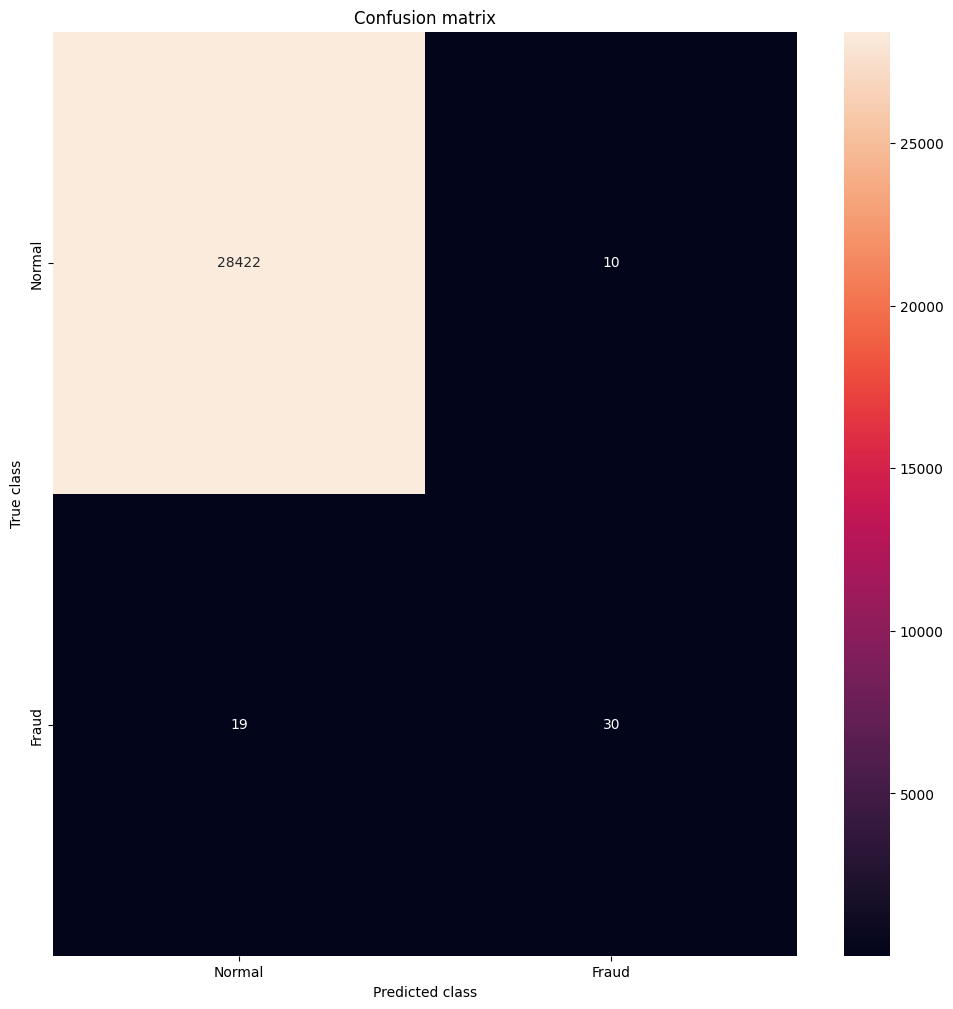

Classification report:- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.75      0.61      0.67        49

    accuracy                           1.00     28481
   macro avg       0.87      0.81      0.84     28481
weighted avg       1.00      1.00      1.00     28481

Accuracy score :- 0.9989817773252344
4.609375
2/2 [==============================] - 0s 4ms/step
1 [D loss: 1.340078, acc: 46.09%, op_acc: 41.41%] [G loss: 0.000000]
2/2 [==============================] - 0s 4ms/step
2 [D loss: 1.346036, acc: 57.03%, op_acc: 46.09%] [G loss: 0.000000]
2/2 [==============================] - 0s 4ms/step
3 [D loss: 1.381856, acc: 47.66%, op_acc: 42.97%] [G loss: 0.000000]
2/2 [==============================] - 0s 8ms/step
4 [D loss: 1.389136, acc: 50.00%, op_acc: 41.41%] [G loss: 0.000000]
2/2 [==============================] - 0s 4ms/step
5 [D loss: 1.250717, acc: 46.88%, op_acc: 42.97%] [G loss: 0.000000]
2

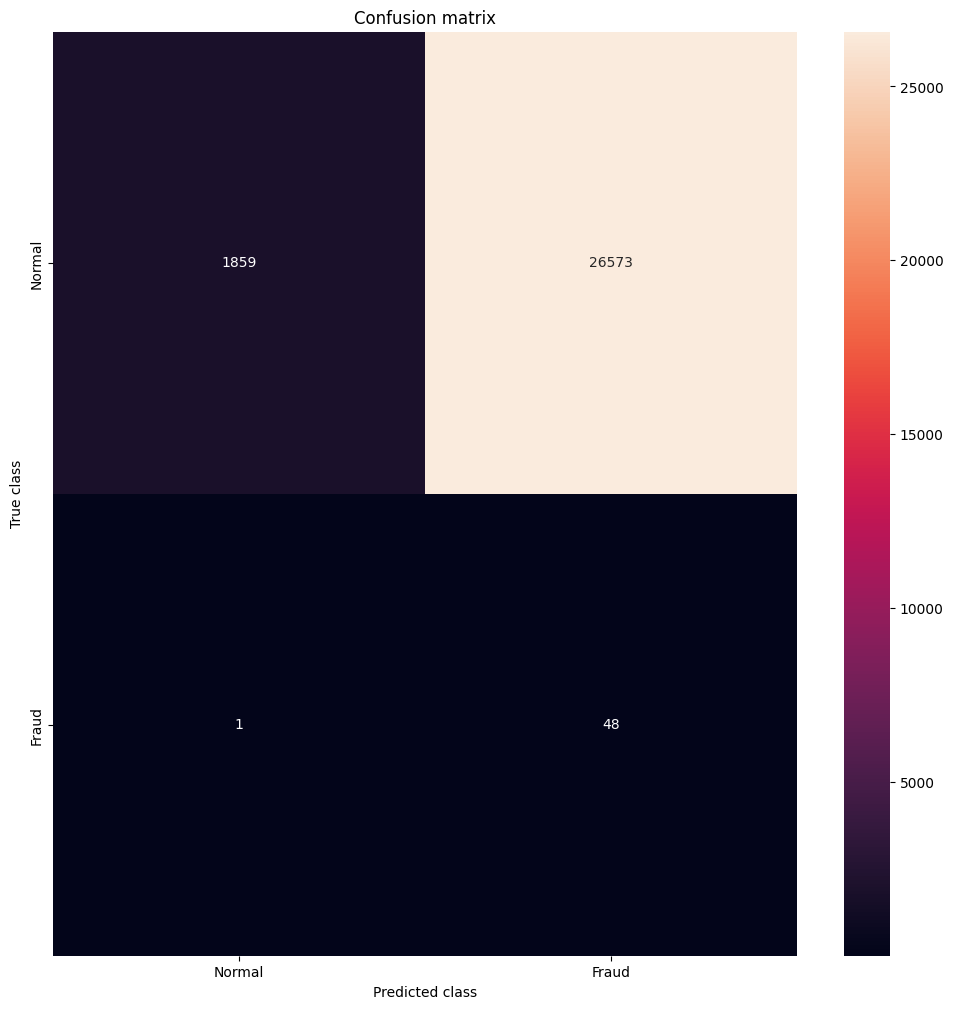

Classification report:- 
               precision    recall  f1-score   support

           0       1.00      0.07      0.12     28432
           1       0.00      0.98      0.00        49

    accuracy                           0.07     28481
   macro avg       0.50      0.52      0.06     28481
weighted avg       1.00      0.07      0.12     28481

Accuracy score :- 0.0669569186475194
48.75
2/2 [==============================] - 0s 5ms/step
11 [D loss: 1.289388, acc: 49.22%, op_acc: 43.75%] [G loss: 0.000000]
2/2 [==============================] - 0s 3ms/step
12 [D loss: 1.252204, acc: 52.34%, op_acc: 46.09%] [G loss: 0.000000]
2/2 [==============================] - 0s 9ms/step
13 [D loss: 1.246770, acc: 42.19%, op_acc: 50.78%] [G loss: 0.000000]
2/2 [==============================] - 0s 4ms/step
14 [D loss: 1.257805, acc: 51.56%, op_acc: 43.75%] [G loss: 0.000000]
2/2 [==============================] - 0s 6ms/step
15 [D loss: 1.282988, acc: 44.53%, op_acc: 42.97%] [G loss: 0.000000]

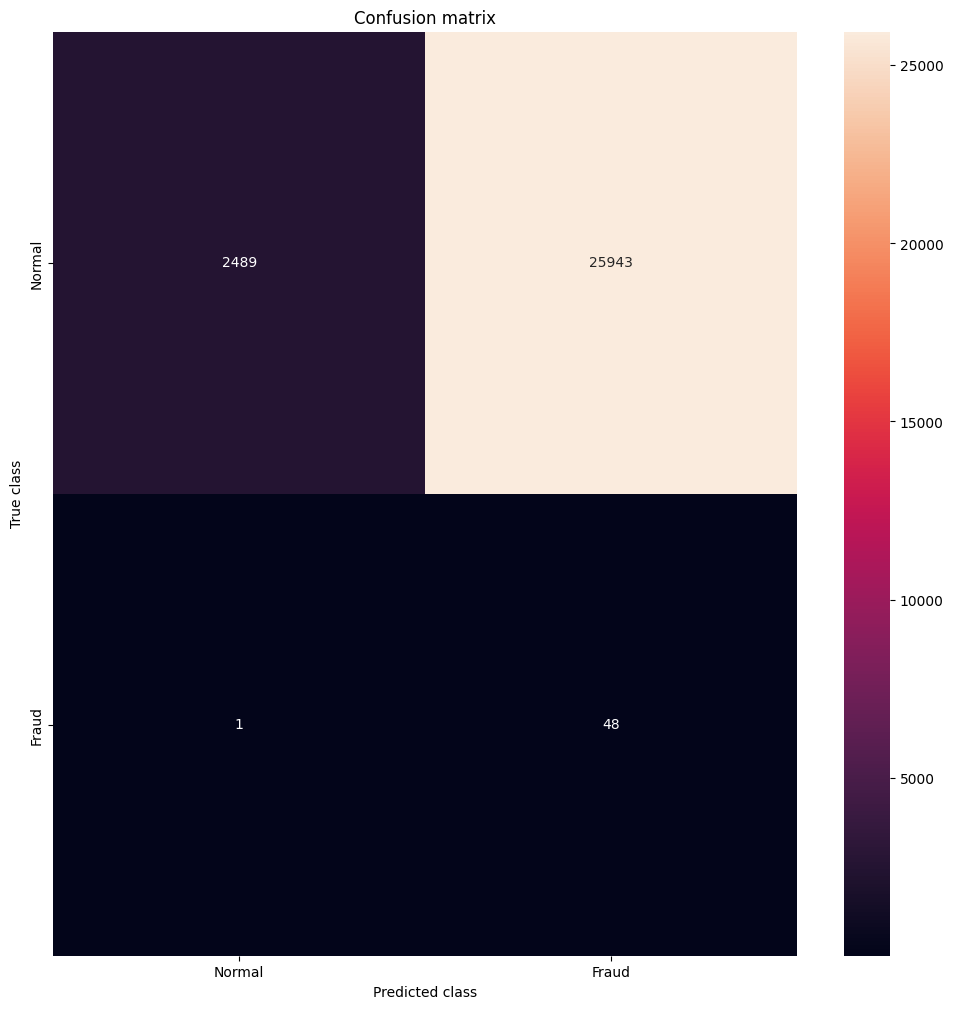

Classification report:- 
               precision    recall  f1-score   support

           0       1.00      0.09      0.16     28432
           1       0.00      0.98      0.00        49

    accuracy                           0.09     28481
   macro avg       0.50      0.53      0.08     28481
weighted avg       1.00      0.09      0.16     28481

Accuracy score :- 0.08907692847863488
49.921875
2/2 [==============================] - 0s 8ms/step
21 [D loss: 1.185994, acc: 49.22%, op_acc: 45.31%] [G loss: 0.000000]
2/2 [==============================] - 0s 5ms/step
22 [D loss: 1.232134, acc: 46.09%, op_acc: 42.97%] [G loss: 0.000000]
2/2 [==============================] - 0s 6ms/step
23 [D loss: 1.221621, acc: 50.00%, op_acc: 49.22%] [G loss: 0.000000]
2/2 [==============================] - 0s 4ms/step
24 [D loss: 1.255270, acc: 51.56%, op_acc: 45.31%] [G loss: 0.000000]
2/2 [==============================] - 0s 4ms/step
25 [D loss: 1.177233, acc: 49.22%, op_acc: 49.22%] [G loss: 0.00

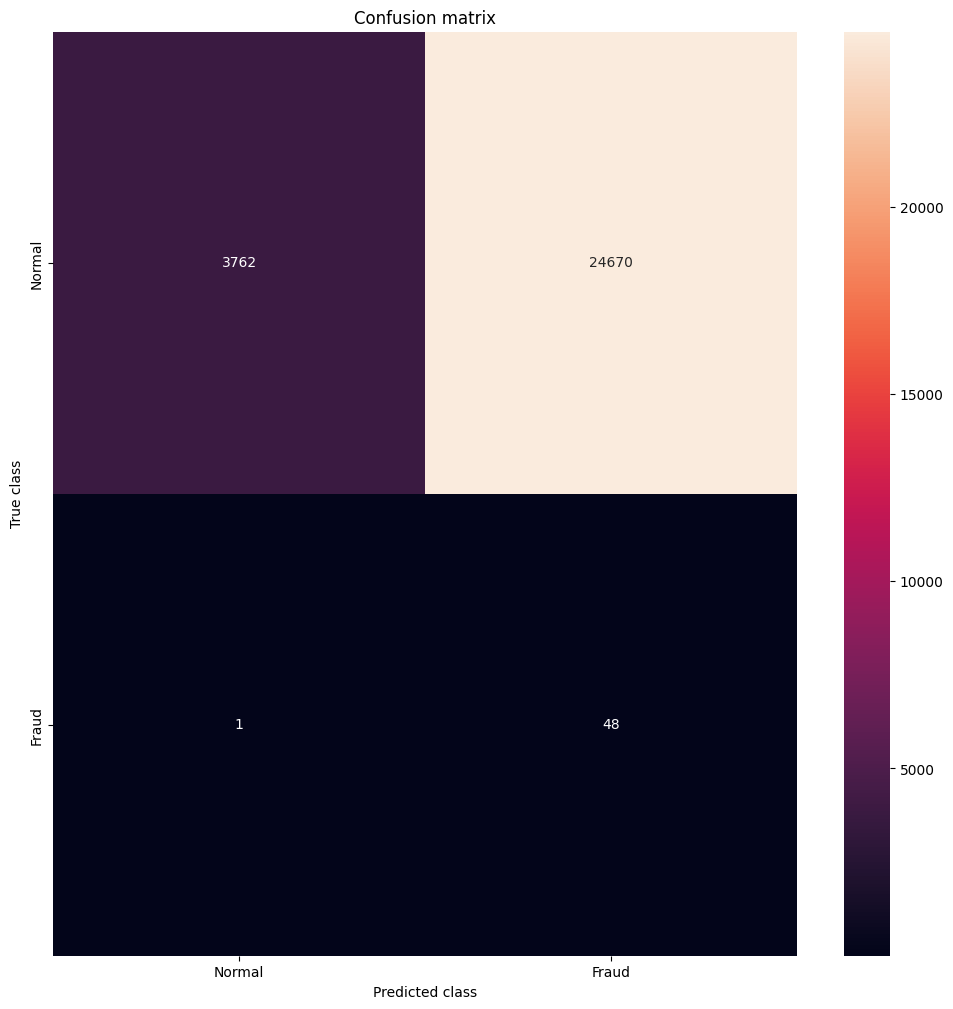

Classification report:- 
               precision    recall  f1-score   support

           0       1.00      0.13      0.23     28432
           1       0.00      0.98      0.00        49

    accuracy                           0.13     28481
   macro avg       0.50      0.56      0.12     28481
weighted avg       1.00      0.13      0.23     28481

Accuracy score :- 0.13377339278817457
49.53125
2/2 [==============================] - 0s 4ms/step
31 [D loss: 1.224619, acc: 48.44%, op_acc: 46.09%] [G loss: 0.000000]
2/2 [==============================] - 0s 4ms/step
32 [D loss: 1.222072, acc: 48.44%, op_acc: 46.88%] [G loss: 0.000000]
2/2 [==============================] - 0s 4ms/step
33 [D loss: 1.086005, acc: 50.78%, op_acc: 49.22%] [G loss: 0.000000]
2/2 [==============================] - 0s 8ms/step
34 [D loss: 1.114742, acc: 50.78%, op_acc: 51.56%] [G loss: 0.000000]
2/2 [==============================] - 0s 5ms/step
35 [D loss: 1.155504, acc: 47.66%, op_acc: 53.12%] [G loss: 0.000

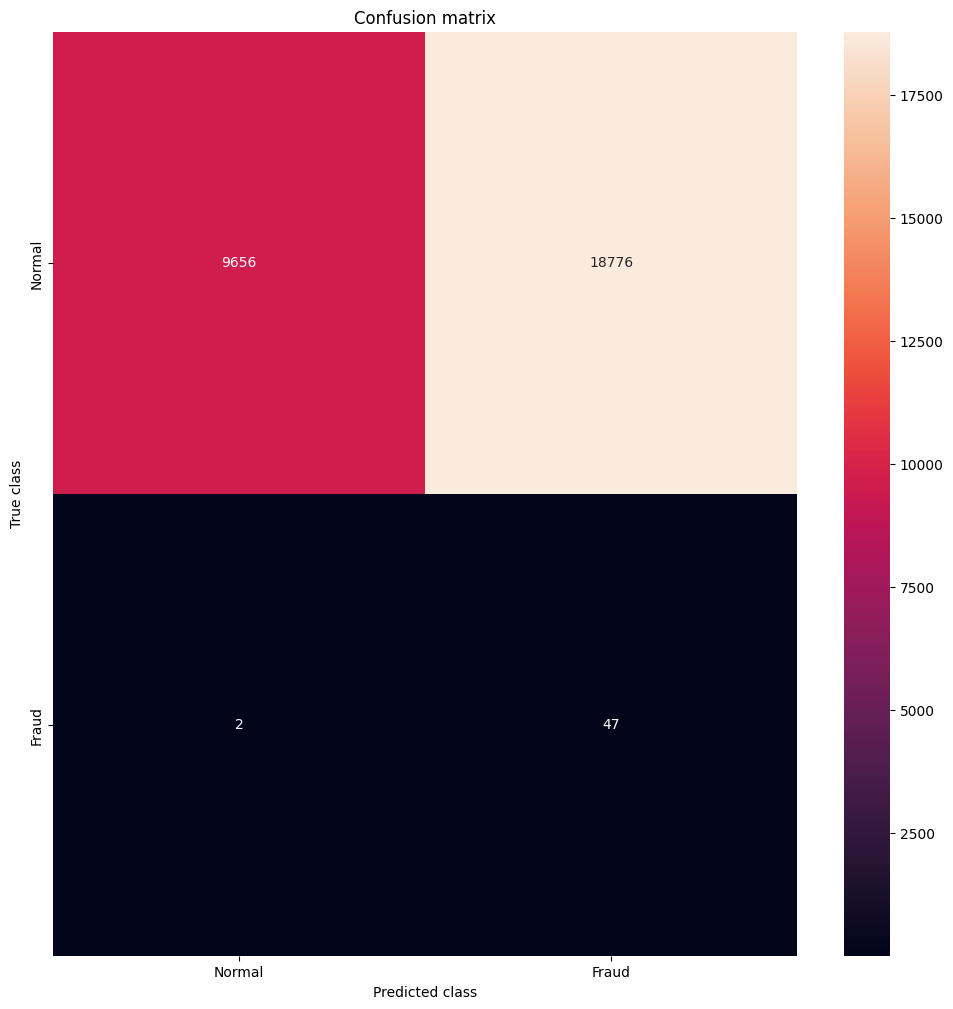

Classification report:- 
               precision    recall  f1-score   support

           0       1.00      0.34      0.51     28432
           1       0.00      0.96      0.00        49

    accuracy                           0.34     28481
   macro avg       0.50      0.65      0.26     28481
weighted avg       1.00      0.34      0.51     28481

Accuracy score :- 0.3406832625258945
48.59375
2/2 [==============================] - 0s 4ms/step
41 [D loss: 1.095909, acc: 50.00%, op_acc: 52.34%] [G loss: 0.000000]
2/2 [==============================] - 0s 4ms/step
42 [D loss: 1.115286, acc: 47.66%, op_acc: 53.12%] [G loss: 0.000000]
2/2 [==============================] - 0s 4ms/step
43 [D loss: 1.130259, acc: 43.75%, op_acc: 53.91%] [G loss: 0.000000]
2/2 [==============================] - 0s 4ms/step
44 [D loss: 1.091375, acc: 45.31%, op_acc: 59.38%] [G loss: 0.000000]
2/2 [==============================] - 0s 4ms/step
45 [D loss: 1.078070, acc: 48.44%, op_acc: 50.78%] [G loss: 0.0000

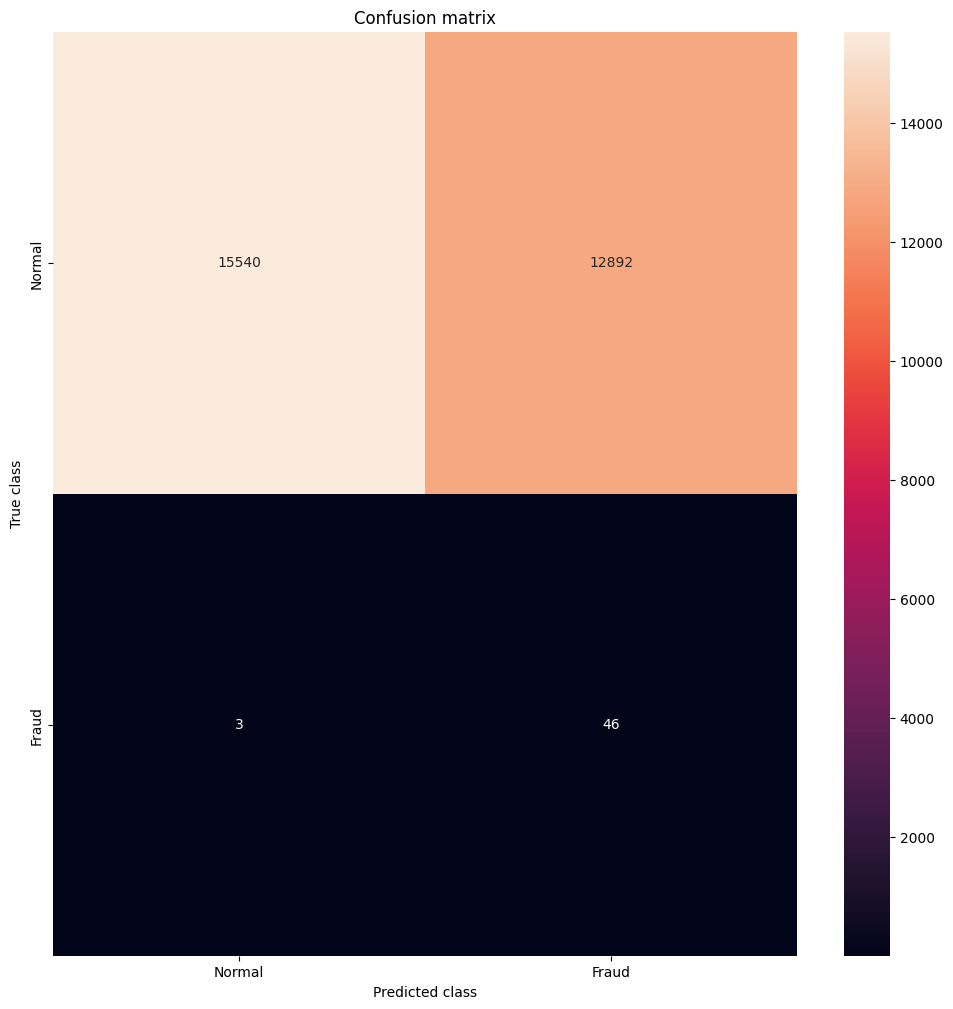

Classification report:- 
               precision    recall  f1-score   support

           0       1.00      0.55      0.71     28432
           1       0.00      0.94      0.01        49

    accuracy                           0.55     28481
   macro avg       0.50      0.74      0.36     28481
weighted avg       1.00      0.55      0.71     28481

Accuracy score :- 0.5472420209964538
48.125
2/2 [==============================] - 0s 4ms/step
51 [D loss: 1.078597, acc: 52.34%, op_acc: 50.00%] [G loss: 0.000000]
2/2 [==============================] - 0s 5ms/step
52 [D loss: 1.060085, acc: 42.97%, op_acc: 55.47%] [G loss: 0.000000]
2/2 [==============================] - 0s 8ms/step
53 [D loss: 1.068629, acc: 46.09%, op_acc: 50.78%] [G loss: 0.000000]
2/2 [==============================] - 0s 4ms/step
54 [D loss: 1.072602, acc: 50.78%, op_acc: 48.44%] [G loss: 0.000000]
2/2 [==============================] - 0s 8ms/step
55 [D loss: 1.072618, acc: 46.88%, op_acc: 52.34%] [G loss: 0.000000

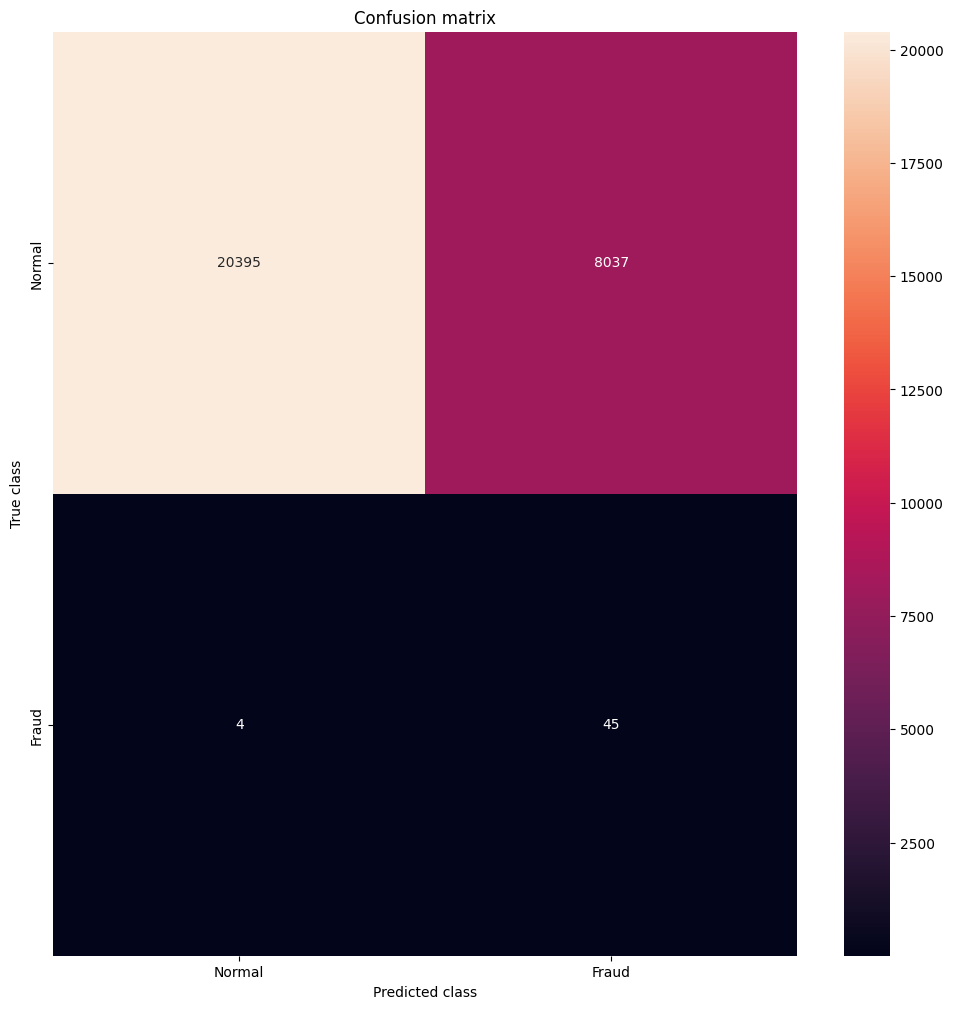

Classification report:- 
               precision    recall  f1-score   support

           0       1.00      0.72      0.84     28432
           1       0.01      0.92      0.01        49

    accuracy                           0.72     28481
   macro avg       0.50      0.82      0.42     28481
weighted avg       1.00      0.72      0.83     28481

Accuracy score :- 0.7176714300761912
47.265625
2/2 [==============================] - 0s 4ms/step
61 [D loss: 1.021591, acc: 50.00%, op_acc: 54.69%] [G loss: 0.000000]
2/2 [==============================] - 0s 4ms/step
62 [D loss: 0.933547, acc: 50.78%, op_acc: 60.94%] [G loss: 0.000000]
2/2 [==============================] - 0s 4ms/step
63 [D loss: 0.933850, acc: 50.00%, op_acc: 62.50%] [G loss: 0.000000]
2/2 [==============================] - 0s 4ms/step
64 [D loss: 1.031066, acc: 46.88%, op_acc: 55.47%] [G loss: 0.000000]
2/2 [==============================] - 0s 2ms/step
65 [D loss: 1.091248, acc: 46.88%, op_acc: 50.78%] [G loss: 0.000

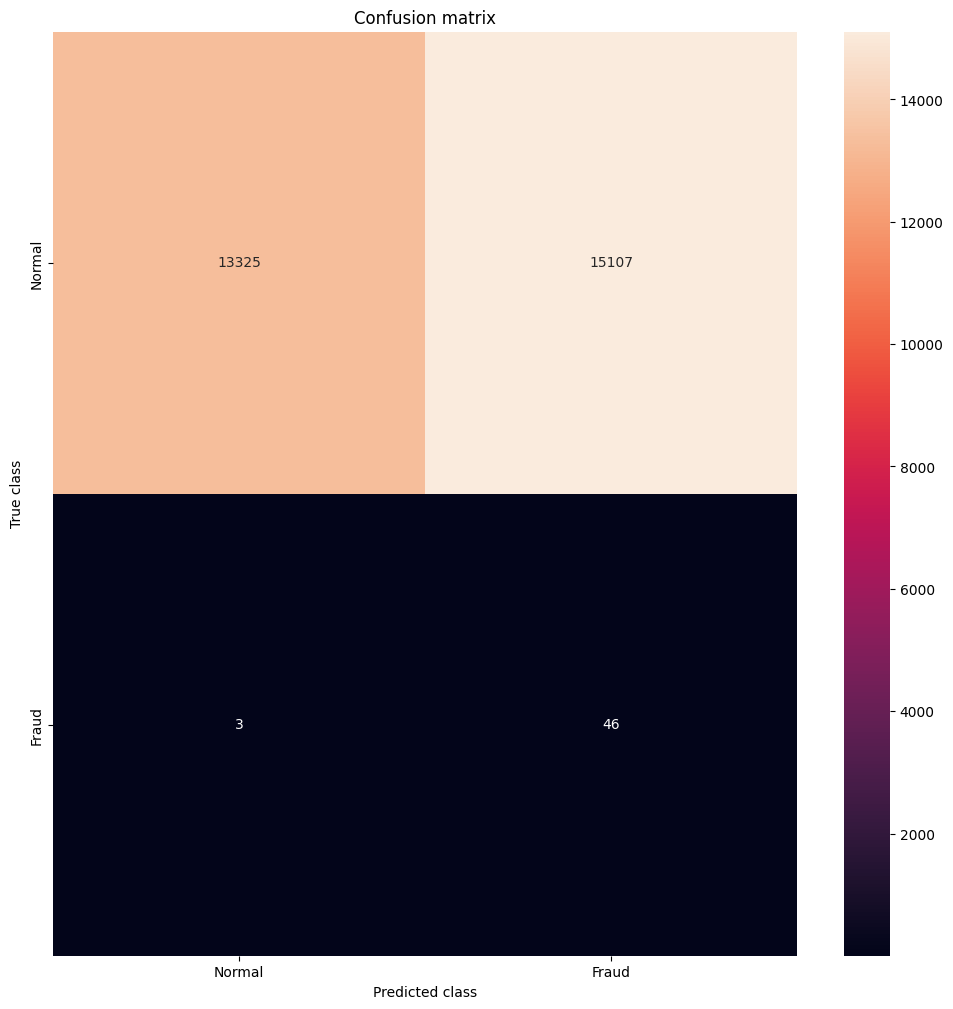

Classification report:- 
               precision    recall  f1-score   support

           0       1.00      0.47      0.64     28432
           1       0.00      0.94      0.01        49

    accuracy                           0.47     28481
   macro avg       0.50      0.70      0.32     28481
weighted avg       1.00      0.47      0.64     28481

Accuracy score :- 0.46947087532038906
47.734375
2/2 [==============================] - 0s 6ms/step
71 [D loss: 0.948662, acc: 48.44%, op_acc: 61.72%] [G loss: 0.000000]
2/2 [==============================] - 0s 4ms/step
72 [D loss: 0.995671, acc: 56.25%, op_acc: 57.81%] [G loss: 0.000000]
2/2 [==============================] - 0s 7ms/step
73 [D loss: 0.943190, acc: 48.44%, op_acc: 57.03%] [G loss: 0.000000]
2/2 [==============================] - 0s 4ms/step
74 [D loss: 0.990517, acc: 47.66%, op_acc: 54.69%] [G loss: 0.000000]
2/2 [==============================] - 0s 4ms/step
75 [D loss: 1.010125, acc: 46.09%, op_acc: 52.34%] [G loss: 0.00

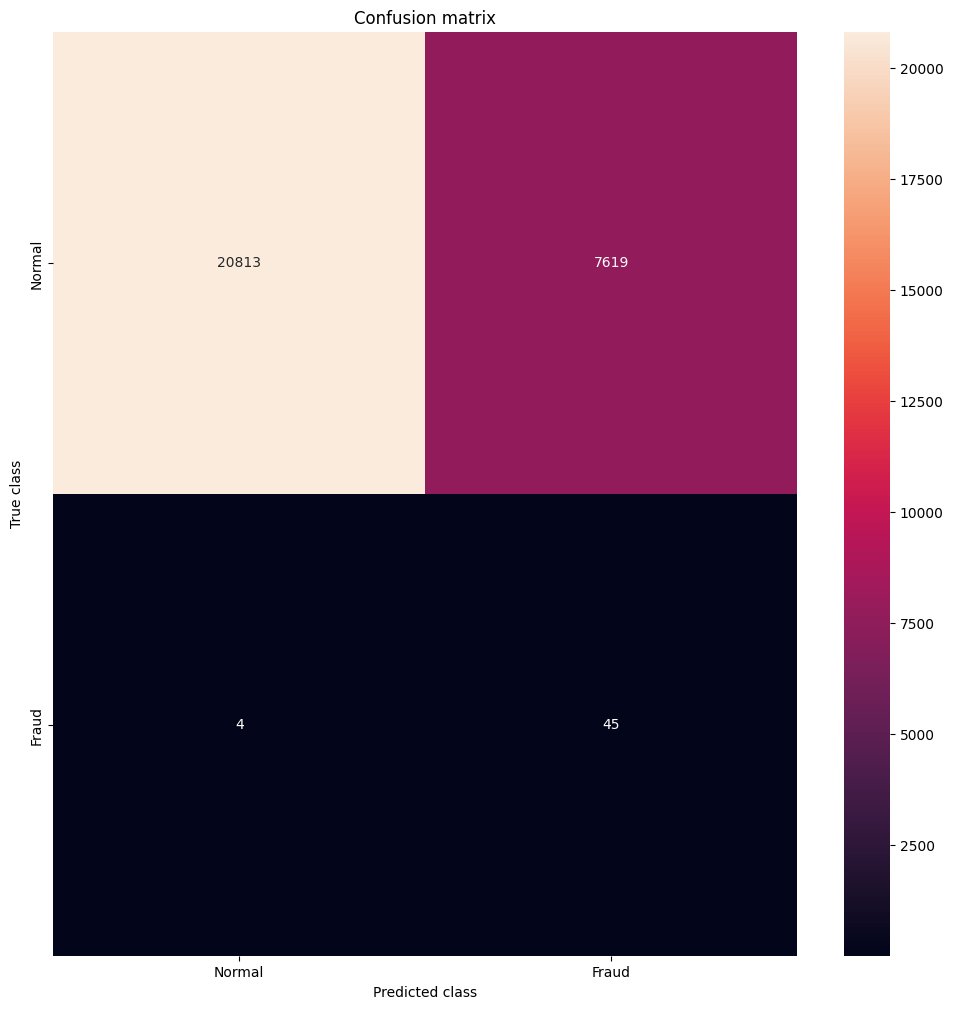

Classification report:- 
               precision    recall  f1-score   support

           0       1.00      0.73      0.85     28432
           1       0.01      0.92      0.01        49

    accuracy                           0.73     28481
   macro avg       0.50      0.83      0.43     28481
weighted avg       1.00      0.73      0.84     28481

Accuracy score :- 0.7323478810435027
48.828125
2/2 [==============================] - 0s 4ms/step
81 [D loss: 0.957799, acc: 50.78%, op_acc: 57.03%] [G loss: 0.000000]
2/2 [==============================] - 0s 6ms/step
82 [D loss: 0.920687, acc: 45.31%, op_acc: 59.38%] [G loss: 0.000000]
2/2 [==============================] - 0s 4ms/step
83 [D loss: 0.879161, acc: 46.88%, op_acc: 63.28%] [G loss: 0.000000]
2/2 [==============================] - 0s 4ms/step
84 [D loss: 0.919787, acc: 49.22%, op_acc: 57.81%] [G loss: 0.000000]
2/2 [==============================] - 0s 4ms/step
85 [D loss: 0.902360, acc: 49.22%, op_acc: 60.94%] [G loss: 0.000

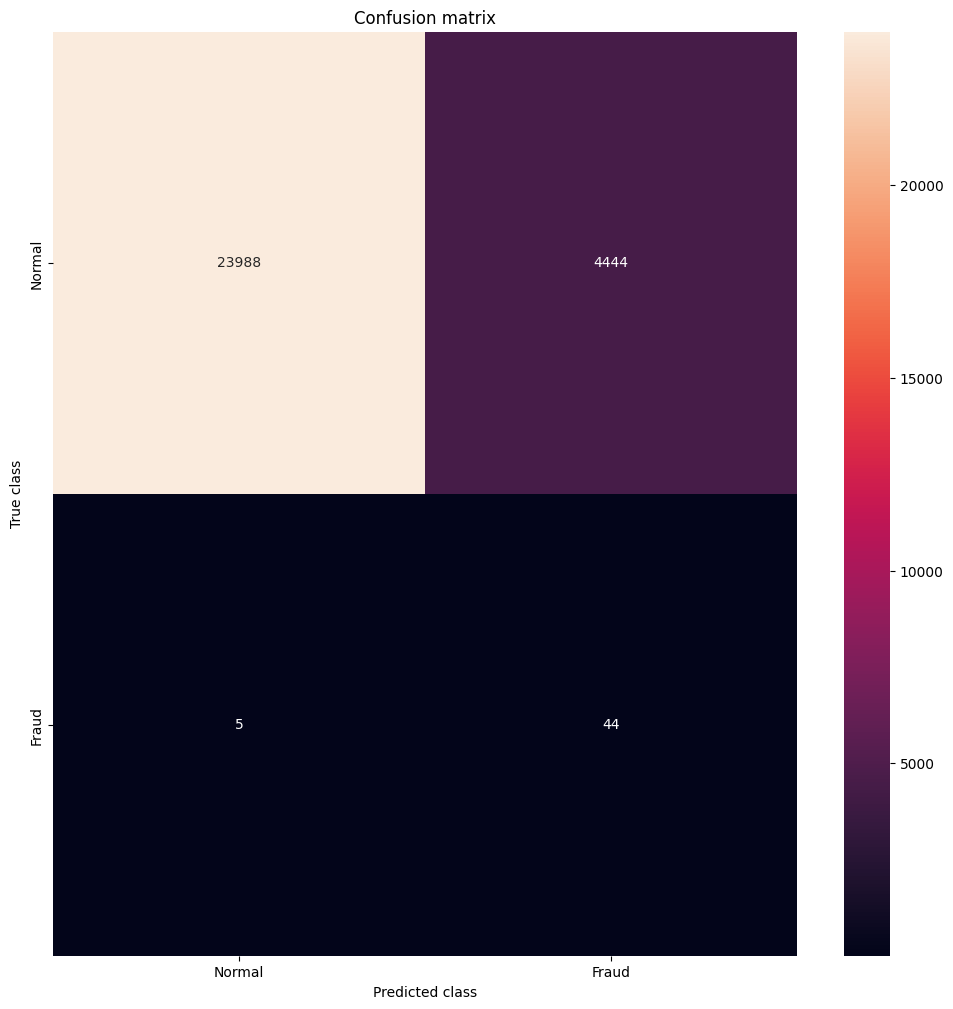

Classification report:- 
               precision    recall  f1-score   support

           0       1.00      0.84      0.92     28432
           1       0.01      0.90      0.02        49

    accuracy                           0.84     28481
   macro avg       0.50      0.87      0.47     28481
weighted avg       1.00      0.84      0.91     28481

Accuracy score :- 0.8437905972402654
48.125
2/2 [==============================] - 0s 6ms/step
91 [D loss: 0.993773, acc: 45.31%, op_acc: 58.59%] [G loss: 0.000000]
2/2 [==============================] - 0s 8ms/step
92 [D loss: 0.967895, acc: 48.44%, op_acc: 55.47%] [G loss: 0.000000]
2/2 [==============================] - 0s 8ms/step
93 [D loss: 1.013986, acc: 48.44%, op_acc: 60.16%] [G loss: 0.000000]
2/2 [==============================] - 0s 5ms/step
94 [D loss: 0.918873, acc: 48.44%, op_acc: 57.81%] [G loss: 0.000000]
2/2 [==============================] - 0s 8ms/step
95 [D loss: 0.986934, acc: 51.56%, op_acc: 55.47%] [G loss: 0.000000

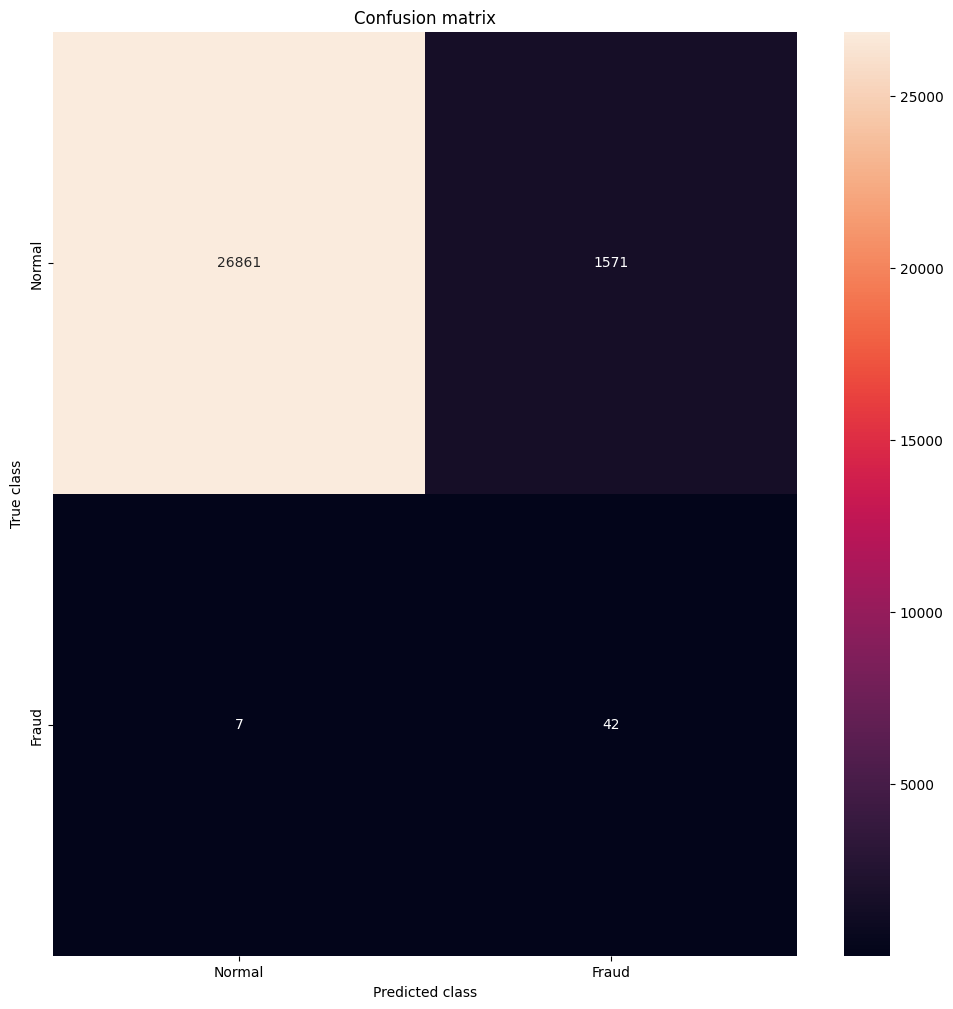

Classification report:- 
               precision    recall  f1-score   support

           0       1.00      0.94      0.97     28432
           1       0.03      0.86      0.05        49

    accuracy                           0.94     28481
   macro avg       0.51      0.90      0.51     28481
weighted avg       1.00      0.94      0.97     28481

Accuracy score :- 0.9445946420420631
48.203125
2/2 [==============================] - 0s 4ms/step
101 [D loss: 0.813635, acc: 51.56%, op_acc: 64.84%] [G loss: 0.000000]
2/2 [==============================] - 0s 8ms/step
102 [D loss: 0.858671, acc: 50.78%, op_acc: 60.16%] [G loss: 0.000000]
2/2 [==============================] - 0s 4ms/step
103 [D loss: 0.838344, acc: 52.34%, op_acc: 69.53%] [G loss: 0.000000]
2/2 [==============================] - 0s 8ms/step
104 [D loss: 0.844819, acc: 44.53%, op_acc: 62.50%] [G loss: 0.000000]
2/2 [==============================] - 0s 6ms/step
105 [D loss: 0.836723, acc: 50.00%, op_acc: 62.50%] [G loss: 

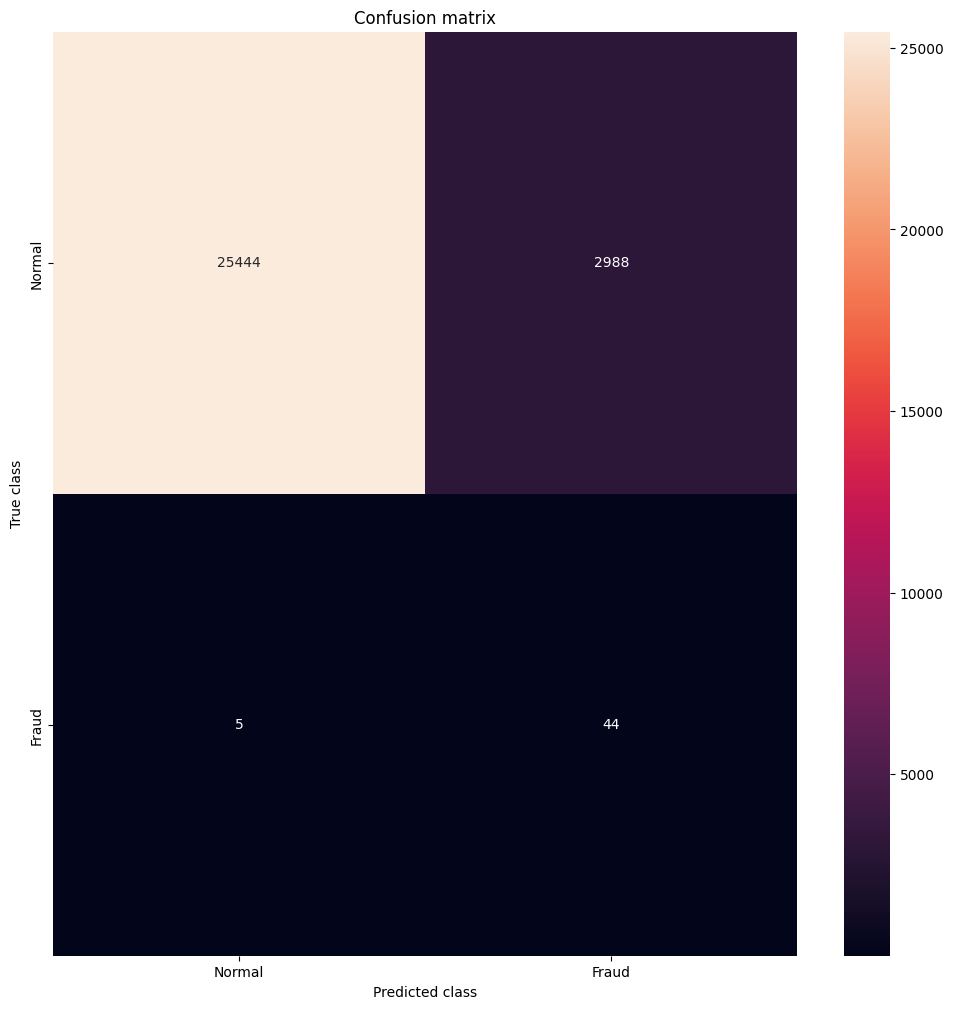

Classification report:- 
               precision    recall  f1-score   support

           0       1.00      0.89      0.94     28432
           1       0.01      0.90      0.03        49

    accuracy                           0.89     28481
   macro avg       0.51      0.90      0.49     28481
weighted avg       1.00      0.89      0.94     28481

Accuracy score :- 0.8949123977388435
49.296875
2/2 [==============================] - 0s 7ms/step
111 [D loss: 0.847919, acc: 48.44%, op_acc: 67.97%] [G loss: 0.000000]
2/2 [==============================] - 0s 4ms/step
112 [D loss: 0.741797, acc: 52.34%, op_acc: 68.75%] [G loss: 0.000000]
2/2 [==============================] - 0s 4ms/step
113 [D loss: 0.878224, acc: 42.97%, op_acc: 61.72%] [G loss: 0.000000]
2/2 [==============================] - 0s 4ms/step
114 [D loss: 0.783170, acc: 50.00%, op_acc: 64.06%] [G loss: 0.000000]
2/2 [==============================] - 0s 4ms/step
115 [D loss: 0.804406, acc: 50.00%, op_acc: 65.62%] [G loss: 

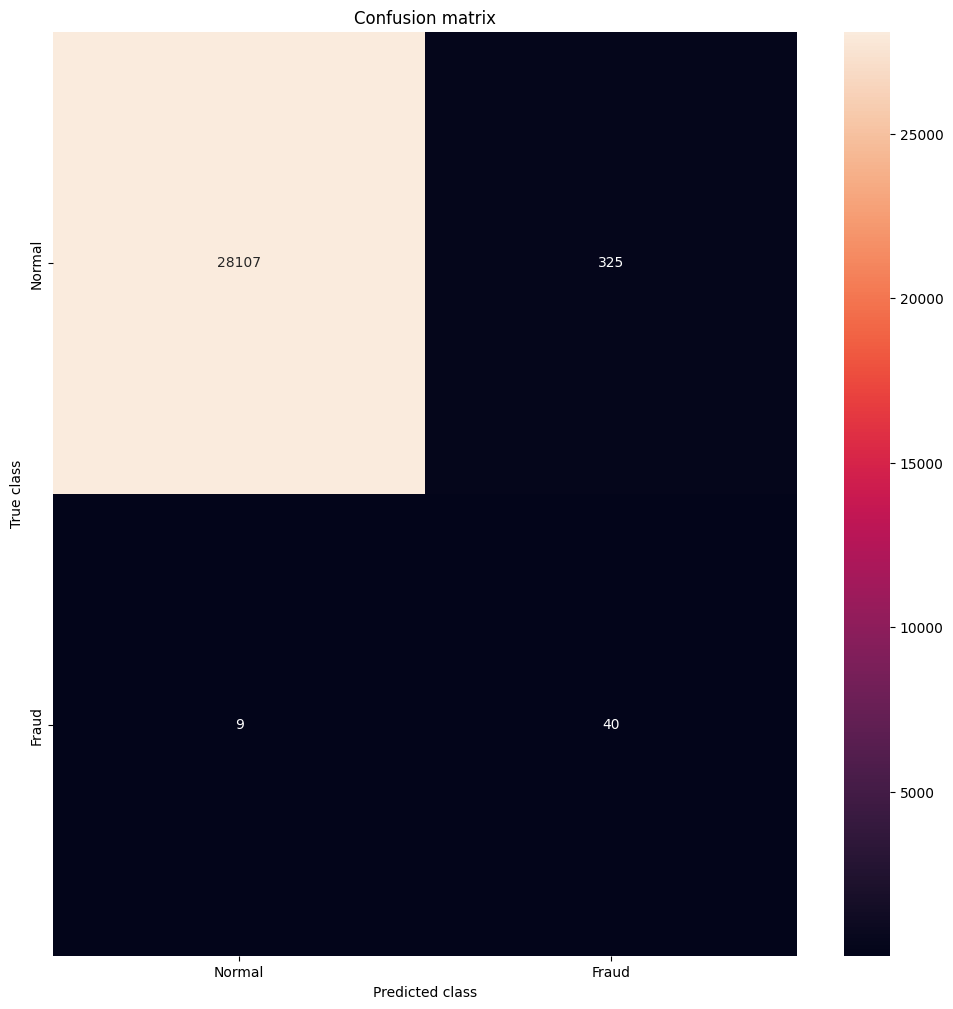

Classification report:- 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     28432
           1       0.11      0.82      0.19        49

    accuracy                           0.99     28481
   macro avg       0.55      0.90      0.59     28481
weighted avg       1.00      0.99      0.99     28481

Accuracy score :- 0.9882728836768372
47.1875
2/2 [==============================] - 0s 4ms/step
121 [D loss: 0.823322, acc: 49.22%, op_acc: 63.28%] [G loss: 0.000000]
2/2 [==============================] - 0s 8ms/step
122 [D loss: 0.799439, acc: 46.09%, op_acc: 67.19%] [G loss: 0.000000]
2/2 [==============================] - 0s 4ms/step
123 [D loss: 0.764950, acc: 46.88%, op_acc: 64.06%] [G loss: 0.000000]
2/2 [==============================] - 0s 3ms/step
124 [D loss: 0.790971, acc: 45.31%, op_acc: 70.31%] [G loss: 0.000000]
2/2 [==============================] - 0s 0s/step
125 [D loss: 0.752619, acc: 46.09%, op_acc: 67.19%] [G loss: 0.0

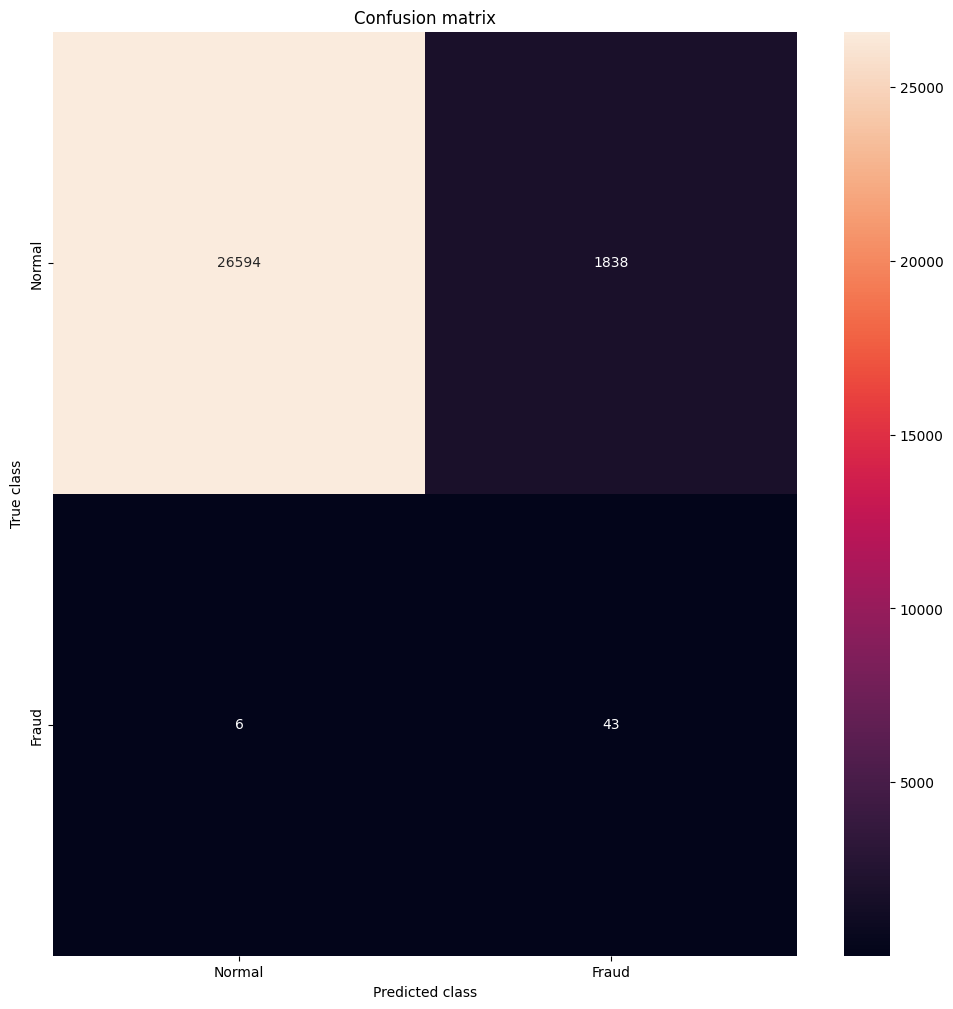

Classification report:- 
               precision    recall  f1-score   support

           0       1.00      0.94      0.97     28432
           1       0.02      0.88      0.04        49

    accuracy                           0.94     28481
   macro avg       0.51      0.91      0.51     28481
weighted avg       1.00      0.94      0.96     28481

Accuracy score :- 0.9352550823355922
45.9375
2/2 [==============================] - 0s 4ms/step
131 [D loss: 0.840892, acc: 44.53%, op_acc: 63.28%] [G loss: 0.000000]
2/2 [==============================] - 0s 4ms/step
132 [D loss: 0.825809, acc: 41.41%, op_acc: 60.94%] [G loss: 0.000000]
2/2 [==============================] - 0s 4ms/step
133 [D loss: 0.726079, acc: 44.53%, op_acc: 67.97%] [G loss: 0.000000]
2/2 [==============================] - 0s 4ms/step
134 [D loss: 0.728984, acc: 44.53%, op_acc: 66.41%] [G loss: 0.000000]
2/2 [==============================] - 0s 4ms/step
135 [D loss: 0.781870, acc: 47.66%, op_acc: 66.41%] [G loss: 0.

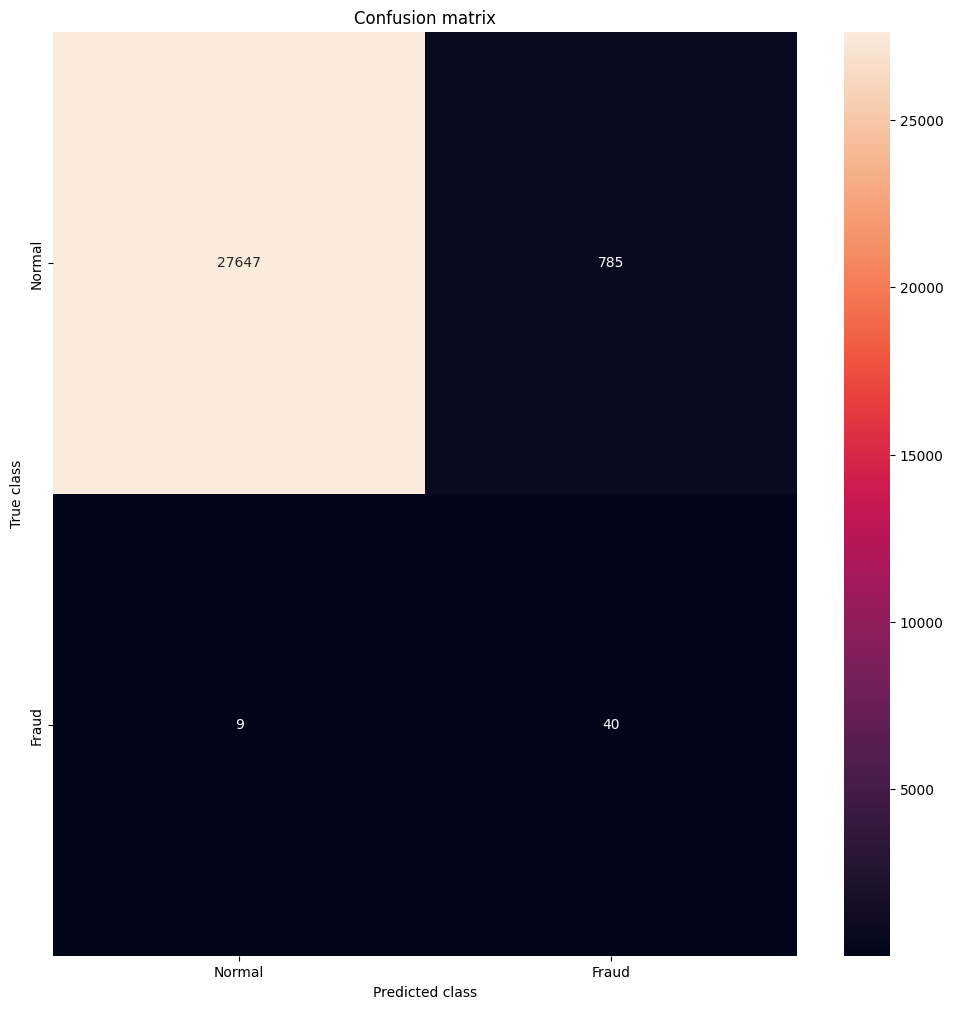

Classification report:- 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     28432
           1       0.05      0.82      0.09        49

    accuracy                           0.97     28481
   macro avg       0.52      0.89      0.54     28481
weighted avg       1.00      0.97      0.98     28481

Accuracy score :- 0.9721217653874513
45.078125
2/2 [==============================] - 0s 5ms/step
141 [D loss: 0.756535, acc: 46.88%, op_acc: 71.09%] [G loss: 0.000000]
2/2 [==============================] - 0s 8ms/step
142 [D loss: 0.692171, acc: 45.31%, op_acc: 75.78%] [G loss: 0.000000]
2/2 [==============================] - 0s 4ms/step
143 [D loss: 0.754644, acc: 44.53%, op_acc: 71.09%] [G loss: 0.000000]
2/2 [==============================] - 0s 8ms/step
144 [D loss: 0.744912, acc: 43.75%, op_acc: 74.22%] [G loss: 0.000000]
2/2 [==============================] - 0s 8ms/step
145 [D loss: 0.687582, acc: 47.66%, op_acc: 70.31%] [G loss: 

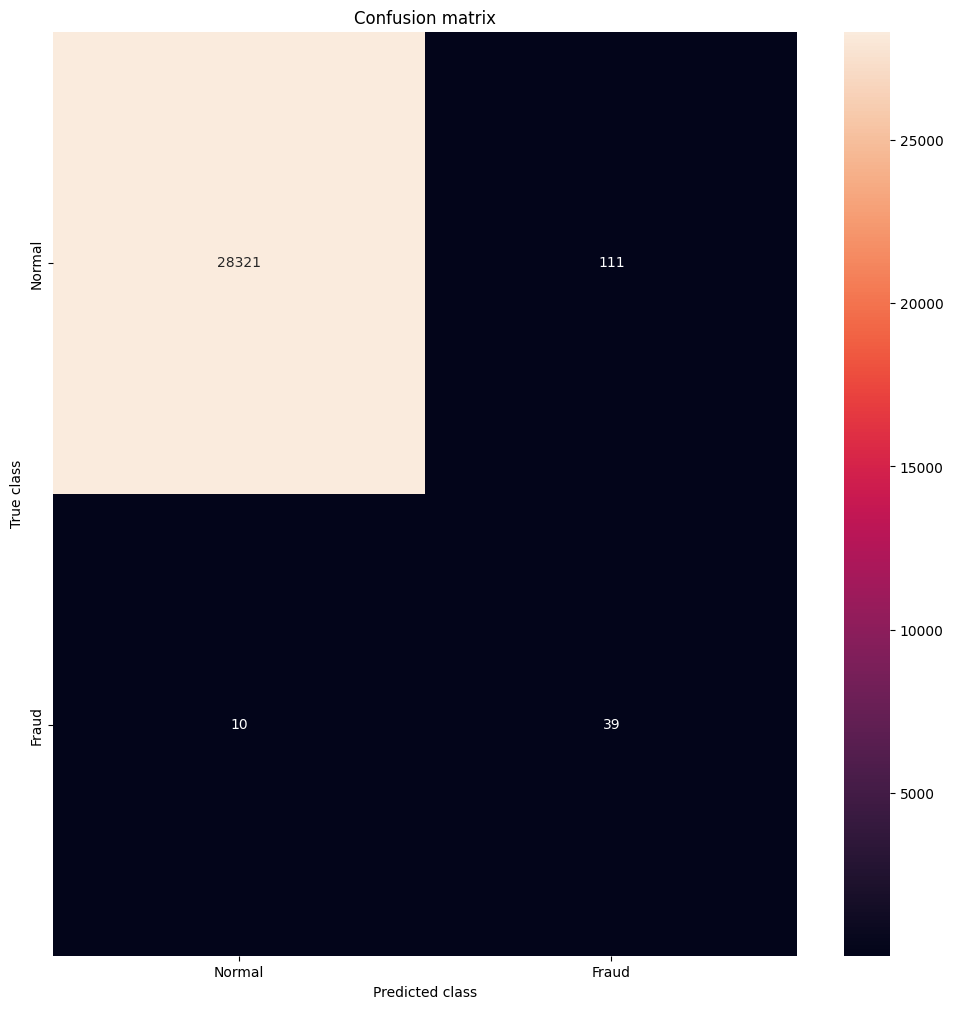

Classification report:- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.26      0.80      0.39        49

    accuracy                           1.00     28481
   macro avg       0.63      0.90      0.69     28481
weighted avg       1.00      1.00      1.00     28481

Accuracy score :- 0.9957515536673572
45.15625
2/2 [==============================] - 0s 4ms/step
151 [D loss: 0.717990, acc: 43.75%, op_acc: 71.09%] [G loss: 0.000000]
2/2 [==============================] - 0s 8ms/step
152 [D loss: 0.711847, acc: 50.00%, op_acc: 66.41%] [G loss: 0.000000]
2/2 [==============================] - 0s 4ms/step
153 [D loss: 0.727338, acc: 42.19%, op_acc: 71.88%] [G loss: 0.000000]
2/2 [==============================] - 0s 4ms/step
154 [D loss: 0.699464, acc: 45.31%, op_acc: 69.53%] [G loss: 0.000000]
2/2 [==============================] - 0s 4ms/step
155 [D loss: 0.745735, acc: 49.22%, op_acc: 69.53%] [G loss: 0

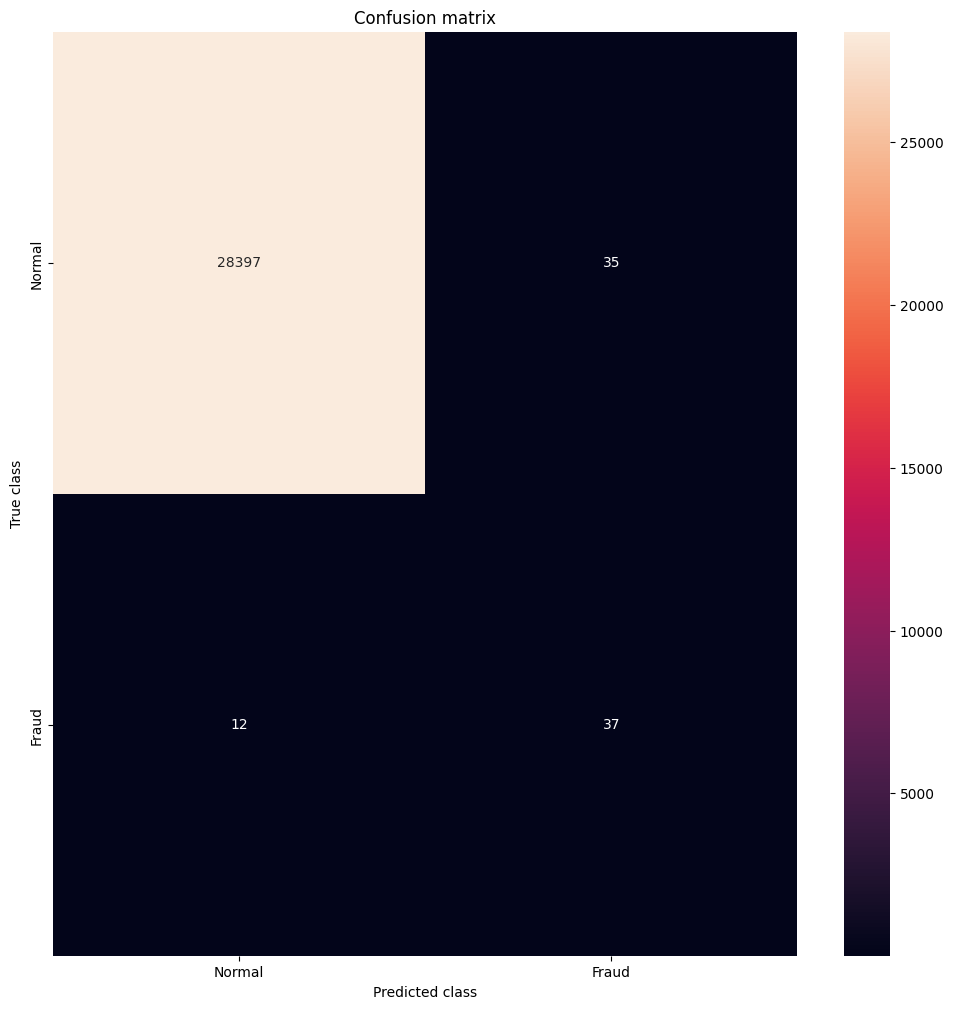

Classification report:- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.51      0.76      0.61        49

    accuracy                           1.00     28481
   macro avg       0.76      0.88      0.81     28481
weighted avg       1.00      1.00      1.00     28481

Accuracy score :- 0.9983497770443454
45.15625
2/2 [==============================] - 0s 6ms/step
161 [D loss: 0.662541, acc: 46.09%, op_acc: 77.34%] [G loss: 0.000000]
2/2 [==============================] - 0s 4ms/step
162 [D loss: 0.670631, acc: 48.44%, op_acc: 78.91%] [G loss: 0.000000]
2/2 [==============================] - 0s 4ms/step
163 [D loss: 0.691808, acc: 45.31%, op_acc: 70.31%] [G loss: 0.000000]
2/2 [==============================] - 0s 4ms/step
164 [D loss: 0.703583, acc: 46.09%, op_acc: 67.19%] [G loss: 0.000000]
2/2 [==============================] - 0s 4ms/step
165 [D loss: 0.738070, acc: 42.97%, op_acc: 68.75%] [G loss: 0

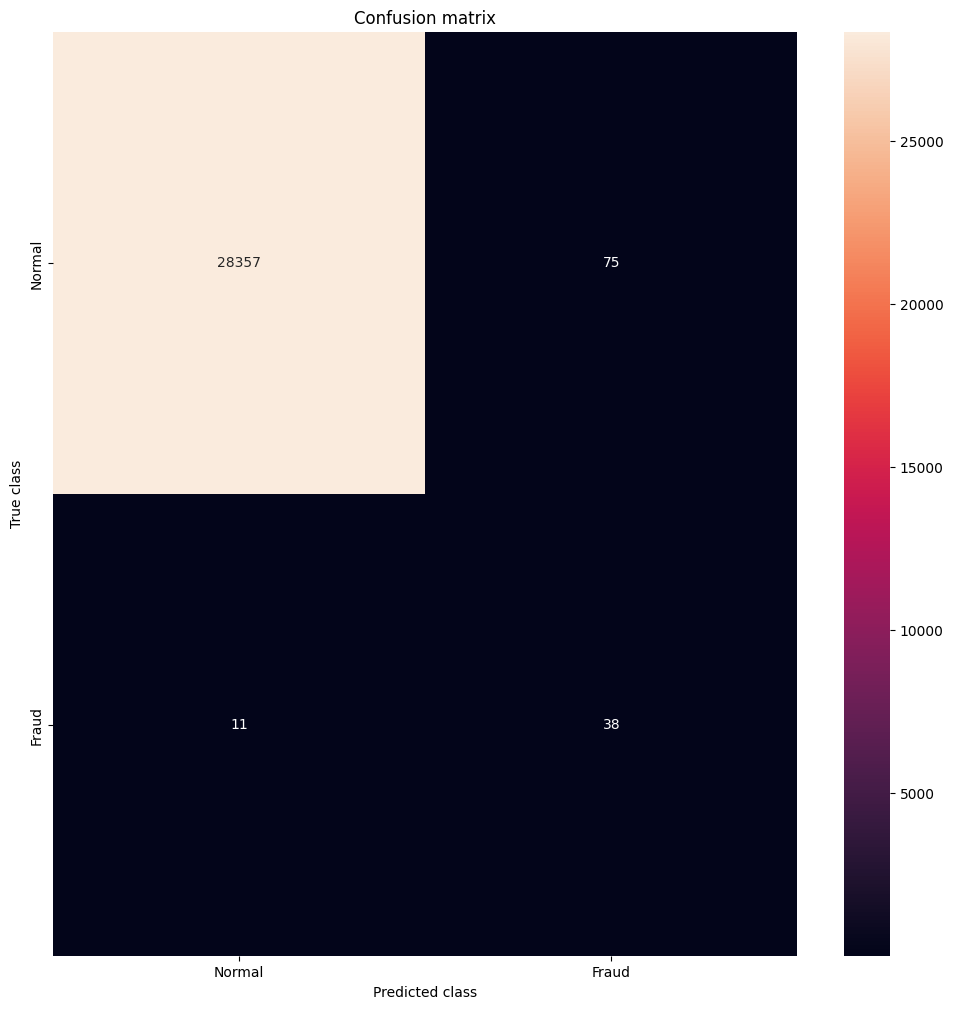

Classification report:- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.34      0.78      0.47        49

    accuracy                           1.00     28481
   macro avg       0.67      0.89      0.73     28481
weighted avg       1.00      1.00      1.00     28481

Accuracy score :- 0.9969804431024192
45.15625
2/2 [==============================] - 0s 3ms/step
171 [D loss: 0.625667, acc: 41.41%, op_acc: 74.22%] [G loss: 0.000000]
2/2 [==============================] - 0s 2ms/step
172 [D loss: 0.670729, acc: 42.19%, op_acc: 69.53%] [G loss: 0.000000]
2/2 [==============================] - 0s 4ms/step
173 [D loss: 0.677456, acc: 45.31%, op_acc: 71.88%] [G loss: 0.000000]
2/2 [==============================] - 0s 4ms/step
174 [D loss: 0.667328, acc: 46.09%, op_acc: 73.44%] [G loss: 0.000000]
2/2 [==============================] - 0s 8ms/step
175 [D loss: 0.669971, acc: 42.97%, op_acc: 74.22%] [G loss: 0

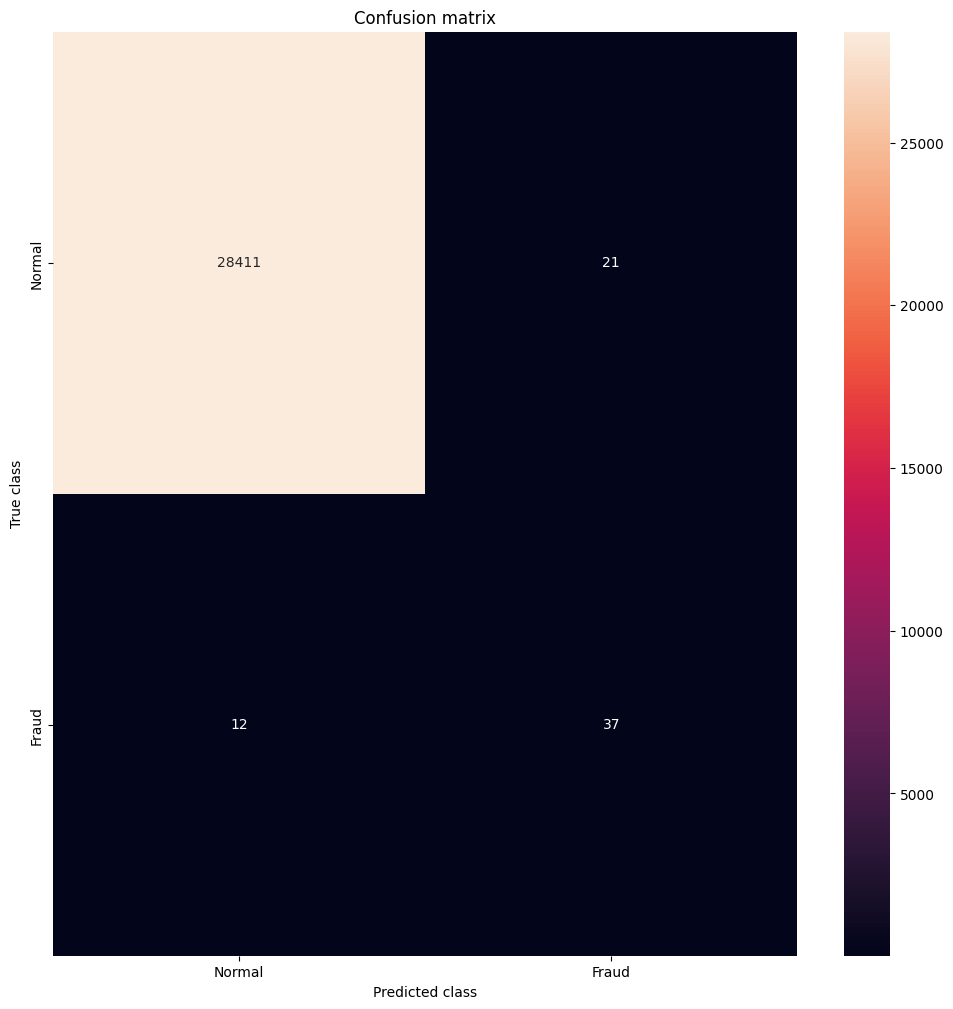

Classification report:- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.64      0.76      0.69        49

    accuracy                           1.00     28481
   macro avg       0.82      0.88      0.85     28481
weighted avg       1.00      1.00      1.00     28481

Accuracy score :- 0.9988413328183702
44.21875
2/2 [==============================] - 0s 4ms/step
181 [D loss: 0.643046, acc: 45.31%, op_acc: 71.88%] [G loss: 0.000000]
2/2 [==============================] - 0s 7ms/step
182 [D loss: 0.613763, acc: 43.75%, op_acc: 77.34%] [G loss: 0.000000]
2/2 [==============================] - 0s 8ms/step
183 [D loss: 0.604799, acc: 42.97%, op_acc: 75.00%] [G loss: 0.000000]
2/2 [==============================] - 0s 4ms/step
184 [D loss: 0.638883, acc: 44.53%, op_acc: 73.44%] [G loss: 0.000000]
2/2 [==============================] - 0s 6ms/step
185 [D loss: 0.643432, acc: 40.62%, op_acc: 77.34%] [G loss: 0

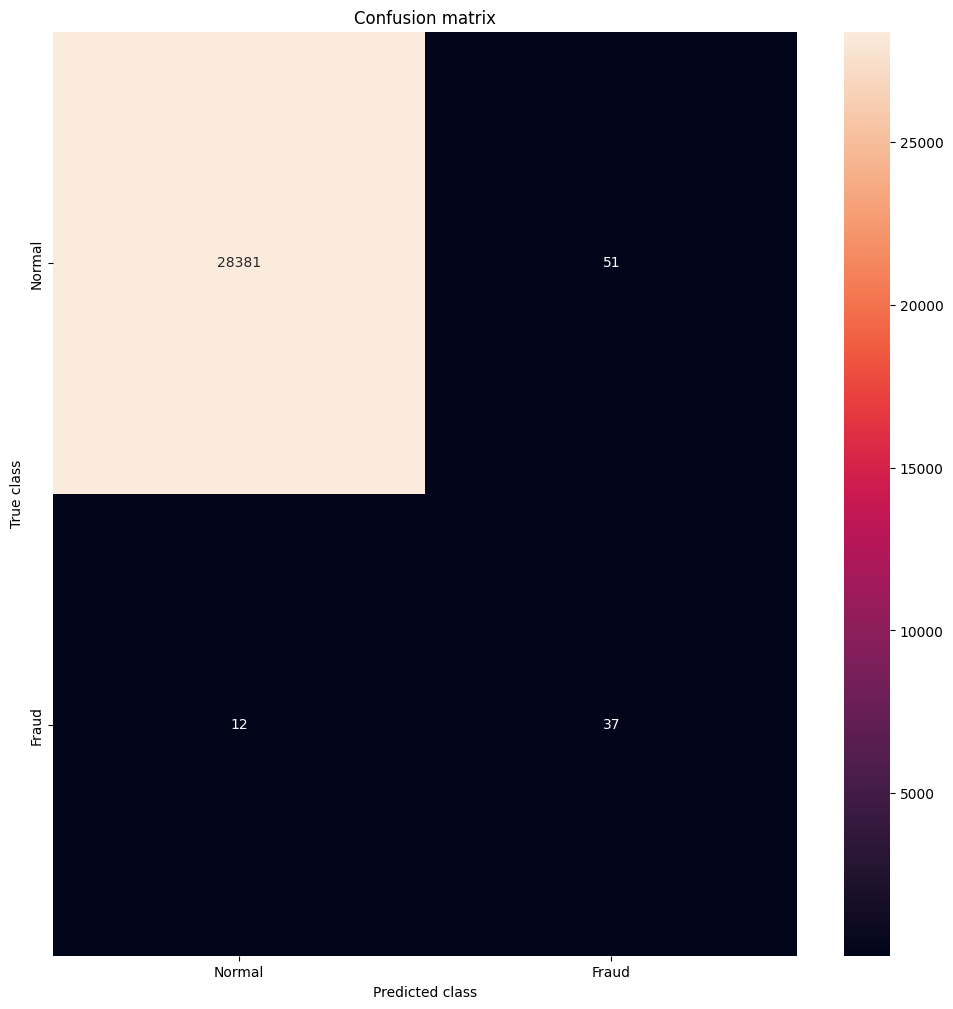

Classification report:- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.42      0.76      0.54        49

    accuracy                           1.00     28481
   macro avg       0.71      0.88      0.77     28481
weighted avg       1.00      1.00      1.00     28481

Accuracy score :- 0.9977879990168884
43.984375
2/2 [==============================] - 0s 4ms/step
191 [D loss: 0.713277, acc: 40.62%, op_acc: 67.97%] [G loss: 0.000000]
2/2 [==============================] - 0s 4ms/step
192 [D loss: 0.575899, acc: 43.75%, op_acc: 77.34%] [G loss: 0.000000]
2/2 [==============================] - 0s 3ms/step
193 [D loss: 0.588170, acc: 42.97%, op_acc: 79.69%] [G loss: 0.000000]
2/2 [==============================] - 0s 4ms/step
194 [D loss: 0.637108, acc: 45.31%, op_acc: 73.44%] [G loss: 0.000000]
2/2 [==============================] - 0s 8ms/step
195 [D loss: 0.615586, acc: 42.97%, op_acc: 70.31%] [G loss: 

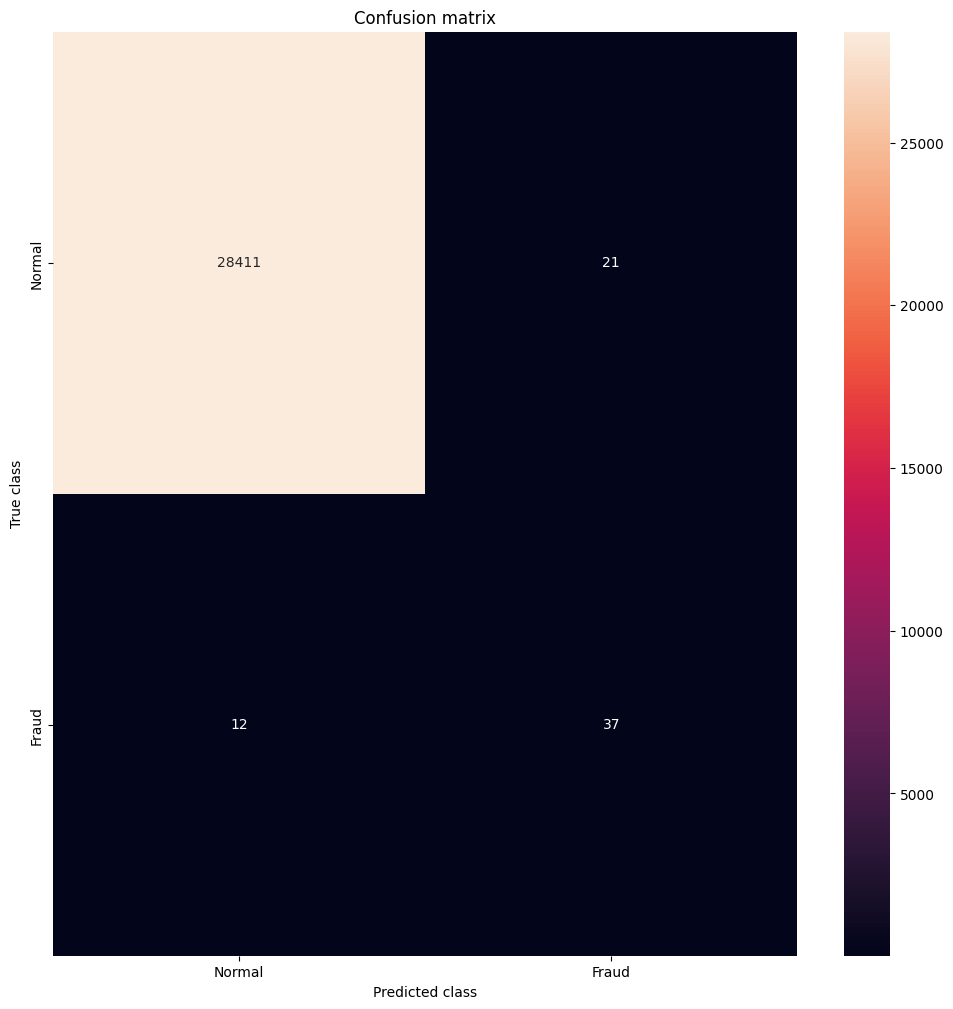

Classification report:- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.64      0.76      0.69        49

    accuracy                           1.00     28481
   macro avg       0.82      0.88      0.85     28481
weighted avg       1.00      1.00      1.00     28481

Accuracy score :- 0.9988413328183702
42.265625
2/2 [==============================] - 0s 3ms/step
201 [D loss: 0.599029, acc: 46.09%, op_acc: 76.56%] [G loss: 0.000000]
2/2 [==============================] - 0s 8ms/step
202 [D loss: 0.660175, acc: 43.75%, op_acc: 75.00%] [G loss: 0.000000]
2/2 [==============================] - 0s 4ms/step
203 [D loss: 0.566284, acc: 41.41%, op_acc: 79.69%] [G loss: 0.000000]
2/2 [==============================] - 0s 4ms/step
204 [D loss: 0.578327, acc: 44.53%, op_acc: 81.25%] [G loss: 0.000000]
2/2 [==============================] - 0s 4ms/step
205 [D loss: 0.636996, acc: 39.06%, op_acc: 77.34%] [G loss: 

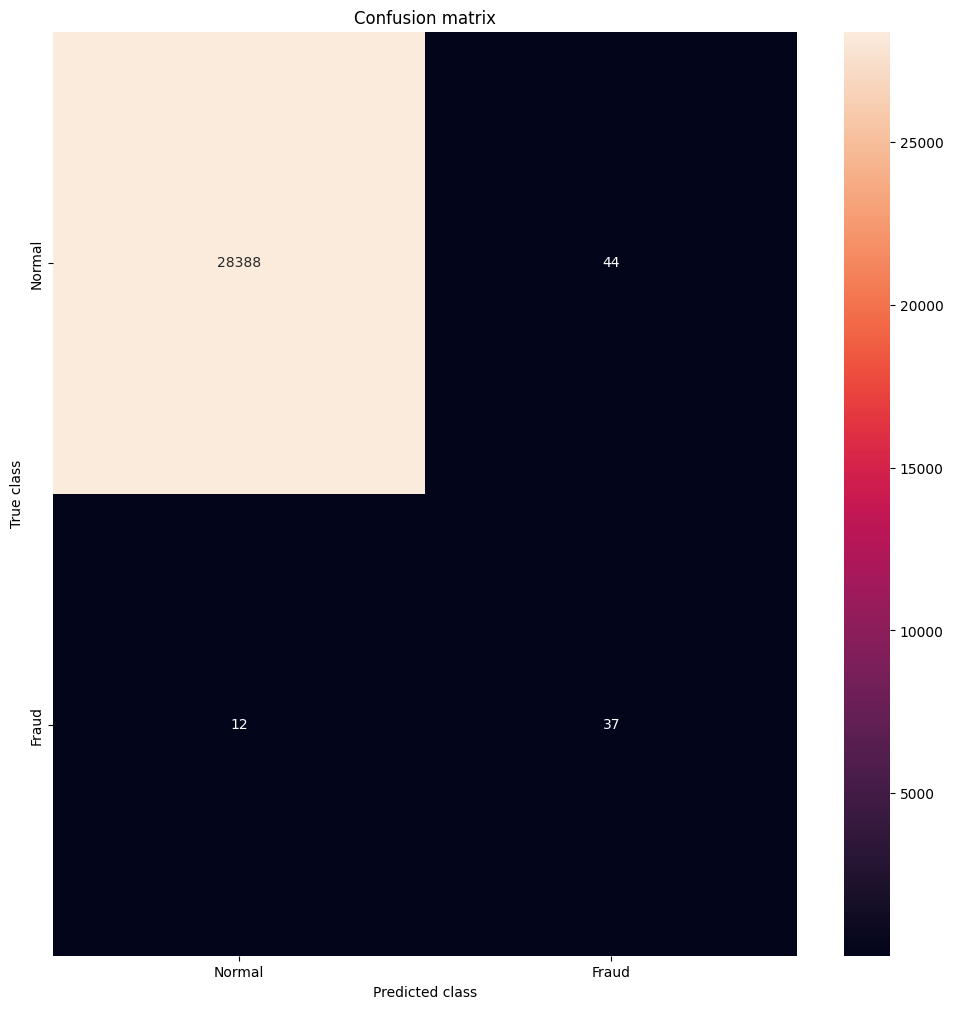

Classification report:- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.46      0.76      0.57        49

    accuracy                           1.00     28481
   macro avg       0.73      0.88      0.78     28481
weighted avg       1.00      1.00      1.00     28481

Accuracy score :- 0.9980337769039008
42.734375
2/2 [==============================] - 0s 4ms/step
211 [D loss: 0.521076, acc: 46.88%, op_acc: 81.25%] [G loss: 0.000000]
2/2 [==============================] - 0s 4ms/step
212 [D loss: 0.506911, acc: 42.97%, op_acc: 82.81%] [G loss: 0.000000]
2/2 [==============================] - 0s 4ms/step
213 [D loss: 0.695308, acc: 46.09%, op_acc: 68.75%] [G loss: 0.000000]
2/2 [==============================] - 0s 4ms/step
214 [D loss: 0.606802, acc: 42.19%, op_acc: 78.12%] [G loss: 0.000000]
2/2 [==============================] - 0s 8ms/step
215 [D loss: 0.658848, acc: 40.62%, op_acc: 75.00%] [G loss: 

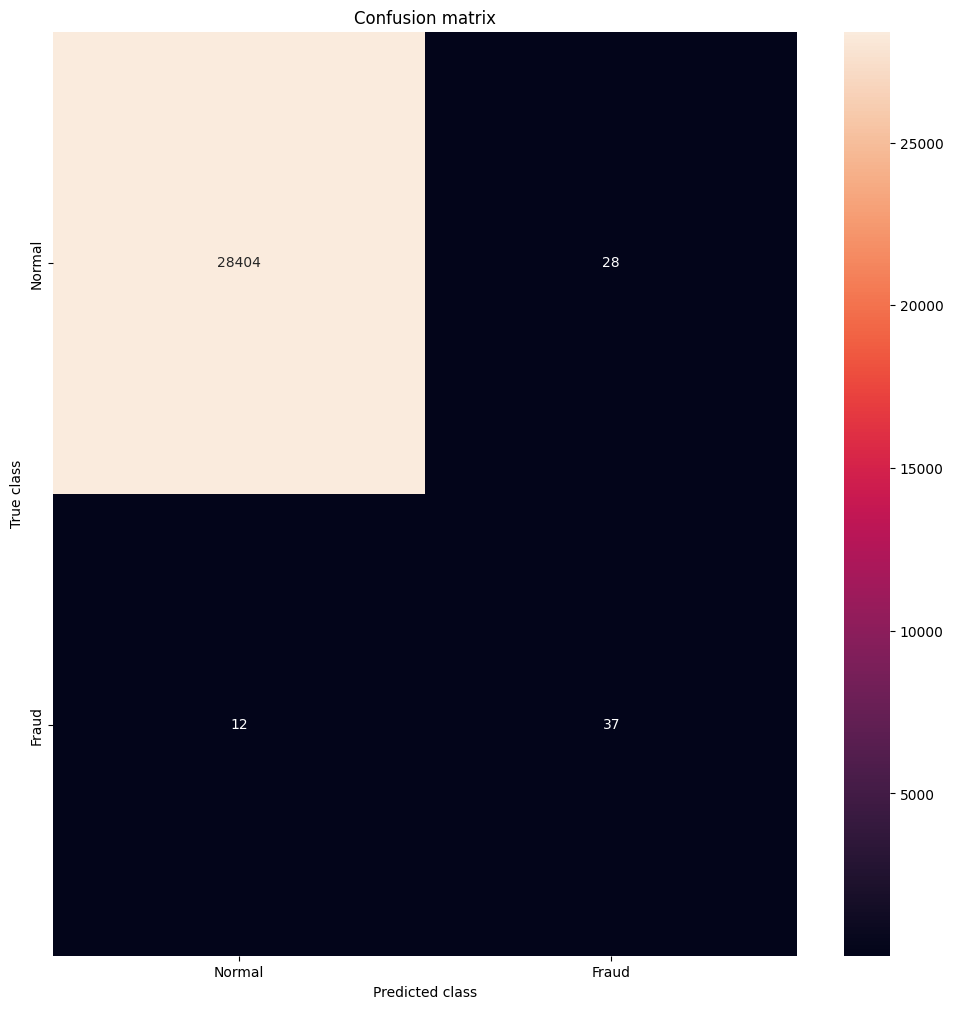

Classification report:- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.57      0.76      0.65        49

    accuracy                           1.00     28481
   macro avg       0.78      0.88      0.82     28481
weighted avg       1.00      1.00      1.00     28481

Accuracy score :- 0.9985955549313578
43.671875
2/2 [==============================] - 0s 0s/step
221 [D loss: 0.584407, acc: 46.88%, op_acc: 79.69%] [G loss: 0.000000]
2/2 [==============================] - 0s 7ms/step
222 [D loss: 0.538180, acc: 42.97%, op_acc: 82.81%] [G loss: 0.000000]
2/2 [==============================] - 0s 4ms/step
223 [D loss: 0.623290, acc: 43.75%, op_acc: 73.44%] [G loss: 0.000000]
2/2 [==============================] - 0s 4ms/step
224 [D loss: 0.546927, acc: 45.31%, op_acc: 80.47%] [G loss: 0.000000]
2/2 [==============================] - 0s 4ms/step
225 [D loss: 0.521141, acc: 42.97%, op_acc: 82.03%] [G loss: 0

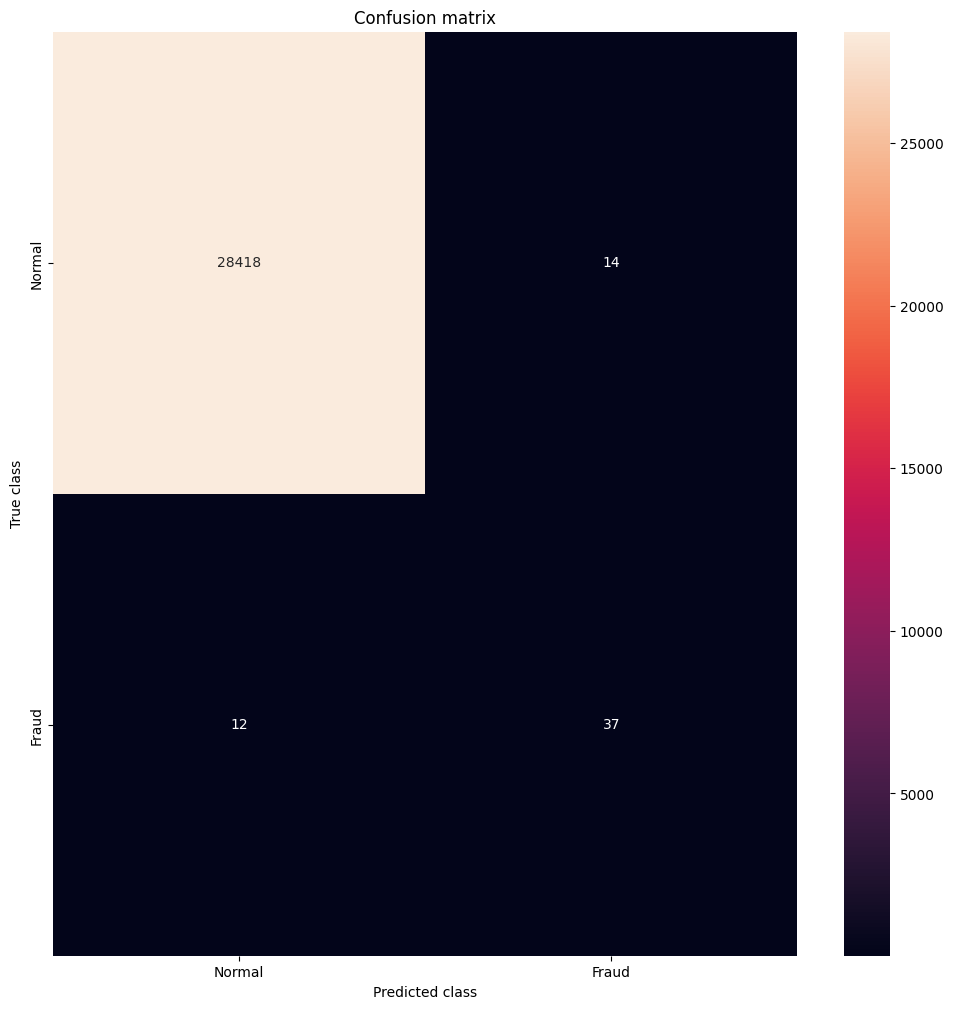

Classification report:- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.73      0.76      0.74        49

    accuracy                           1.00     28481
   macro avg       0.86      0.88      0.87     28481
weighted avg       1.00      1.00      1.00     28481

Accuracy score :- 0.9990871107053826
43.203125
2/2 [==============================] - 0s 4ms/step
231 [D loss: 0.624083, acc: 43.75%, op_acc: 77.34%] [G loss: 0.000000]
2/2 [==============================] - 0s 4ms/step
232 [D loss: 0.496450, acc: 45.31%, op_acc: 81.25%] [G loss: 0.000000]
2/2 [==============================] - 0s 3ms/step
233 [D loss: 0.497797, acc: 44.53%, op_acc: 80.47%] [G loss: 0.000000]
2/2 [==============================] - 0s 5ms/step
234 [D loss: 0.614741, acc: 42.19%, op_acc: 74.22%] [G loss: 0.000000]
2/2 [==============================] - 0s 4ms/step
235 [D loss: 0.564659, acc: 40.62%, op_acc: 74.22%] [G loss: 

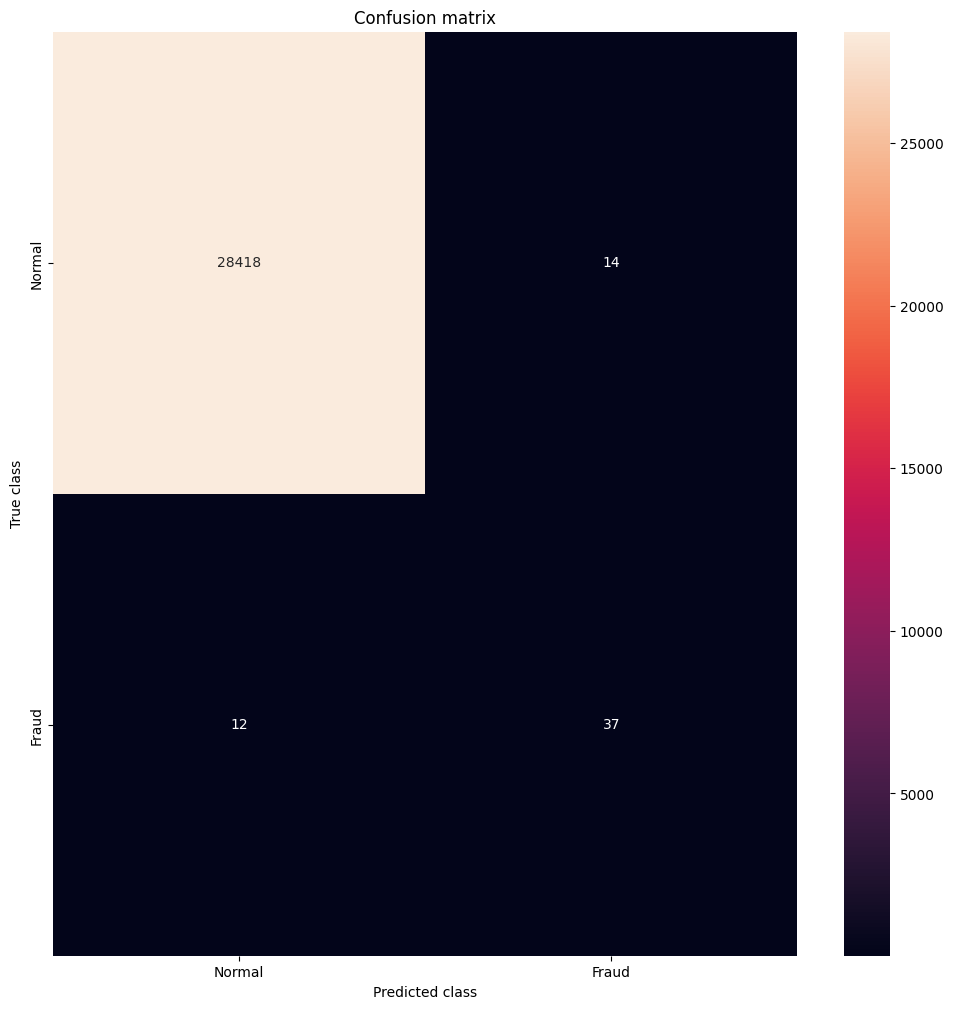

Classification report:- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.73      0.76      0.74        49

    accuracy                           1.00     28481
   macro avg       0.86      0.88      0.87     28481
weighted avg       1.00      1.00      1.00     28481

Accuracy score :- 0.9990871107053826
42.96875
2/2 [==============================] - 0s 4ms/step
241 [D loss: 0.476429, acc: 42.19%, op_acc: 82.03%] [G loss: 0.000000]
2/2 [==============================] - 0s 4ms/step
242 [D loss: 0.581489, acc: 44.53%, op_acc: 78.12%] [G loss: 0.000000]
2/2 [==============================] - 0s 4ms/step
243 [D loss: 0.507310, acc: 42.19%, op_acc: 83.59%] [G loss: 0.000000]
2/2 [==============================] - 0s 4ms/step
244 [D loss: 0.526960, acc: 41.41%, op_acc: 81.25%] [G loss: 0.000000]
2/2 [==============================] - 0s 4ms/step
245 [D loss: 0.487195, acc: 42.19%, op_acc: 82.03%] [G loss: 0

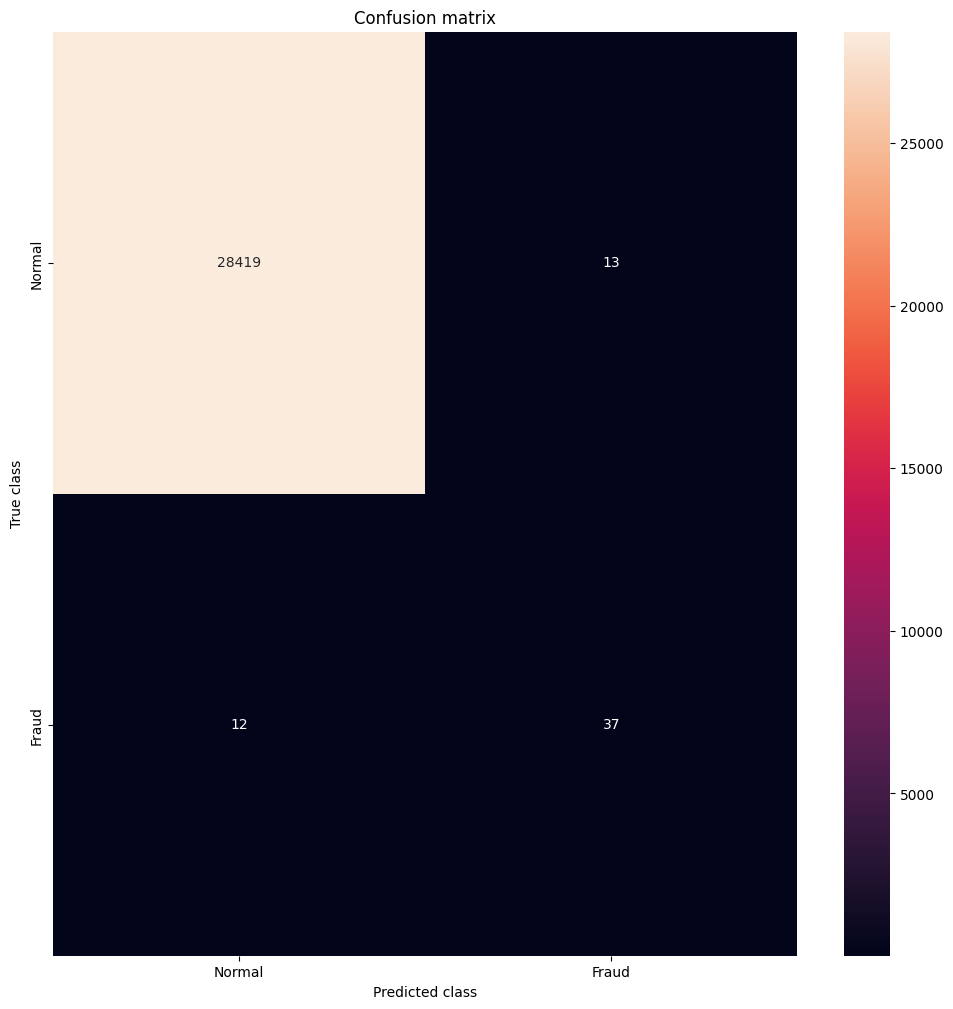

Classification report:- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.74      0.76      0.75        49

    accuracy                           1.00     28481
   macro avg       0.87      0.88      0.87     28481
weighted avg       1.00      1.00      1.00     28481

Accuracy score :- 0.9991222218320986
41.5625
2/2 [==============================] - 0s 4ms/step
251 [D loss: 0.511088, acc: 40.62%, op_acc: 82.03%] [G loss: 0.000000]
2/2 [==============================] - 0s 6ms/step
252 [D loss: 0.415775, acc: 45.31%, op_acc: 87.50%] [G loss: 0.000000]
2/2 [==============================] - 0s 0s/step
253 [D loss: 0.581390, acc: 46.09%, op_acc: 80.47%] [G loss: 0.000000]
2/2 [==============================] - 0s 4ms/step
254 [D loss: 0.532683, acc: 42.19%, op_acc: 79.69%] [G loss: 0.000000]
2/2 [==============================] - 0s 4ms/step
255 [D loss: 0.473251, acc: 40.62%, op_acc: 88.28%] [G loss: 0.0

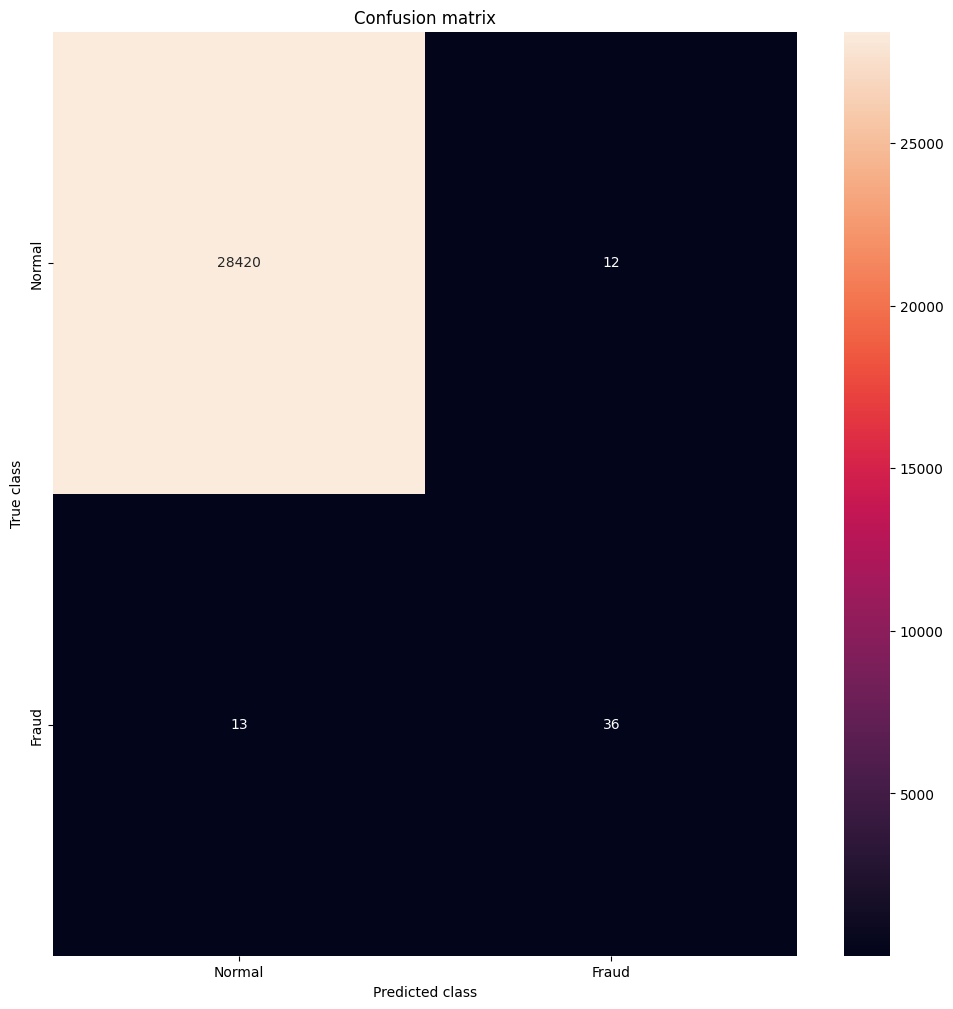

Classification report:- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.75      0.73      0.74        49

    accuracy                           1.00     28481
   macro avg       0.87      0.87      0.87     28481
weighted avg       1.00      1.00      1.00     28481

Accuracy score :- 0.9991222218320986
42.578125
2/2 [==============================] - 0s 4ms/step
261 [D loss: 0.472832, acc: 40.62%, op_acc: 85.16%] [G loss: 0.000000]
2/2 [==============================] - 0s 8ms/step
262 [D loss: 0.488701, acc: 42.97%, op_acc: 83.59%] [G loss: 0.000000]
2/2 [==============================] - 0s 4ms/step
263 [D loss: 0.536982, acc: 41.41%, op_acc: 78.12%] [G loss: 0.000000]
2/2 [==============================] - 0s 7ms/step
264 [D loss: 0.498087, acc: 39.06%, op_acc: 78.12%] [G loss: 0.000000]
2/2 [==============================] - 0s 4ms/step
265 [D loss: 0.505699, acc: 39.84%, op_acc: 81.25%] [G loss: 

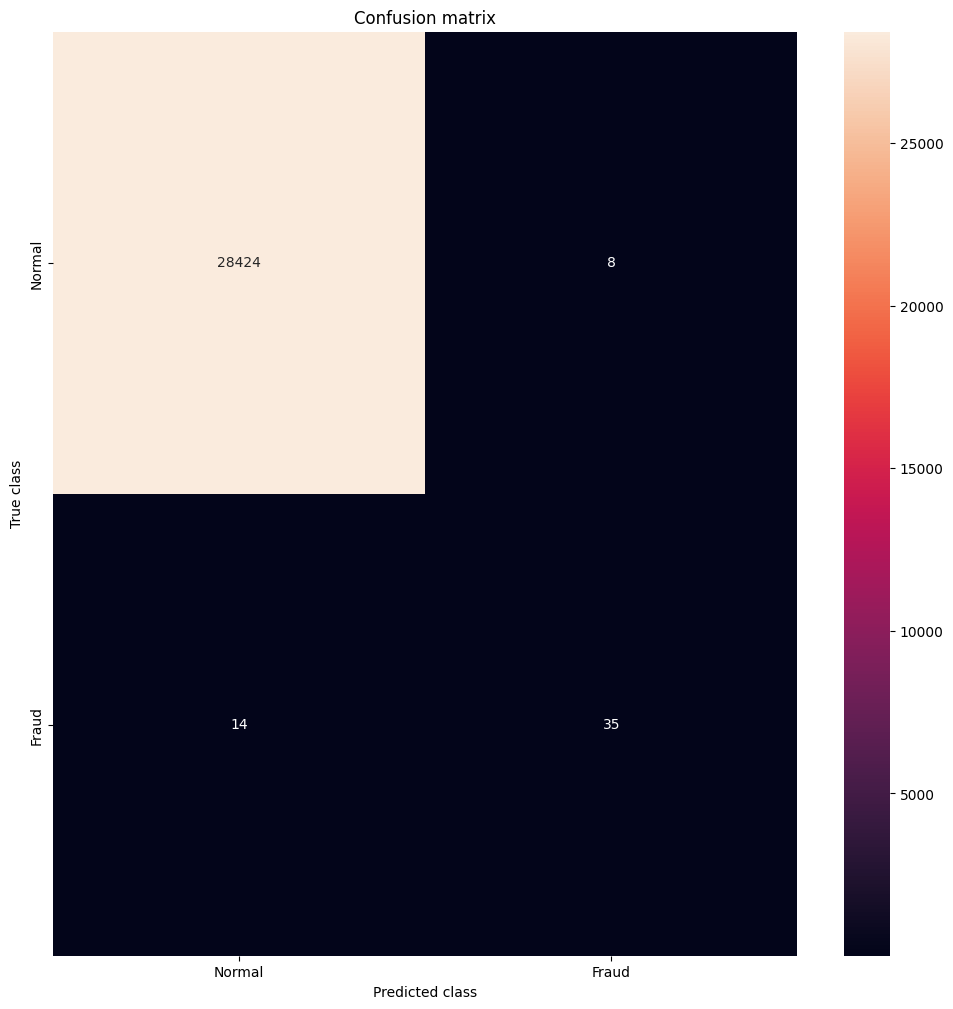

Classification report:- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.81      0.71      0.76        49

    accuracy                           1.00     28481
   macro avg       0.91      0.86      0.88     28481
weighted avg       1.00      1.00      1.00     28481

Accuracy score :- 0.9992275552122467
42.1875
2/2 [==============================] - 0s 4ms/step
271 [D loss: 0.464168, acc: 42.19%, op_acc: 86.72%] [G loss: 0.000000]
2/2 [==============================] - 0s 4ms/step
272 [D loss: 0.514548, acc: 39.84%, op_acc: 82.03%] [G loss: 0.000000]
2/2 [==============================] - 0s 4ms/step
273 [D loss: 0.453186, acc: 41.41%, op_acc: 88.28%] [G loss: 0.000000]
2/2 [==============================] - 0s 4ms/step
274 [D loss: 0.400814, acc: 40.62%, op_acc: 85.94%] [G loss: 0.000000]
2/2 [==============================] - 0s 7ms/step
275 [D loss: 0.492126, acc: 39.84%, op_acc: 85.16%] [G loss: 0.

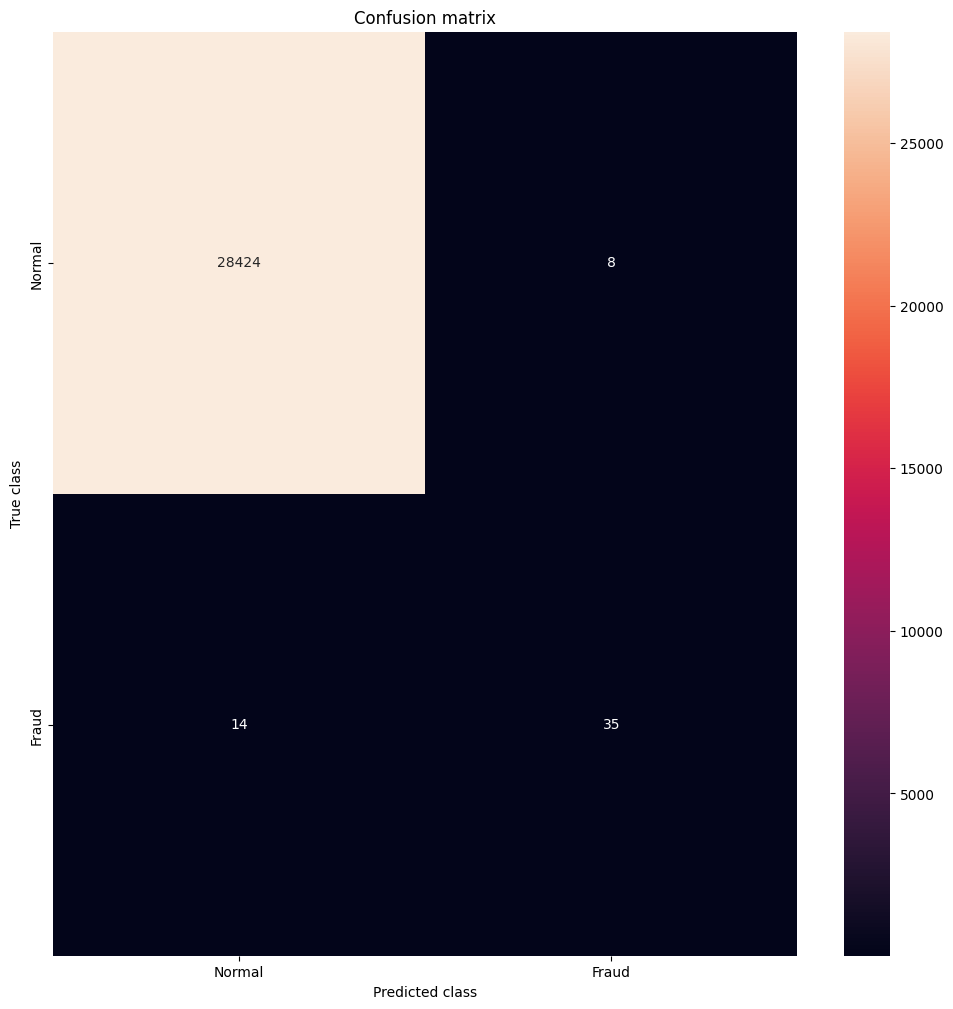

Classification report:- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.81      0.71      0.76        49

    accuracy                           1.00     28481
   macro avg       0.91      0.86      0.88     28481
weighted avg       1.00      1.00      1.00     28481

Accuracy score :- 0.9992275552122467
41.875
2/2 [==============================] - 0s 4ms/step
281 [D loss: 0.529799, acc: 43.75%, op_acc: 82.03%] [G loss: 0.000000]
2/2 [==============================] - 0s 4ms/step
282 [D loss: 0.501868, acc: 39.06%, op_acc: 84.38%] [G loss: 0.000000]
2/2 [==============================] - 0s 8ms/step
283 [D loss: 0.417967, acc: 42.97%, op_acc: 84.38%] [G loss: 0.000000]
2/2 [==============================] - 0s 8ms/step
284 [D loss: 0.394621, acc: 46.88%, op_acc: 93.75%] [G loss: 0.000000]
2/2 [==============================] - 0s 4ms/step
285 [D loss: 0.439024, acc: 41.41%, op_acc: 88.28%] [G loss: 0.0

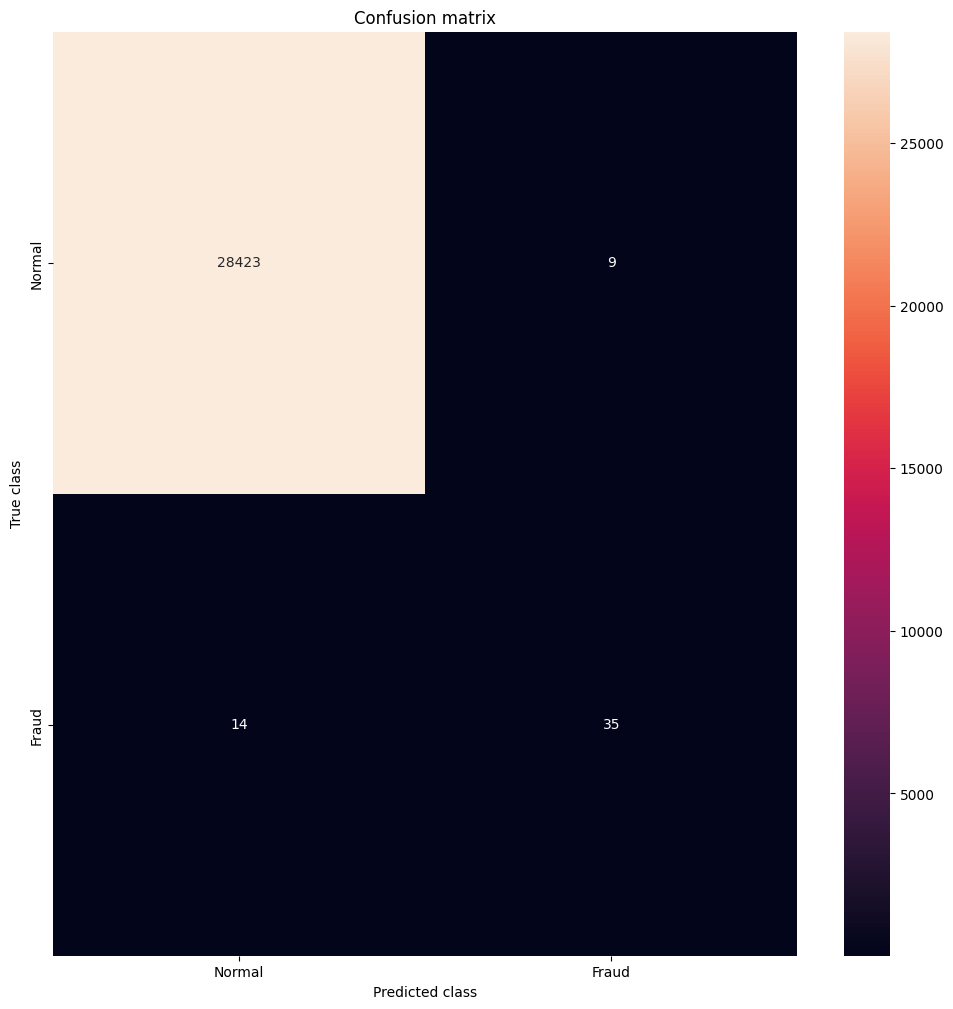

Classification report:- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.80      0.71      0.75        49

    accuracy                           1.00     28481
   macro avg       0.90      0.86      0.88     28481
weighted avg       1.00      1.00      1.00     28481

Accuracy score :- 0.9991924440855307
42.578125
2/2 [==============================] - 0s 7ms/step
291 [D loss: 0.452057, acc: 42.19%, op_acc: 84.38%] [G loss: 0.000000]
2/2 [==============================] - 0s 9ms/step
292 [D loss: 0.494252, acc: 39.06%, op_acc: 84.38%] [G loss: 0.000000]
2/2 [==============================] - 0s 6ms/step
293 [D loss: 0.484508, acc: 41.41%, op_acc: 82.81%] [G loss: 0.000000]
2/2 [==============================] - 0s 4ms/step
294 [D loss: 0.492943, acc: 47.66%, op_acc: 82.03%] [G loss: 0.000000]
2/2 [==============================] - 0s 0s/step
295 [D loss: 0.506246, acc: 40.62%, op_acc: 78.12%] [G loss: 0

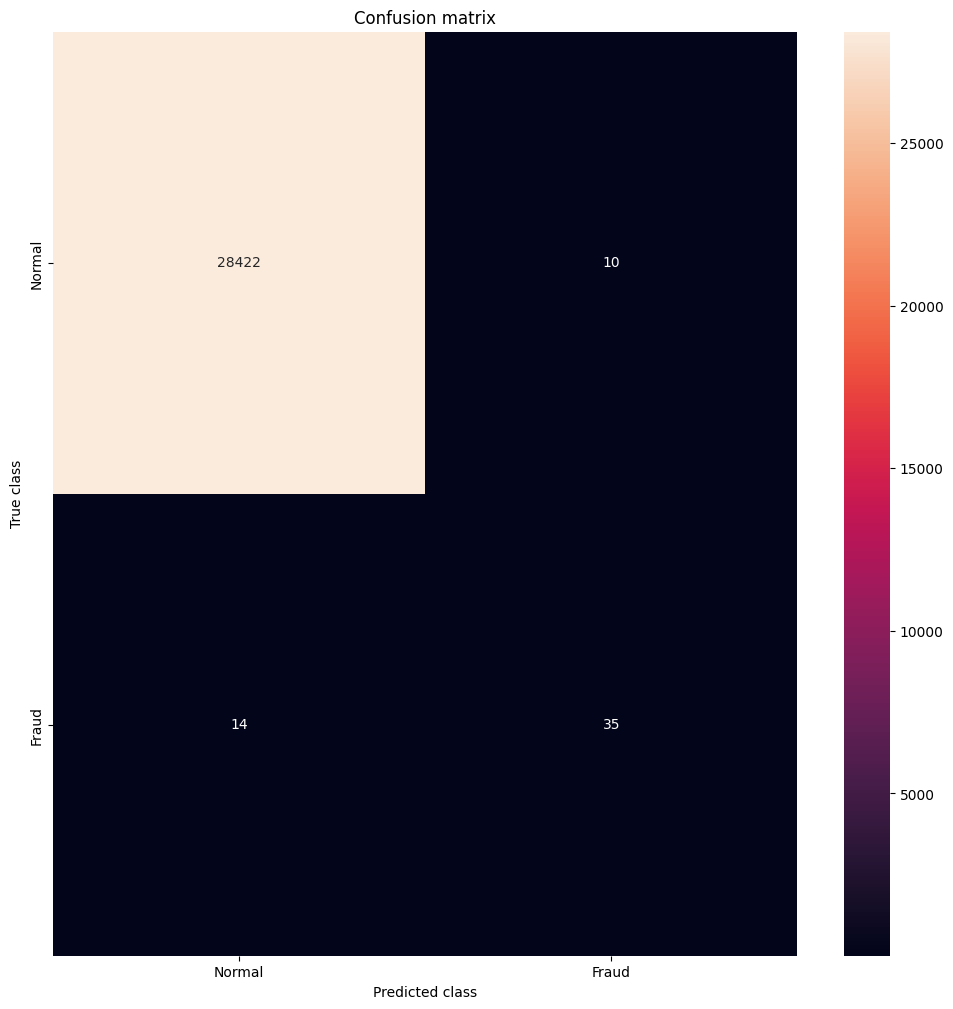

Classification report:- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.78      0.71      0.74        49

    accuracy                           1.00     28481
   macro avg       0.89      0.86      0.87     28481
weighted avg       1.00      1.00      1.00     28481

Accuracy score :- 0.9991573329588147
42.1875
2/2 [==============================] - 0s 4ms/step
301 [D loss: 0.441606, acc: 41.41%, op_acc: 89.06%] [G loss: 0.000000]
2/2 [==============================] - 0s 4ms/step
302 [D loss: 0.404351, acc: 39.84%, op_acc: 89.84%] [G loss: 0.000000]
2/2 [==============================] - 0s 4ms/step
303 [D loss: 0.380902, acc: 39.84%, op_acc: 89.06%] [G loss: 0.000000]
2/2 [==============================] - 0s 8ms/step
304 [D loss: 0.525314, acc: 40.62%, op_acc: 81.25%] [G loss: 0.000000]
2/2 [==============================] - 0s 8ms/step
305 [D loss: 0.497018, acc: 43.75%, op_acc: 82.03%] [G loss: 0.

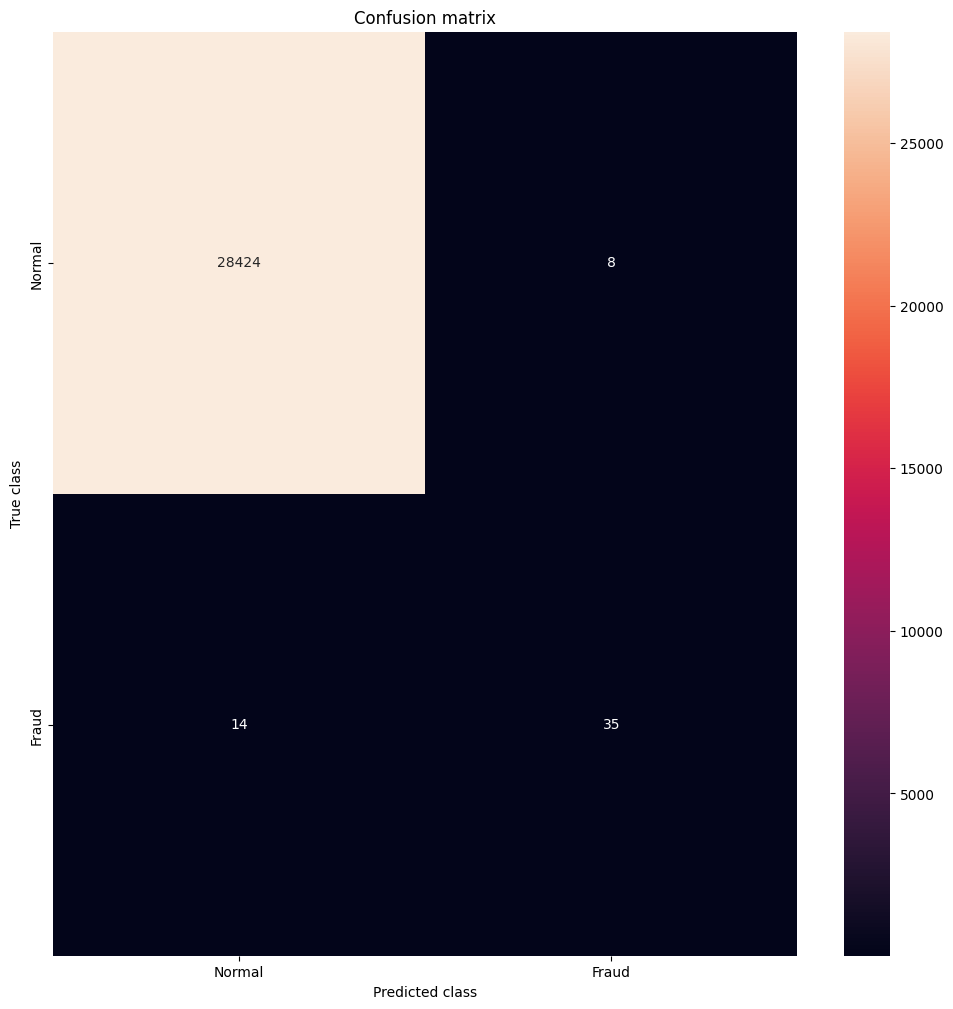

Classification report:- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.81      0.71      0.76        49

    accuracy                           1.00     28481
   macro avg       0.91      0.86      0.88     28481
weighted avg       1.00      1.00      1.00     28481

Accuracy score :- 0.9992275552122467
41.25
2/2 [==============================] - 0s 6ms/step
311 [D loss: 0.420871, acc: 39.84%, op_acc: 85.94%] [G loss: 0.000000]
2/2 [==============================] - 0s 3ms/step
312 [D loss: 0.559942, acc: 42.97%, op_acc: 80.47%] [G loss: 0.000000]
2/2 [==============================] - 0s 4ms/step
313 [D loss: 0.367125, acc: 43.75%, op_acc: 89.06%] [G loss: 0.000000]
2/2 [==============================] - 0s 5ms/step
314 [D loss: 0.422420, acc: 42.97%, op_acc: 89.84%] [G loss: 0.000000]
2/2 [==============================] - 0s 4ms/step
315 [D loss: 0.490240, acc: 42.19%, op_acc: 87.50%] [G loss: 0.00

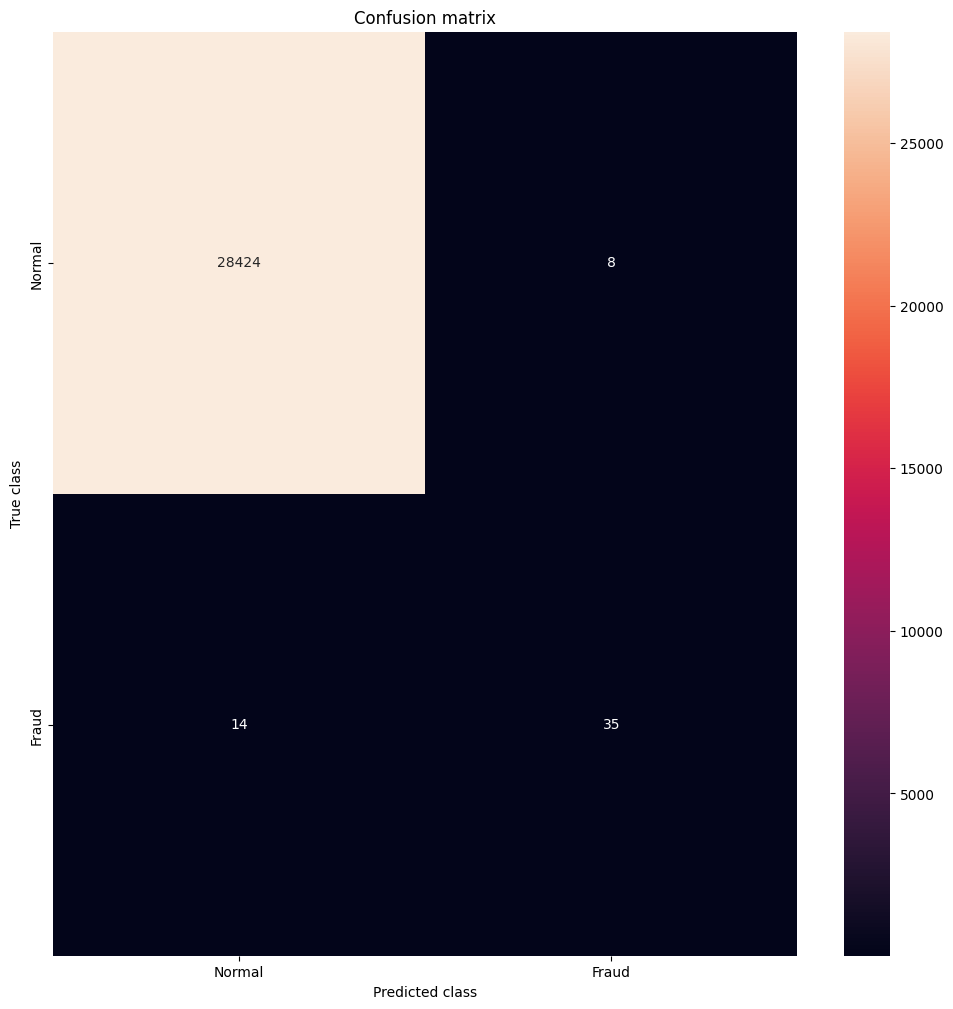

Classification report:- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.81      0.71      0.76        49

    accuracy                           1.00     28481
   macro avg       0.91      0.86      0.88     28481
weighted avg       1.00      1.00      1.00     28481

Accuracy score :- 0.9992275552122467
42.265625
2/2 [==============================] - 0s 5ms/step
321 [D loss: 0.446368, acc: 42.97%, op_acc: 82.81%] [G loss: 0.000000]
2/2 [==============================] - 0s 3ms/step
322 [D loss: 0.434940, acc: 38.28%, op_acc: 84.38%] [G loss: 0.000000]
2/2 [==============================] - 0s 7ms/step
323 [D loss: 0.371003, acc: 39.06%, op_acc: 91.41%] [G loss: 0.000000]
2/2 [==============================] - 0s 4ms/step
324 [D loss: 0.417763, acc: 41.41%, op_acc: 84.38%] [G loss: 0.000000]
2/2 [==============================] - 0s 7ms/step
325 [D loss: 0.402043, acc: 41.41%, op_acc: 85.94%] [G loss: 

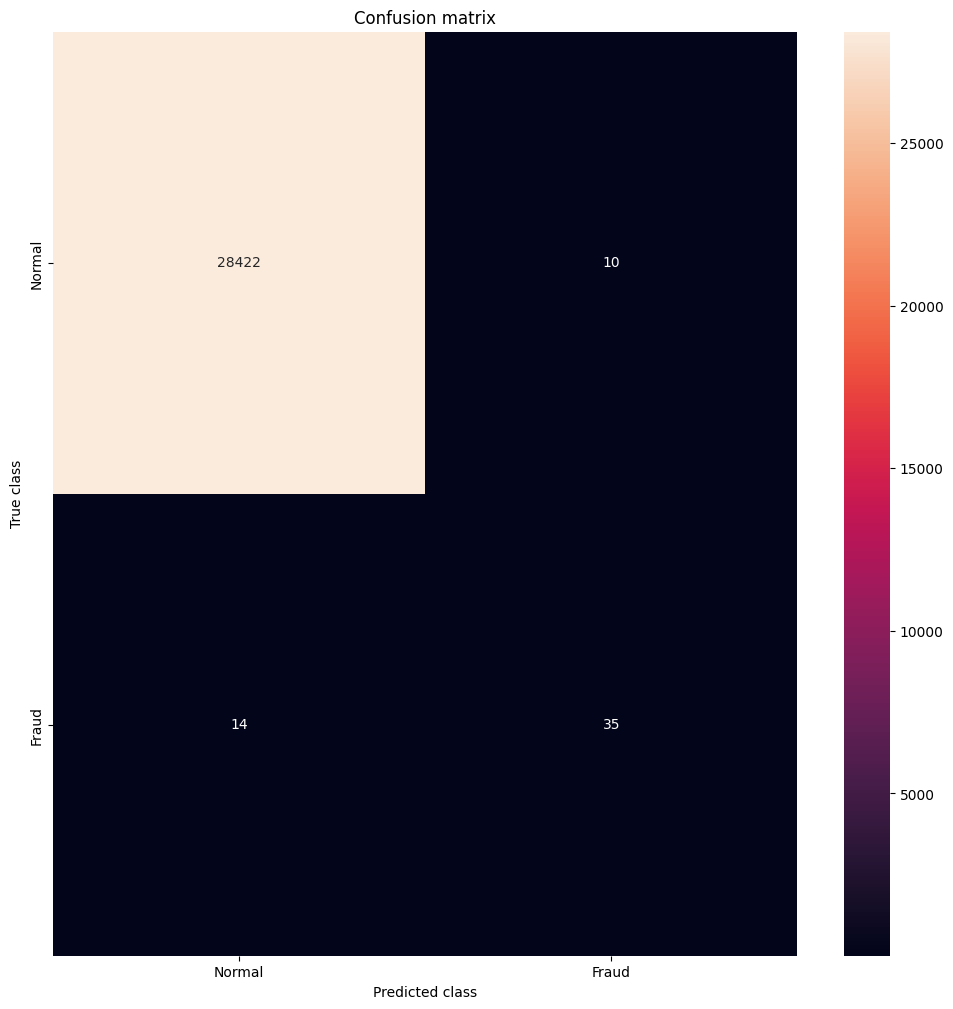

Classification report:- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.78      0.71      0.74        49

    accuracy                           1.00     28481
   macro avg       0.89      0.86      0.87     28481
weighted avg       1.00      1.00      1.00     28481

Accuracy score :- 0.9991573329588147
40.15625
2/2 [==============================] - 0s 4ms/step
331 [D loss: 0.398269, acc: 42.97%, op_acc: 87.50%] [G loss: 0.000000]
2/2 [==============================] - 0s 4ms/step
332 [D loss: 0.410482, acc: 41.41%, op_acc: 85.16%] [G loss: 0.000000]
2/2 [==============================] - 0s 9ms/step
333 [D loss: 0.436996, acc: 40.62%, op_acc: 85.16%] [G loss: 0.000000]
2/2 [==============================] - 0s 8ms/step
334 [D loss: 0.349166, acc: 41.41%, op_acc: 89.84%] [G loss: 0.000000]
2/2 [==============================] - 0s 8ms/step
335 [D loss: 0.398423, acc: 42.19%, op_acc: 88.28%] [G loss: 0

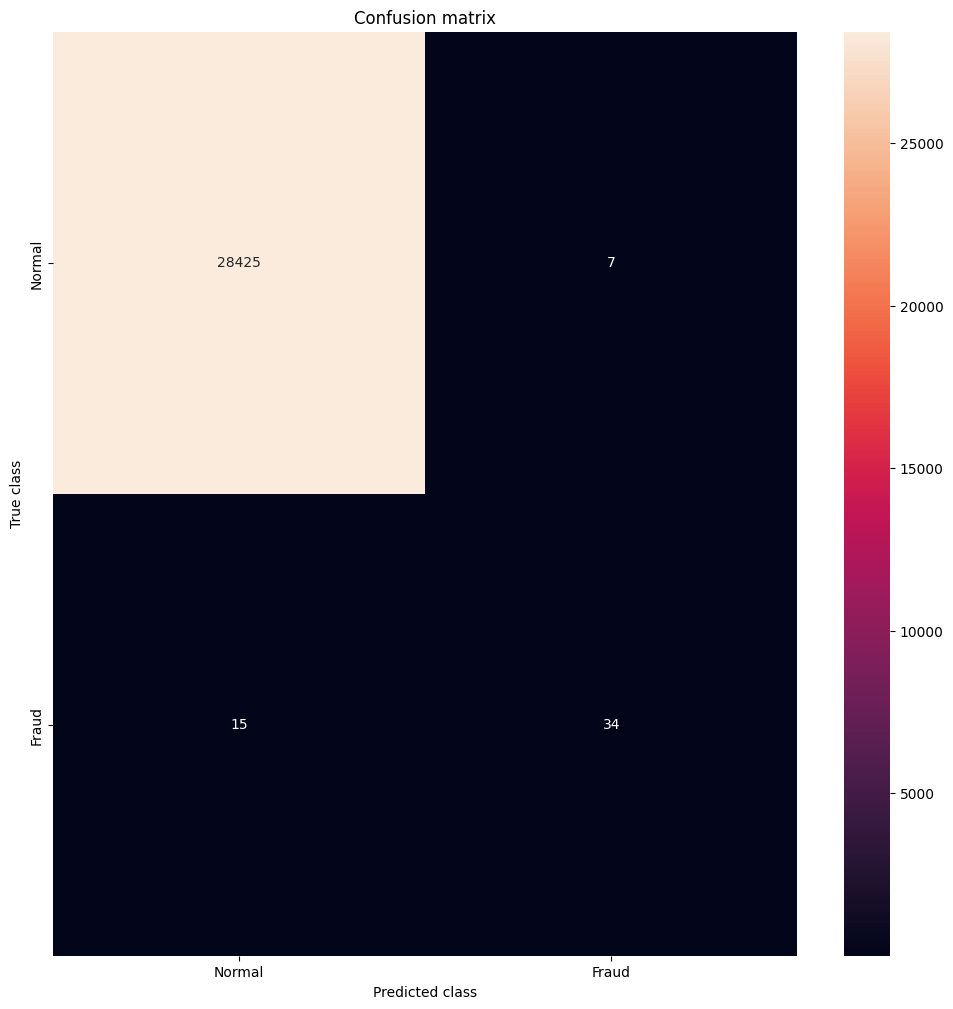

Classification report:- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.83      0.69      0.76        49

    accuracy                           1.00     28481
   macro avg       0.91      0.85      0.88     28481
weighted avg       1.00      1.00      1.00     28481

Accuracy score :- 0.9992275552122467
41.640625
2/2 [==============================] - 0s 4ms/step
341 [D loss: 0.455219, acc: 39.06%, op_acc: 86.72%] [G loss: 0.000000]
2/2 [==============================] - 0s 4ms/step
342 [D loss: 0.411260, acc: 42.19%, op_acc: 88.28%] [G loss: 0.000000]
2/2 [==============================] - 0s 8ms/step
343 [D loss: 0.373557, acc: 41.41%, op_acc: 88.28%] [G loss: 0.000000]
2/2 [==============================] - 0s 7ms/step
344 [D loss: 0.322382, acc: 42.97%, op_acc: 90.62%] [G loss: 0.000000]
2/2 [==============================] - 0s 8ms/step
345 [D loss: 0.474671, acc: 43.75%, op_acc: 85.94%] [G loss: 

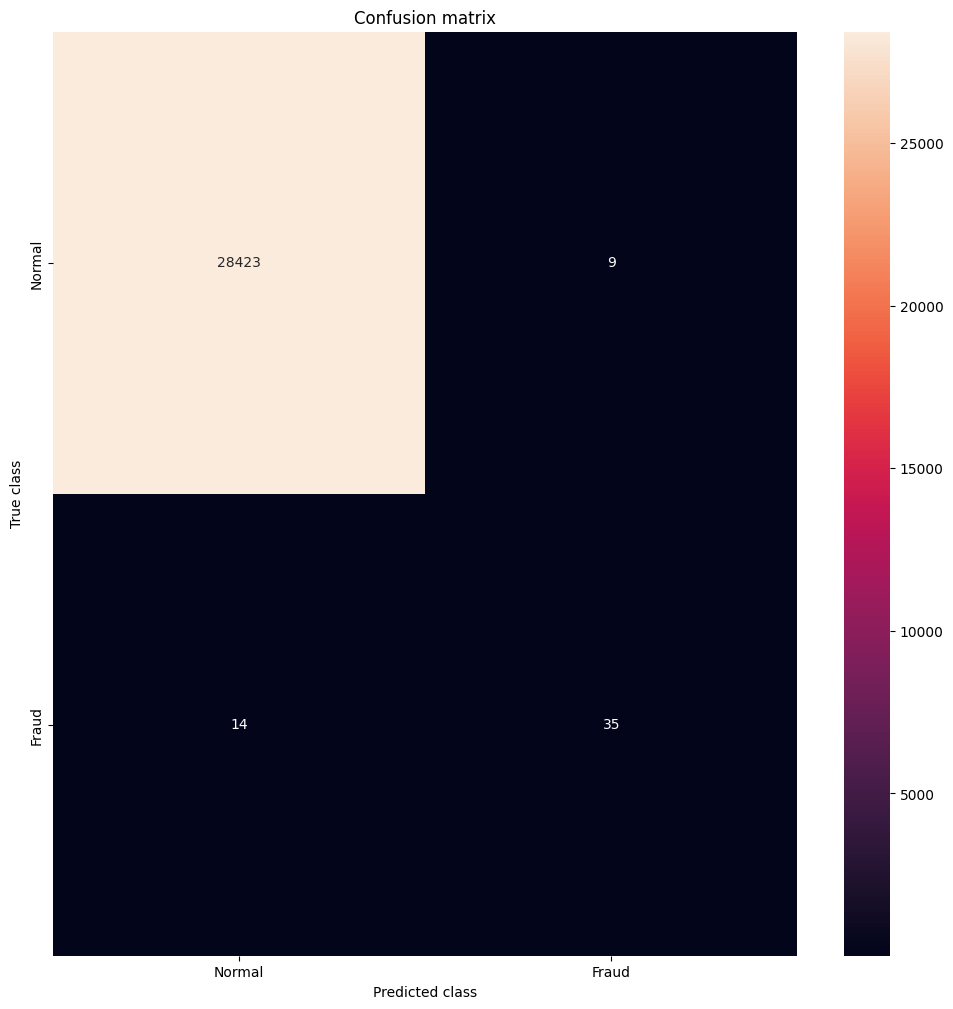

Classification report:- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.80      0.71      0.75        49

    accuracy                           1.00     28481
   macro avg       0.90      0.86      0.88     28481
weighted avg       1.00      1.00      1.00     28481

Accuracy score :- 0.9991924440855307
41.5625
2/2 [==============================] - 0s 4ms/step
351 [D loss: 0.423284, acc: 42.97%, op_acc: 81.25%] [G loss: 0.000000]
2/2 [==============================] - 0s 4ms/step
352 [D loss: 0.361263, acc: 41.41%, op_acc: 89.84%] [G loss: 0.000000]
2/2 [==============================] - 0s 4ms/step
353 [D loss: 0.452132, acc: 38.28%, op_acc: 83.59%] [G loss: 0.000000]
2/2 [==============================] - 0s 4ms/step
354 [D loss: 0.336618, acc: 41.41%, op_acc: 92.19%] [G loss: 0.000000]
2/2 [==============================] - 0s 4ms/step
355 [D loss: 0.384762, acc: 40.62%, op_acc: 87.50%] [G loss: 0.

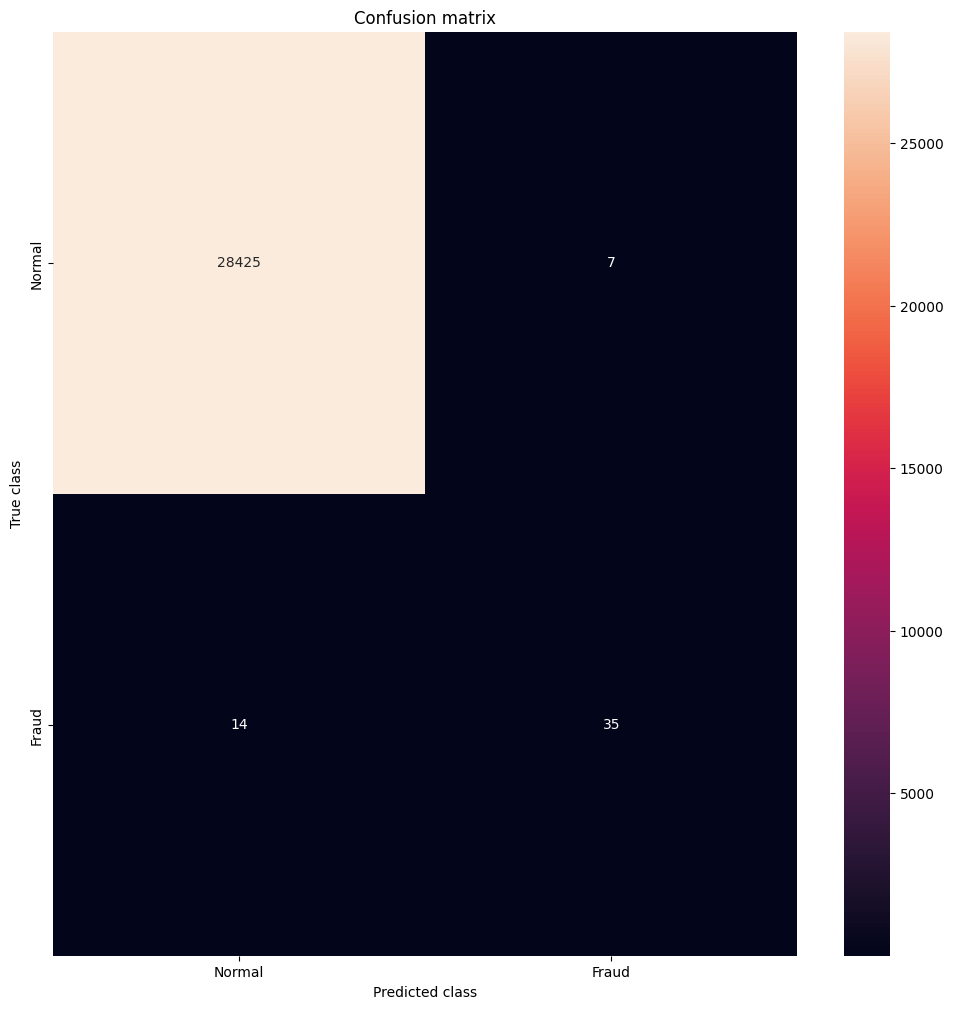

Classification report:- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.83      0.71      0.77        49

    accuracy                           1.00     28481
   macro avg       0.92      0.86      0.88     28481
weighted avg       1.00      1.00      1.00     28481

Accuracy score :- 0.9992626663389628
41.25
2/2 [==============================] - 0s 19ms/step
361 [D loss: 0.452932, acc: 40.62%, op_acc: 85.94%] [G loss: 0.000000]
2/2 [==============================] - 0s 4ms/step
362 [D loss: 0.340407, acc: 42.19%, op_acc: 90.62%] [G loss: 0.000000]
2/2 [==============================] - 0s 8ms/step
363 [D loss: 0.422633, acc: 40.62%, op_acc: 84.38%] [G loss: 0.000000]
2/2 [==============================] - 0s 4ms/step
364 [D loss: 0.337914, acc: 42.19%, op_acc: 89.06%] [G loss: 0.000000]
2/2 [==============================] - 0s 4ms/step
365 [D loss: 0.352381, acc: 43.75%, op_acc: 88.28%] [G loss: 0.0

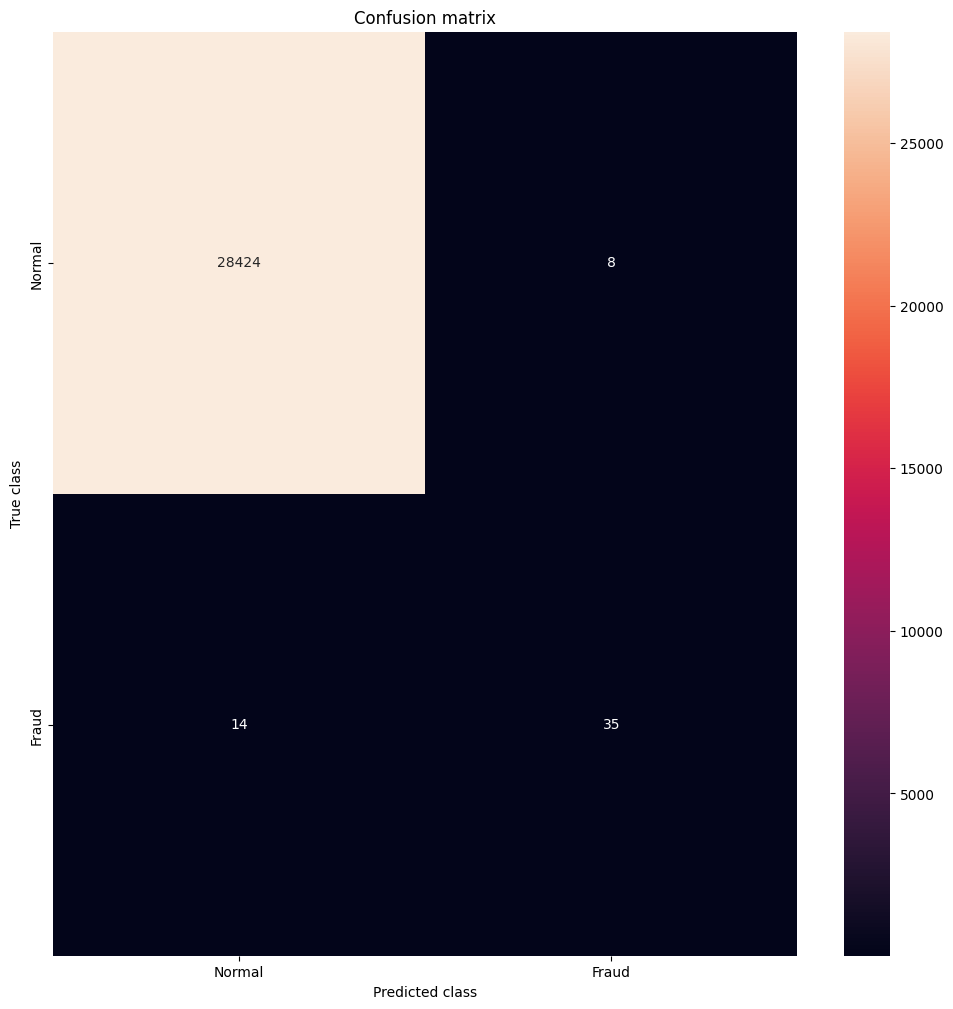

Classification report:- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.81      0.71      0.76        49

    accuracy                           1.00     28481
   macro avg       0.91      0.86      0.88     28481
weighted avg       1.00      1.00      1.00     28481

Accuracy score :- 0.9992275552122467
40.9375
2/2 [==============================] - 0s 8ms/step
371 [D loss: 0.415759, acc: 37.50%, op_acc: 83.59%] [G loss: 0.000000]
2/2 [==============================] - 0s 4ms/step
372 [D loss: 0.354526, acc: 39.84%, op_acc: 91.41%] [G loss: 0.000000]
2/2 [==============================] - 0s 7ms/step
373 [D loss: 0.295237, acc: 41.41%, op_acc: 92.97%] [G loss: 0.000000]
2/2 [==============================] - 0s 4ms/step
374 [D loss: 0.433519, acc: 43.75%, op_acc: 84.38%] [G loss: 0.000000]
2/2 [==============================] - 0s 2ms/step
375 [D loss: 0.424176, acc: 39.84%, op_acc: 81.25%] [G loss: 0.

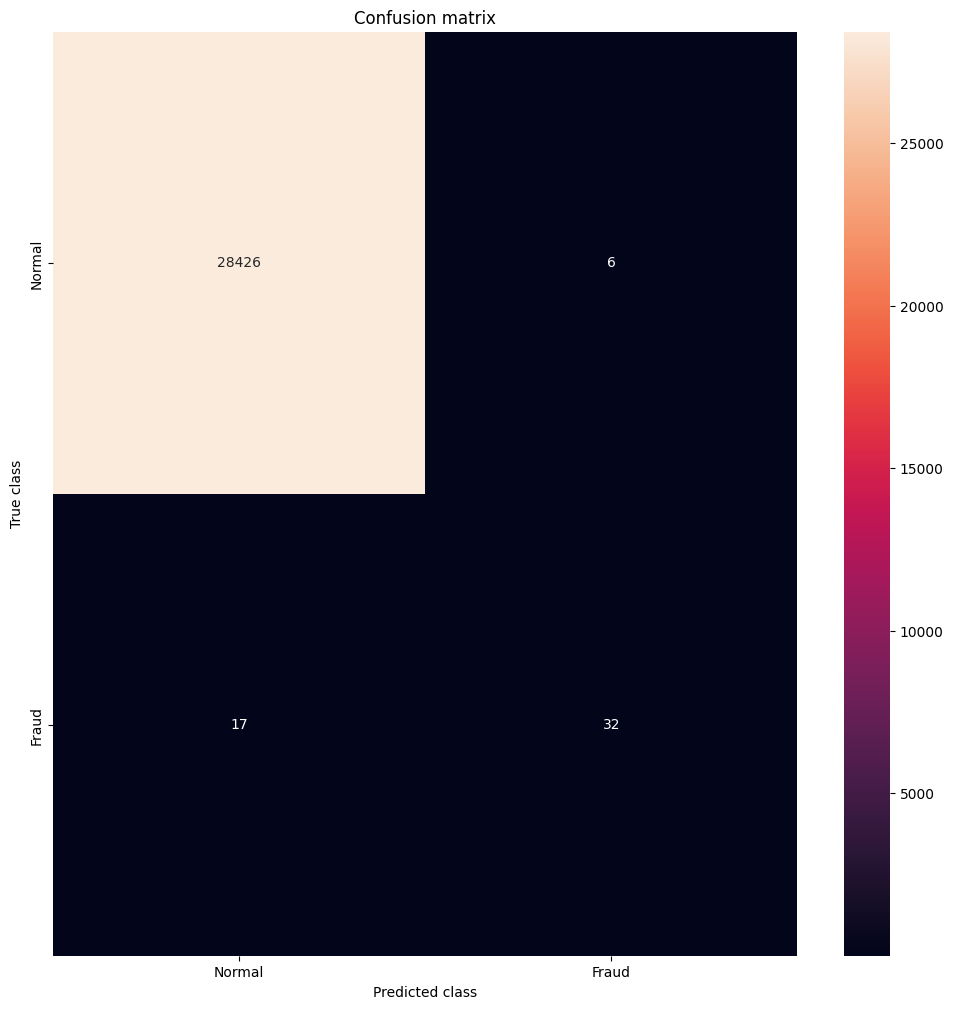

Classification report:- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.84      0.65      0.74        49

    accuracy                           1.00     28481
   macro avg       0.92      0.83      0.87     28481
weighted avg       1.00      1.00      1.00     28481

Accuracy score :- 0.9991924440855307
40.859375
2/2 [==============================] - 0s 4ms/step
381 [D loss: 0.376445, acc: 41.41%, op_acc: 86.72%] [G loss: 0.000000]
2/2 [==============================] - 0s 6ms/step
382 [D loss: 0.346887, acc: 39.06%, op_acc: 91.41%] [G loss: 0.000000]
2/2 [==============================] - 0s 6ms/step
383 [D loss: 0.419652, acc: 39.84%, op_acc: 87.50%] [G loss: 0.000000]
2/2 [==============================] - 0s 4ms/step
384 [D loss: 0.358111, acc: 40.62%, op_acc: 85.94%] [G loss: 0.000000]
2/2 [==============================] - 0s 4ms/step
385 [D loss: 0.469526, acc: 42.97%, op_acc: 85.94%] [G loss: 

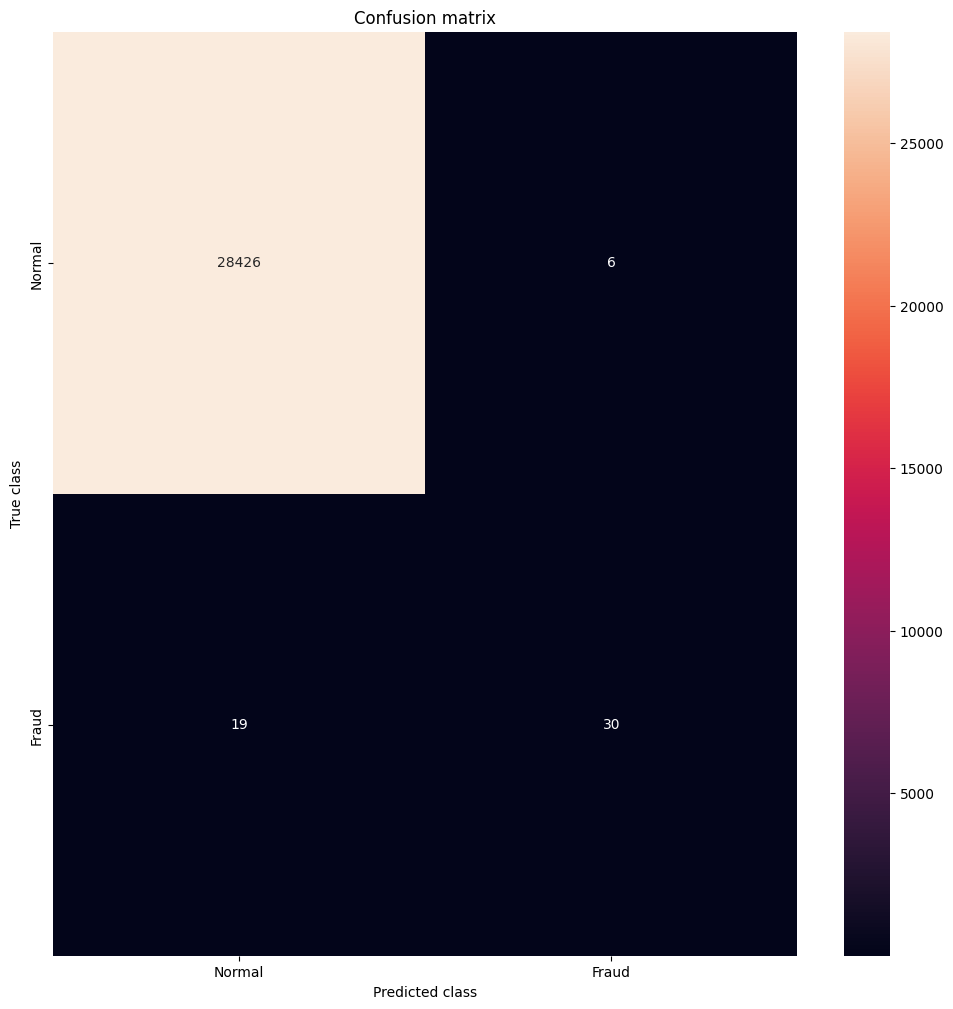

Classification report:- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.83      0.61      0.71        49

    accuracy                           1.00     28481
   macro avg       0.92      0.81      0.85     28481
weighted avg       1.00      1.00      1.00     28481

Accuracy score :- 0.9991222218320986
41.484375
2/2 [==============================] - 0s 7ms/step
391 [D loss: 0.354897, acc: 42.97%, op_acc: 90.62%] [G loss: 0.000000]
2/2 [==============================] - 0s 4ms/step
392 [D loss: 0.401557, acc: 39.06%, op_acc: 85.94%] [G loss: 0.000000]
2/2 [==============================] - 0s 4ms/step
393 [D loss: 0.418163, acc: 42.19%, op_acc: 88.28%] [G loss: 0.000000]
2/2 [==============================] - 0s 4ms/step
394 [D loss: 0.377221, acc: 40.62%, op_acc: 88.28%] [G loss: 0.000000]
2/2 [==============================] - 0s 5ms/step
395 [D loss: 0.413783, acc: 39.06%, op_acc: 87.50%] [G loss: 

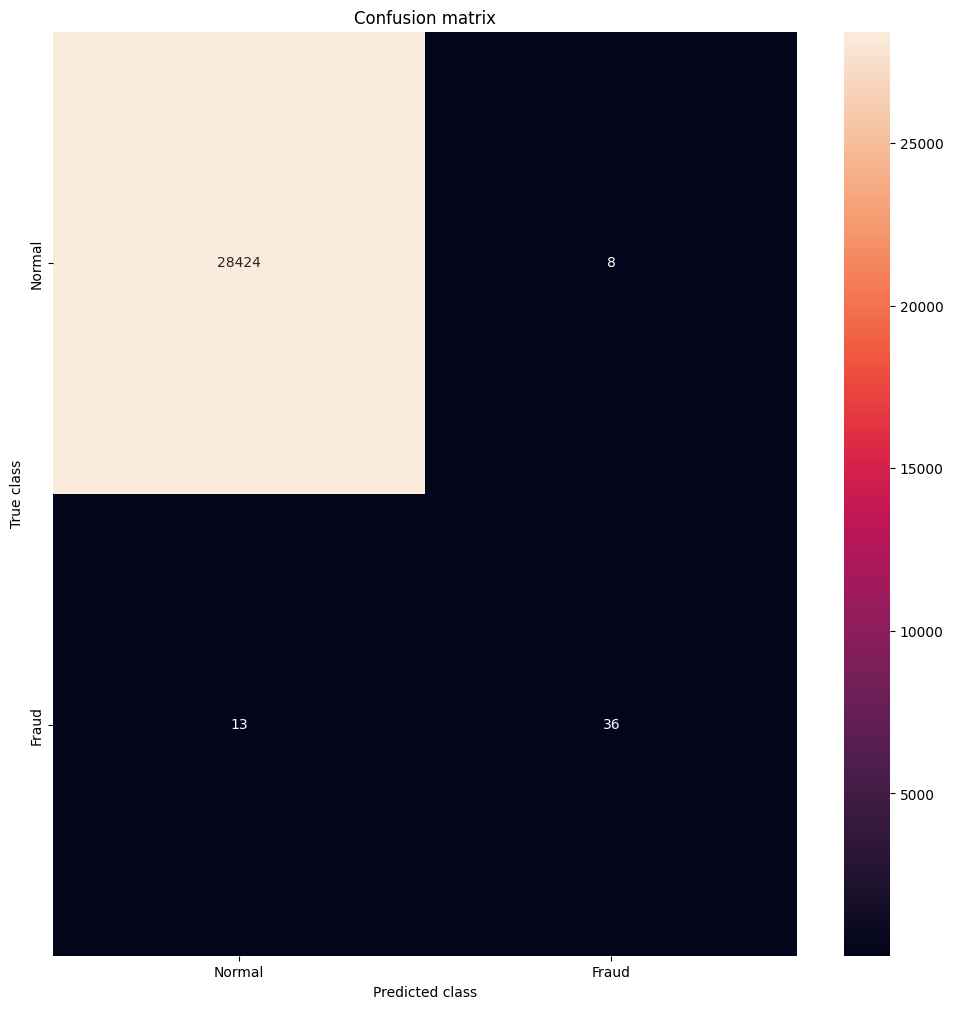

Classification report:- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.82      0.73      0.77        49

    accuracy                           1.00     28481
   macro avg       0.91      0.87      0.89     28481
weighted avg       1.00      1.00      1.00     28481

Accuracy score :- 0.9992626663389628
40.703125
2/2 [==============================] - 0s 8ms/step
401 [D loss: 0.384398, acc: 40.62%, op_acc: 87.50%] [G loss: 0.000000]
2/2 [==============================] - 0s 6ms/step
402 [D loss: 0.326893, acc: 39.84%, op_acc: 92.19%] [G loss: 0.000000]
2/2 [==============================] - 0s 7ms/step
403 [D loss: 0.333759, acc: 41.41%, op_acc: 91.41%] [G loss: 0.000000]
2/2 [==============================] - 0s 4ms/step
404 [D loss: 0.364743, acc: 40.62%, op_acc: 84.38%] [G loss: 0.000000]
2/2 [==============================] - 0s 4ms/step
405 [D loss: 0.338071, acc: 38.28%, op_acc: 88.28%] [G loss: 

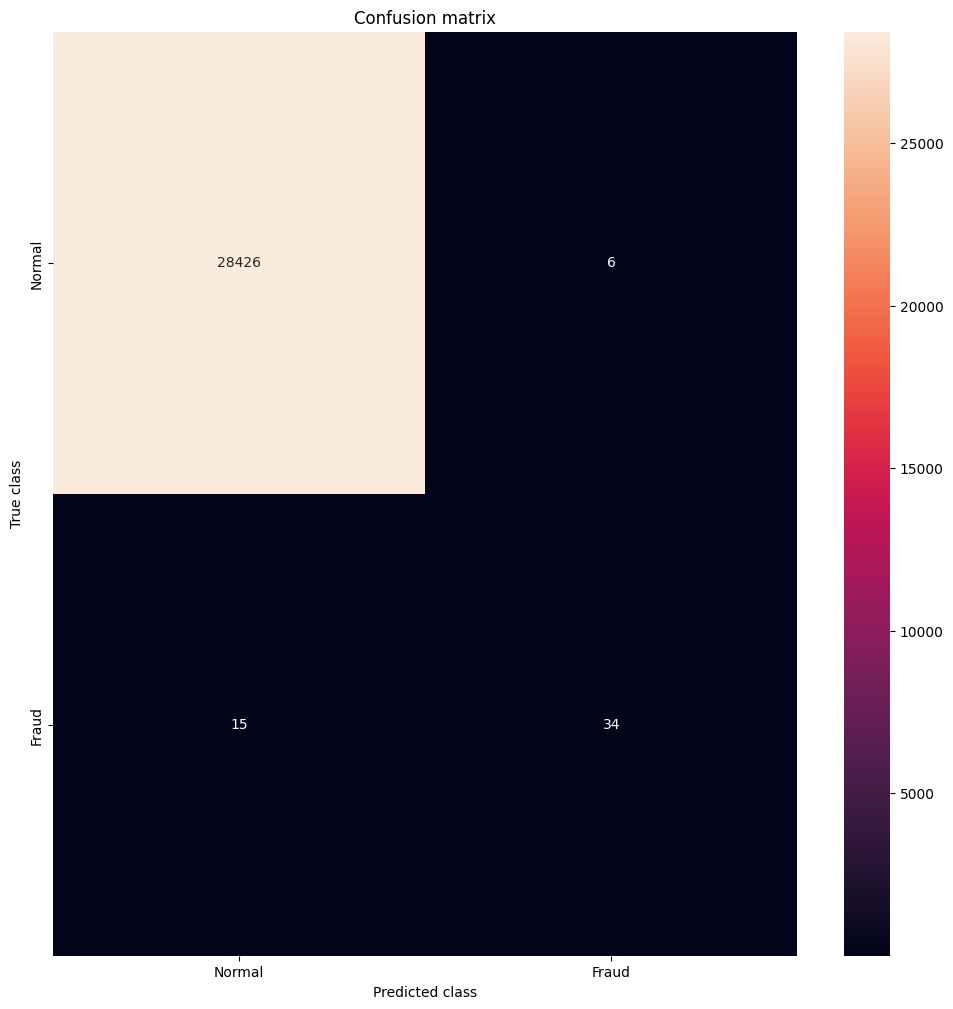

Classification report:- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.85      0.69      0.76        49

    accuracy                           1.00     28481
   macro avg       0.92      0.85      0.88     28481
weighted avg       1.00      1.00      1.00     28481

Accuracy score :- 0.9992626663389628
40.859375
2/2 [==============================] - 0s 4ms/step
411 [D loss: 0.337376, acc: 39.84%, op_acc: 87.50%] [G loss: 0.000000]
2/2 [==============================] - 0s 6ms/step
412 [D loss: 0.331977, acc: 38.28%, op_acc: 90.62%] [G loss: 0.000000]
2/2 [==============================] - 0s 4ms/step
413 [D loss: 0.346942, acc: 39.06%, op_acc: 88.28%] [G loss: 0.000000]
2/2 [==============================] - 0s 5ms/step
414 [D loss: 0.362594, acc: 39.84%, op_acc: 89.84%] [G loss: 0.000000]
2/2 [==============================] - 0s 4ms/step
415 [D loss: 0.382462, acc: 40.62%, op_acc: 87.50%] [G loss: 

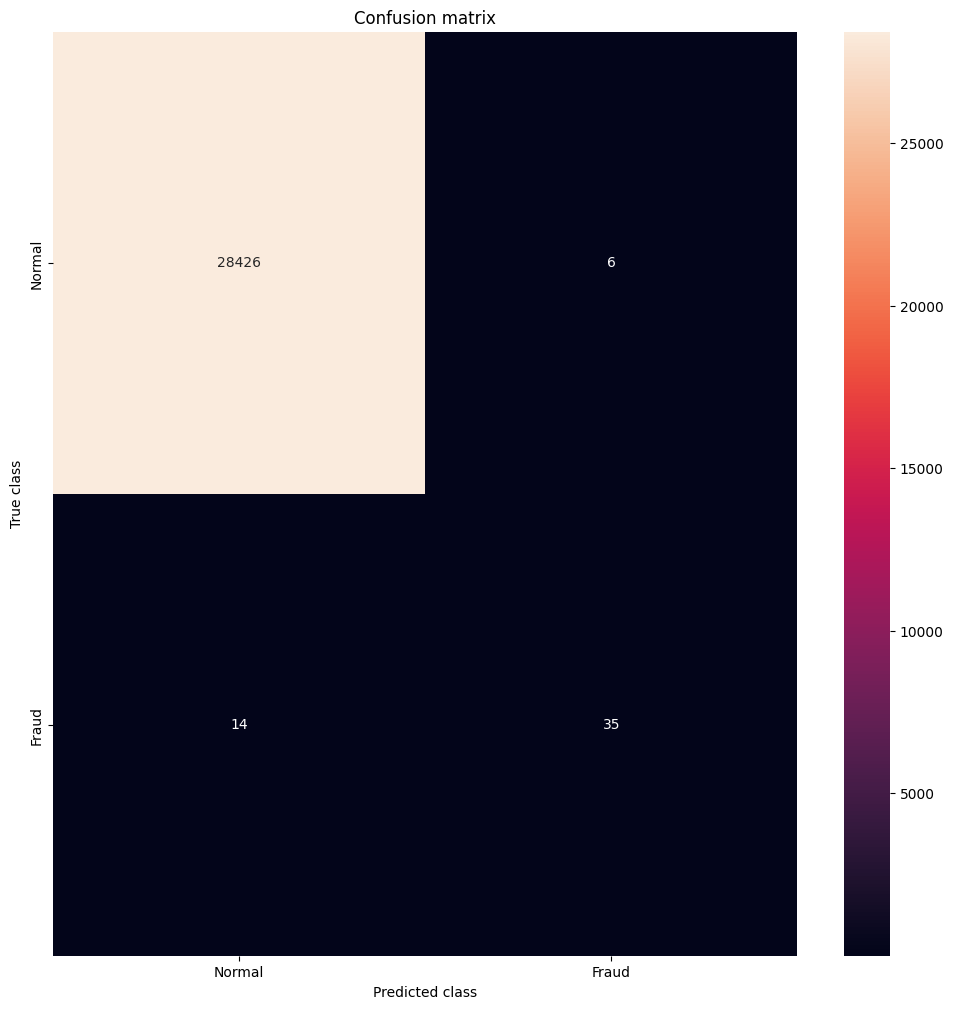

Classification report:- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.85      0.71      0.78        49

    accuracy                           1.00     28481
   macro avg       0.93      0.86      0.89     28481
weighted avg       1.00      1.00      1.00     28481

Accuracy score :- 0.9992977774656788
40.546875
2/2 [==============================] - 0s 8ms/step
421 [D loss: 0.375005, acc: 42.19%, op_acc: 85.94%] [G loss: 0.000000]
2/2 [==============================] - 0s 9ms/step
422 [D loss: 0.458603, acc: 39.06%, op_acc: 85.16%] [G loss: 0.000000]
2/2 [==============================] - 0s 4ms/step
423 [D loss: 0.377144, acc: 44.53%, op_acc: 85.16%] [G loss: 0.000000]
2/2 [==============================] - 0s 8ms/step
424 [D loss: 0.302541, acc: 40.62%, op_acc: 90.62%] [G loss: 0.000000]
2/2 [==============================] - 0s 9ms/step
425 [D loss: 0.316409, acc: 39.84%, op_acc: 90.62%] [G loss: 

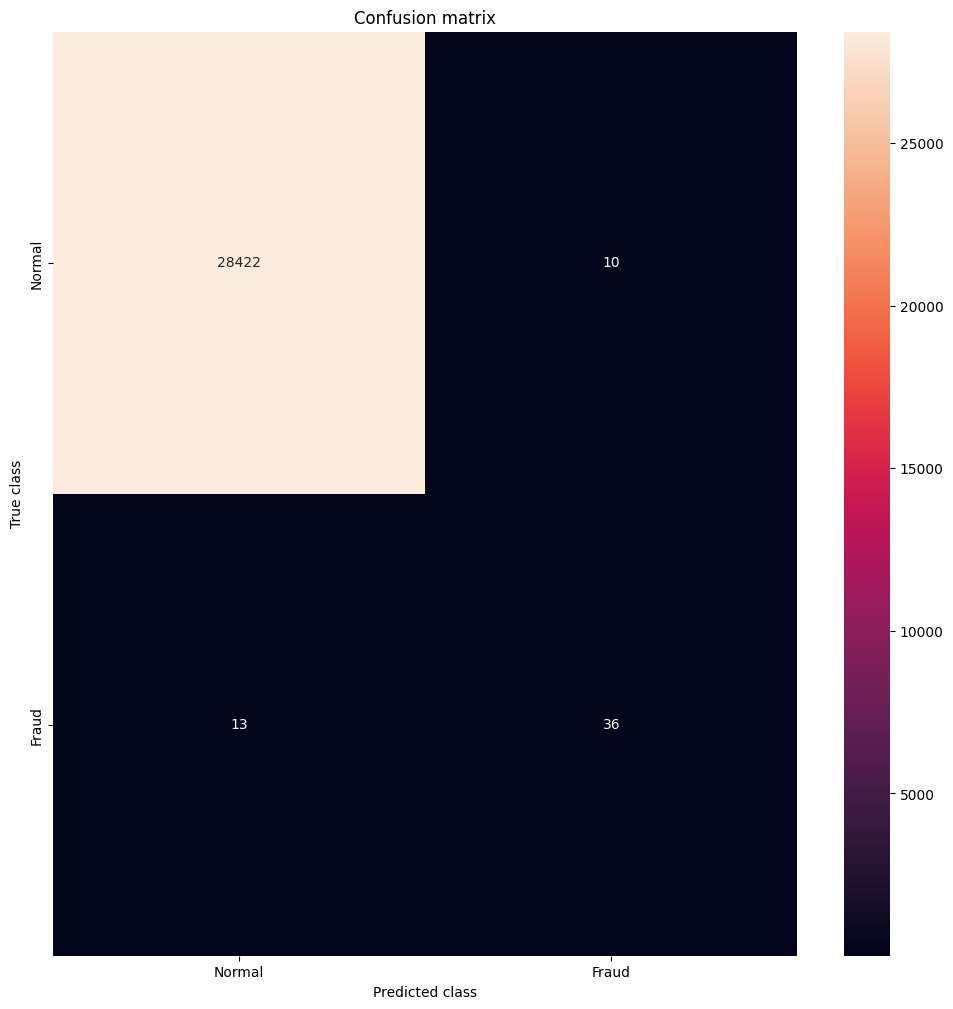

Classification report:- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.78      0.73      0.76        49

    accuracy                           1.00     28481
   macro avg       0.89      0.87      0.88     28481
weighted avg       1.00      1.00      1.00     28481

Accuracy score :- 0.9991924440855307
40.46875
2/2 [==============================] - 0s 4ms/step
431 [D loss: 0.310993, acc: 39.06%, op_acc: 90.62%] [G loss: 0.000000]
2/2 [==============================] - 0s 4ms/step
432 [D loss: 0.379800, acc: 41.41%, op_acc: 85.16%] [G loss: 0.000000]
2/2 [==============================] - 0s 7ms/step
433 [D loss: 0.267891, acc: 40.62%, op_acc: 93.75%] [G loss: 0.000000]
2/2 [==============================] - 0s 4ms/step
434 [D loss: 0.372279, acc: 39.84%, op_acc: 87.50%] [G loss: 0.000000]
2/2 [==============================] - 0s 5ms/step
435 [D loss: 0.321670, acc: 42.19%, op_acc: 86.72%] [G loss: 0

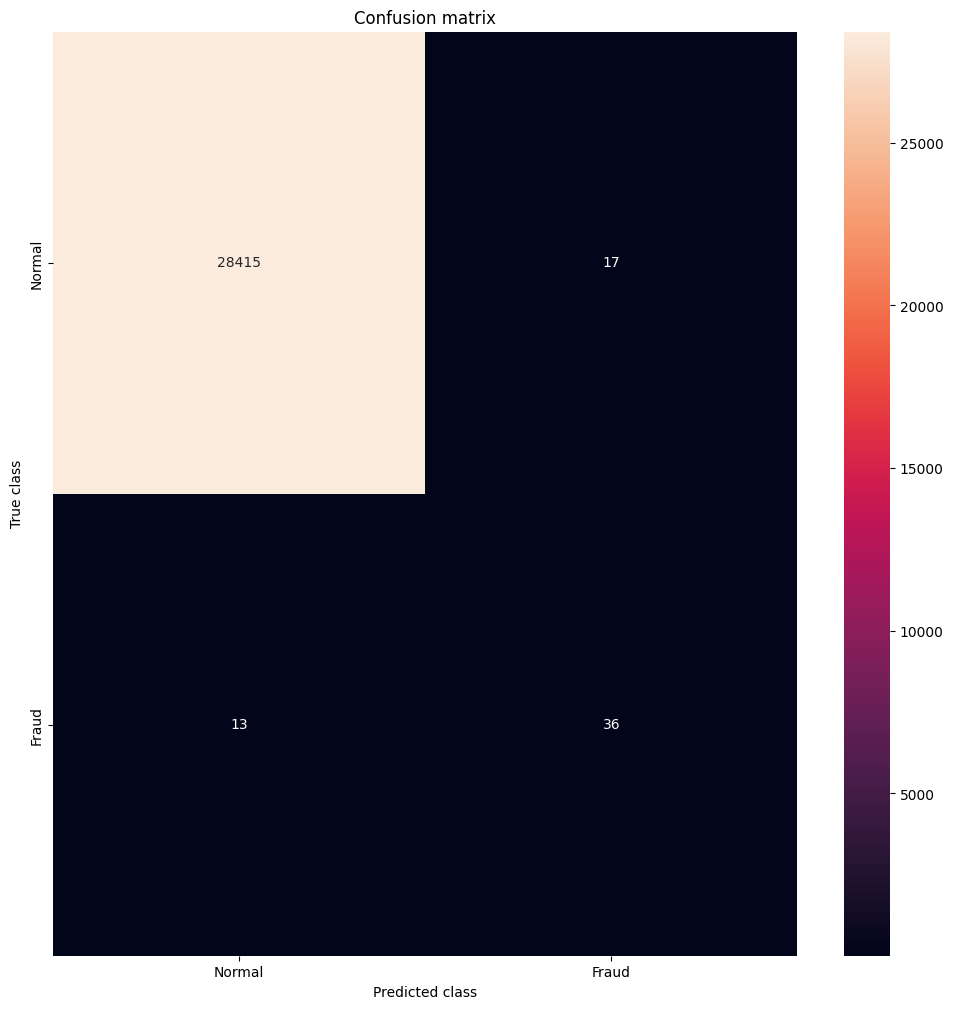

Classification report:- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.68      0.73      0.71        49

    accuracy                           1.00     28481
   macro avg       0.84      0.87      0.85     28481
weighted avg       1.00      1.00      1.00     28481

Accuracy score :- 0.9989466661985184
39.84375
2/2 [==============================] - 0s 5ms/step
441 [D loss: 0.301234, acc: 39.84%, op_acc: 91.41%] [G loss: 0.000000]
2/2 [==============================] - 0s 4ms/step
442 [D loss: 0.350604, acc: 39.84%, op_acc: 90.62%] [G loss: 0.000000]
2/2 [==============================] - 0s 4ms/step
443 [D loss: 0.328986, acc: 41.41%, op_acc: 90.62%] [G loss: 0.000000]
2/2 [==============================] - 0s 6ms/step
444 [D loss: 0.368543, acc: 41.41%, op_acc: 85.94%] [G loss: 0.000000]
2/2 [==============================] - 0s 4ms/step
445 [D loss: 0.458563, acc: 39.84%, op_acc: 83.59%] [G loss: 0

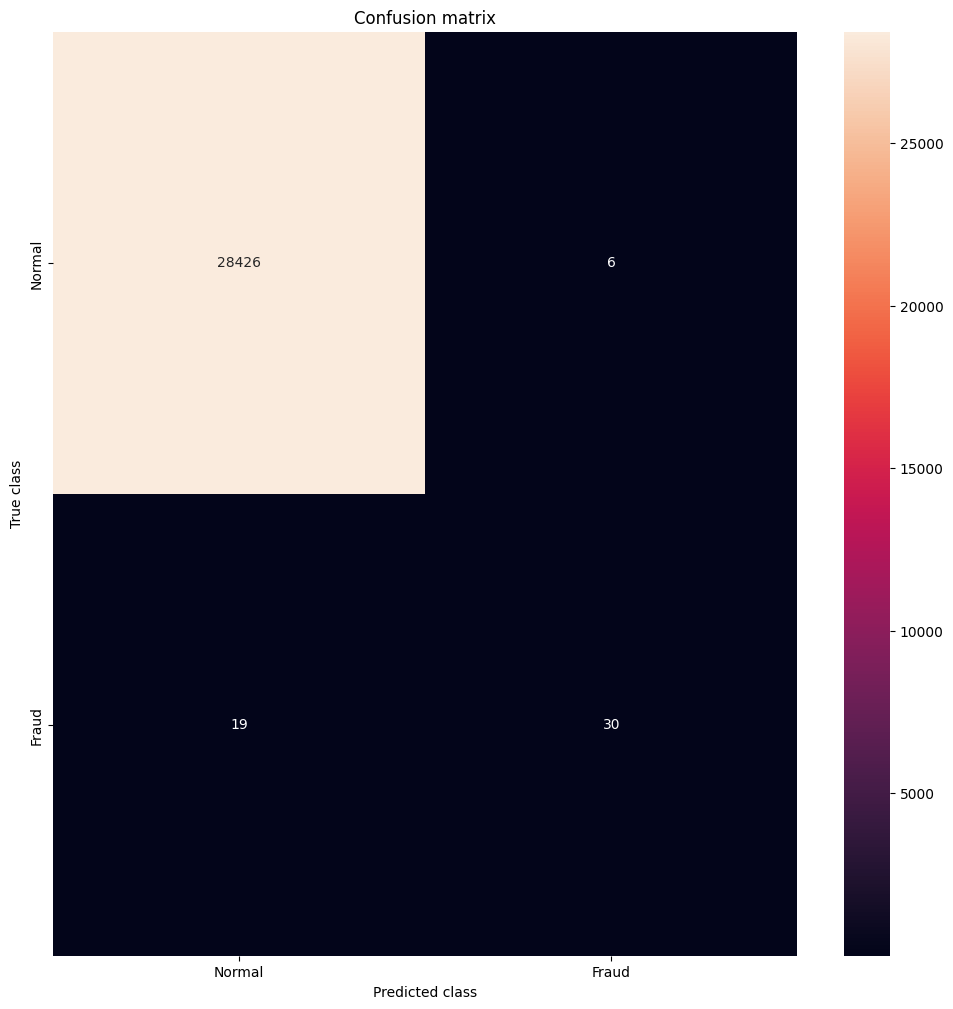

Classification report:- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.83      0.61      0.71        49

    accuracy                           1.00     28481
   macro avg       0.92      0.81      0.85     28481
weighted avg       1.00      1.00      1.00     28481

Accuracy score :- 0.9991222218320986
40.546875
2/2 [==============================] - 0s 9ms/step
451 [D loss: 0.426286, acc: 40.62%, op_acc: 84.38%] [G loss: 0.000000]
2/2 [==============================] - 0s 7ms/step
452 [D loss: 0.408189, acc: 39.84%, op_acc: 86.72%] [G loss: 0.000000]
2/2 [==============================] - 0s 7ms/step
453 [D loss: 0.335153, acc: 42.97%, op_acc: 88.28%] [G loss: 0.000000]
2/2 [==============================] - 0s 7ms/step
454 [D loss: 0.431458, acc: 38.28%, op_acc: 84.38%] [G loss: 0.000000]
2/2 [==============================] - 0s 6ms/step
455 [D loss: 0.337918, acc: 41.41%, op_acc: 89.84%] [G loss: 

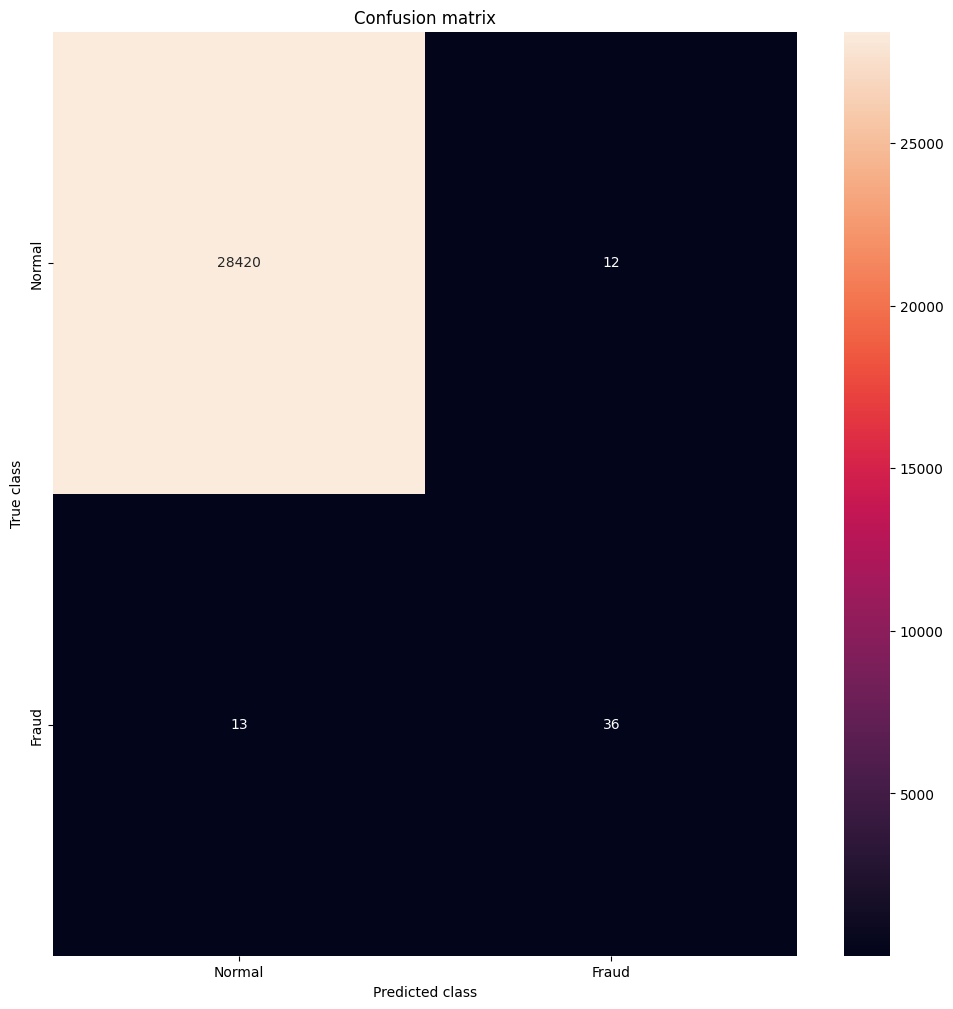

Classification report:- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.75      0.73      0.74        49

    accuracy                           1.00     28481
   macro avg       0.87      0.87      0.87     28481
weighted avg       1.00      1.00      1.00     28481

Accuracy score :- 0.9991222218320986
40.0
2/2 [==============================] - 0s 4ms/step
461 [D loss: 0.331978, acc: 35.16%, op_acc: 87.50%] [G loss: 0.000000]
2/2 [==============================] - 0s 4ms/step
462 [D loss: 0.319430, acc: 42.19%, op_acc: 89.06%] [G loss: 0.000000]
2/2 [==============================] - 0s 4ms/step
463 [D loss: 0.344986, acc: 42.19%, op_acc: 87.50%] [G loss: 0.000000]
2/2 [==============================] - 0s 8ms/step
464 [D loss: 0.342049, acc: 39.06%, op_acc: 88.28%] [G loss: 0.000000]
2/2 [==============================] - 0s 8ms/step
465 [D loss: 0.369108, acc: 39.06%, op_acc: 89.84%] [G loss: 0.000

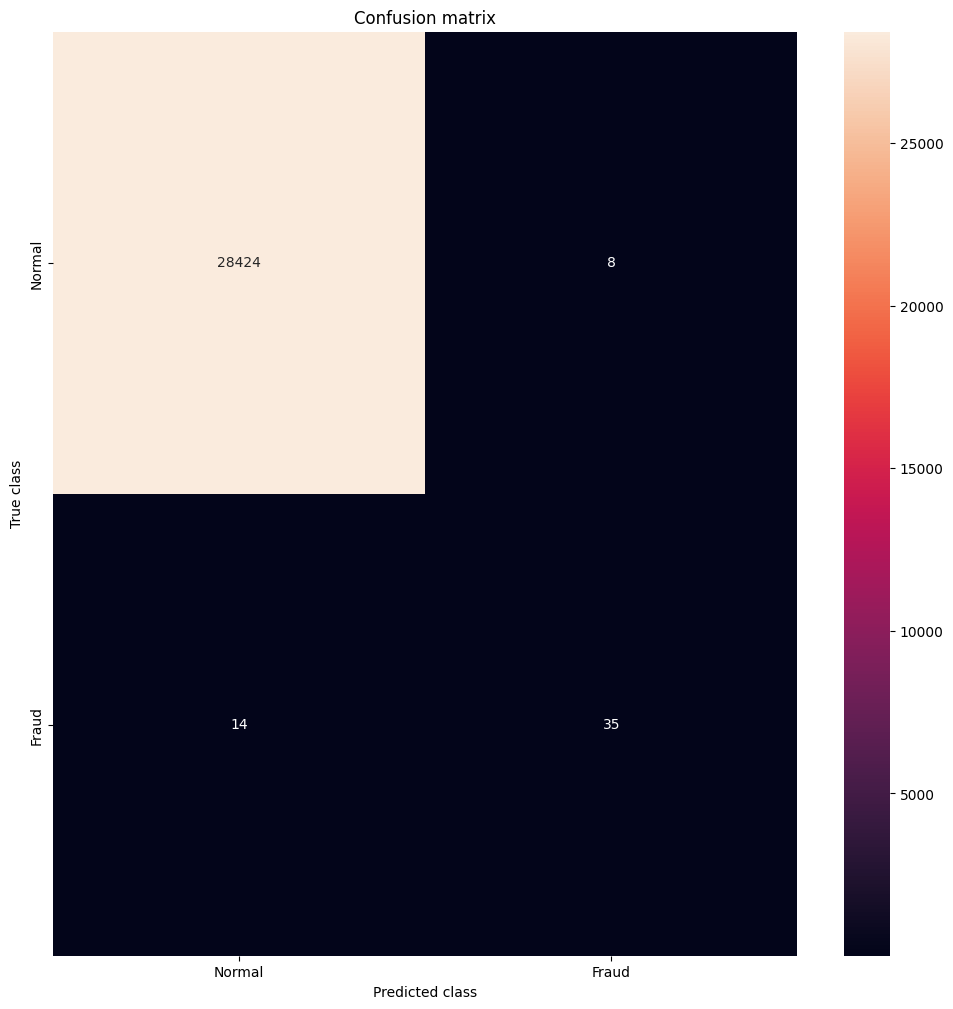

Classification report:- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.81      0.71      0.76        49

    accuracy                           1.00     28481
   macro avg       0.91      0.86      0.88     28481
weighted avg       1.00      1.00      1.00     28481

Accuracy score :- 0.9992275552122467
39.296875
2/2 [==============================] - 0s 4ms/step
471 [D loss: 0.427396, acc: 40.62%, op_acc: 85.94%] [G loss: 0.000000]
2/2 [==============================] - 0s 4ms/step
472 [D loss: 0.299646, acc: 42.19%, op_acc: 90.62%] [G loss: 0.000000]
2/2 [==============================] - 0s 8ms/step
473 [D loss: 0.389247, acc: 40.62%, op_acc: 87.50%] [G loss: 0.000000]
2/2 [==============================] - 0s 4ms/step
474 [D loss: 0.326985, acc: 41.41%, op_acc: 89.84%] [G loss: 0.000000]
2/2 [==============================] - 0s 5ms/step
475 [D loss: 0.289038, acc: 39.06%, op_acc: 91.41%] [G loss: 

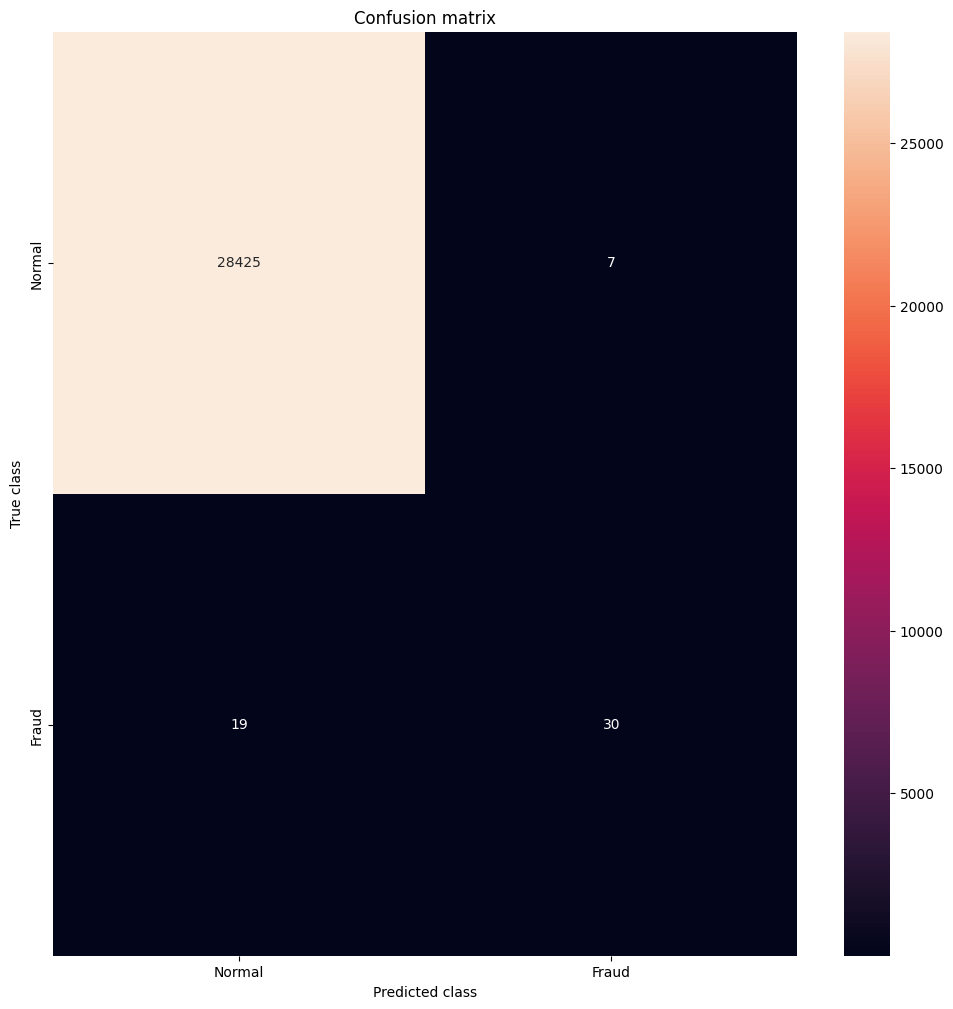

Classification report:- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.81      0.61      0.70        49

    accuracy                           1.00     28481
   macro avg       0.91      0.81      0.85     28481
weighted avg       1.00      1.00      1.00     28481

Accuracy score :- 0.9990871107053826
40.234375
2/2 [==============================] - 0s 4ms/step
481 [D loss: 0.284370, acc: 39.06%, op_acc: 91.41%] [G loss: 0.000000]
2/2 [==============================] - 0s 3ms/step
482 [D loss: 0.322133, acc: 42.19%, op_acc: 89.06%] [G loss: 0.000000]
2/2 [==============================] - 0s 8ms/step
483 [D loss: 0.243289, acc: 38.28%, op_acc: 93.75%] [G loss: 0.000000]
2/2 [==============================] - 0s 3ms/step
484 [D loss: 0.359071, acc: 41.41%, op_acc: 89.06%] [G loss: 0.000000]
2/2 [==============================] - 0s 4ms/step
485 [D loss: 0.367856, acc: 37.50%, op_acc: 87.50%] [G loss: 

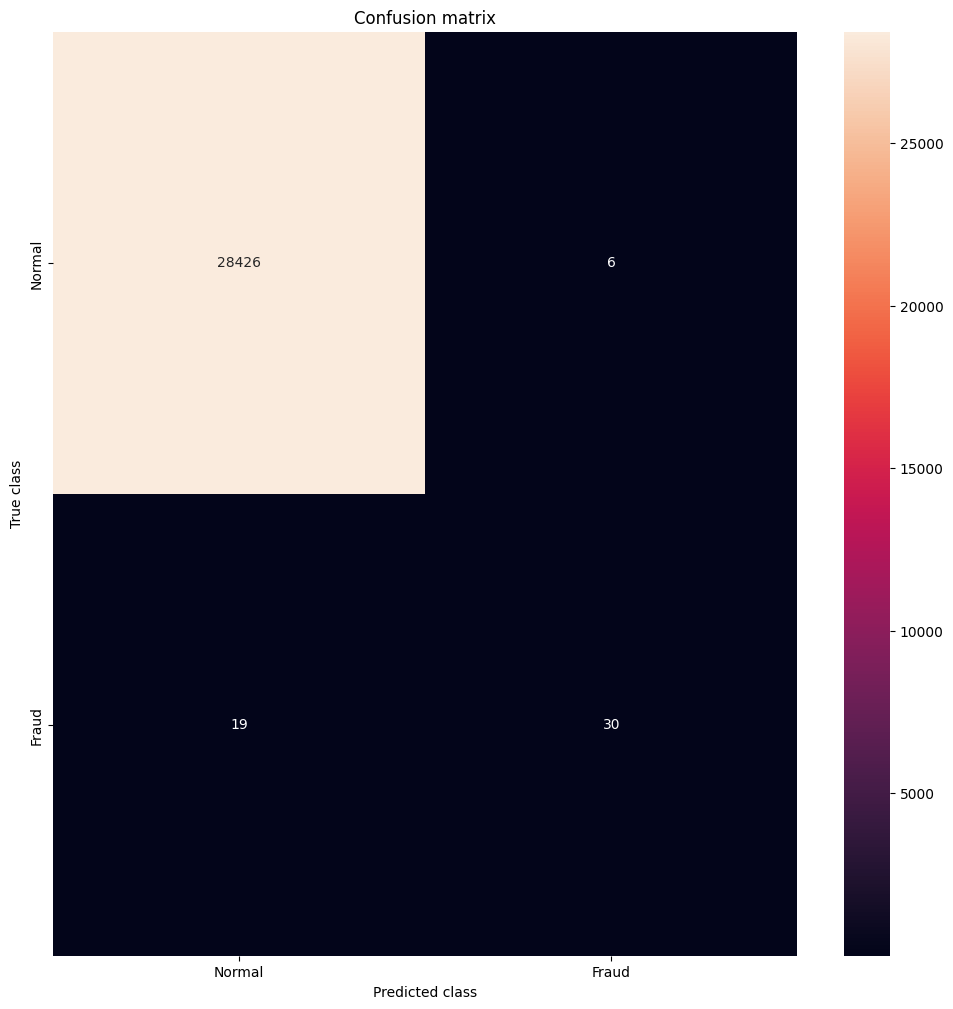

Classification report:- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.83      0.61      0.71        49

    accuracy                           1.00     28481
   macro avg       0.92      0.81      0.85     28481
weighted avg       1.00      1.00      1.00     28481

Accuracy score :- 0.9991222218320986
39.609375
2/2 [==============================] - 0s 4ms/step
491 [D loss: 0.312783, acc: 42.19%, op_acc: 92.19%] [G loss: 0.000000]
2/2 [==============================] - 0s 6ms/step
492 [D loss: 0.404824, acc: 39.06%, op_acc: 89.84%] [G loss: 0.000000]
2/2 [==============================] - 0s 7ms/step
493 [D loss: 0.359660, acc: 40.62%, op_acc: 85.94%] [G loss: 0.000000]
2/2 [==============================] - 0s 4ms/step
494 [D loss: 0.376618, acc: 39.06%, op_acc: 89.06%] [G loss: 0.000000]
2/2 [==============================] - 0s 4ms/step
495 [D loss: 0.316963, acc: 39.06%, op_acc: 90.62%] [G loss: 

In [38]:
f1_p, d_l_p = train(X_res,y_res,
             X_test,y_test,
             generator,discriminator,
             combined,
             num_classes=2,
             epochs=500,
             batch_size=128)

Text(0, 0.5, 'F1 Score Validation')

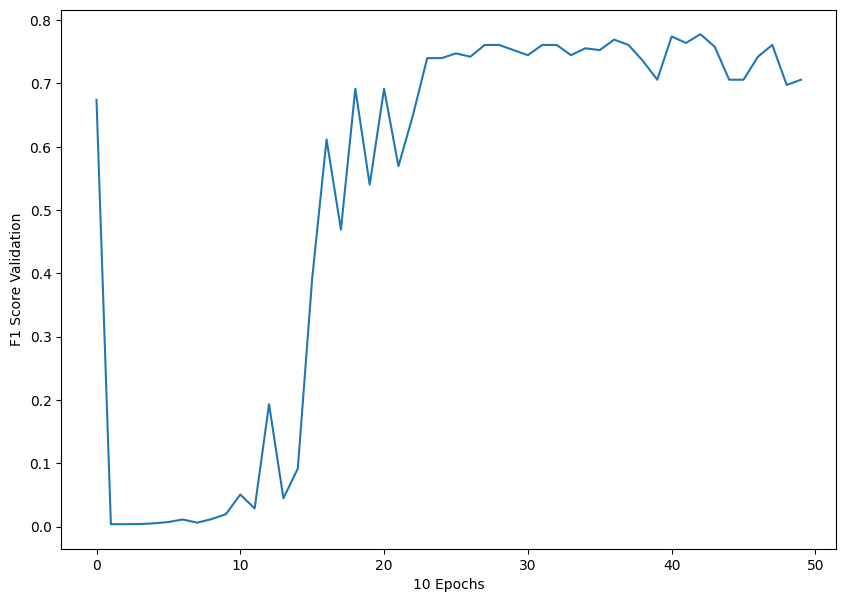

In [39]:
fig = plt.figure(figsize=(10,7))
plt.plot(f1_p)
plt.xlabel('10 Epochs')
plt.ylabel('F1 Score Validation')

Text(0, 0.5, 'Accuracy')

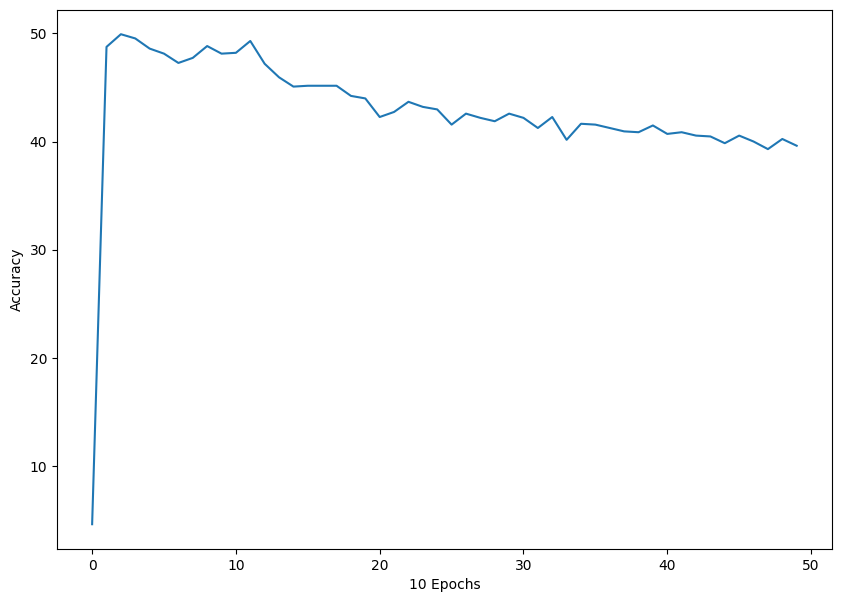

In [40]:
fig = plt.figure(figsize=(10,7))
plt.plot(d_l_p)
plt.xlabel('10 Epochs')
plt.ylabel('Accuracy')